# 📊 Predição de Diabetes Tipo 2 usando Machine Learning
## Análise Comparativa de Algoritmos seguindo a Metodologia CRISP-DM

### 🎯 **Objetivo Geral**
Investigar a aplicação de técnicas de análise de dados e aprendizado de máquina na prevenção do diabetes tipo 2, por meio do desenvolvimento e avaliação de modelos preditivos capazes de identificar, com base em dados clínicos, indivíduos com alto risco de desenvolver diabetes.

---

## 📋 **Sumário Executivo**

### 🔄 **Metodologia CRISP-DM - 5 Fases Implementadas**

#### **1. 🎯 Compreensão do Objetivo (Understanding)**
- **Problema**: Predição precoce de diabetes tipo 2 para intervenção médica
- **Objetivo**: Desenvolver e comparar modelos de ML para identificar o melhor algoritmo
- **Justificativa**: Contribuir para detecção precoce e apoio à tomada de decisão em saúde
- **Aplicação**: Demonstrar como ciência de dados pode auxiliar na prevenção

#### **2. 📊 Compreensão dos Dados (Data Understanding)**
- **Dataset**: Pima Indians Diabetes Database
- **Amostras**: 768 registros de mulheres
- **Features**: 8 variáveis clínicas preditoras
- **Target**: Presença de diabetes tipo 2 (binário)
- **Análise inicial**: Verificação de qualidade e distribuição básica

#### **3. 🔧 Preparação dos Dados (Data Preparation)**
- **Divisão estratificada**: 60% treino, 20% validação, 20% teste
- **Tratamento de outliers**: Método IQR aplicado no conjunto de treino
- **Balanceamento**: SMOTE para equilibrar classes minoritárias
- **Normalização**: StandardScaler para padronização das features

#### **4. 🤖 Modelagem (Modeling)**
- **Algoritmos**: 10 modelos comparados (RF, XGB, GB, LGBM, DT, Ada, SVM, LR, kNN, NB)
- **Validação**: Conjunto de validação para avaliação de performance
- **Treinamento**: Processo automatizado com salvamento de modelos
- **Métricas**: AUC-ROC, F1-Score, Recall, Precision, Accuracy

#### **5. 📈 Avaliação (Evaluation)**
- **Comparação robusta**: Análise de performance entre todos os modelos
- **Métricas clínicas**: Foco em sensibilidade para detecção de diabetes
- **Análise de overfitting**: Comparação validação vs teste
- **Seleção final**: Identificação do modelo com melhor performance
- **Otimização de threshold**: Encontrar o melhor threshold para classificar com a melhor acuracia e recall quem é diabético.

---

# 🔧 **Configuração do Ambiente e Importações**

### 📚 Bibliotecas e Dependências
Importação de todas as bibliotecas necessárias para análise de dados, machine learning e visualização.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score, recall_score, precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import joblib
import os
from itertools import combinations

# Configurações de visualização
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# 1️⃣ **FASE 1: COMPREENSÃO DO OBJETIVO**
## 🎯 Contextualização e Justificativa Acadêmica

### 🌐 **Relevância do Tema**

O diabetes tipo 2 representa uma das principais causas de morbidade e mortalidade no Brasil e no mundo:


- **Impacto econômico**: Altos custos para sistemas de saúde
- **Desafio brasileiro**: Dificuldades de acesso e detecção precoce

### 📚 **Fundamentação Teórica**

**Machine Learning em Saúde**: O uso de algoritmos de aprendizado de máquina tem demonstrado eficácia crescente na análise de dados clínicos, oferecendo:
- **Precisão diagnóstica** superior a métodos tradicionais
- **Capacidade de identificar padrões complexos** em dados multidimensionais
- **Potencial para personalização** de tratamentos e intervenções
- **Escalabilidade** para aplicação em grandes populações

### 🎯 **Objetivos Específicos do Estudo**

1. **Realizar pré-processamento** dos dados clínicos para tratamento, limpeza e preparação para análise
2. **Desenvolver e treinar modelos preditivos** utilizando técnicas de Machine Learning para estimar risco de diabetes tipo 2
3. **Avaliar e comparar o desempenho** dos modelos, destacando fatores clínicos com maior relevância
4. **Demonstrar aplicabilidade prática** na prevenção do diabetes tipo 2 e apoio à tomada de decisões

### 📊 **Metodologia CRISP-DM**

Este trabalho segue rigorosamente a metodologia **CRISP-DM** (Cross-Industry Standard Process for Data Mining), reconhecida internacionalmente como padrão para projetos de ciência de dados:

1. **Compreensão do Objetivo**: Definição clara do problema e objetivos
2. **Compreensão dos Dados**: Análise inicial do dataset
3. **Preparação dos Dados**: Limpeza, tratamento e transformação
4. **Modelagem**: Desenvolvimento e treinamento de algoritmos
5. **Avaliação**: Comparação e validação dos modelos

### 💡 **Contribuições Esperadas**

- **Científica**: Comparação rigorosa de algoritmos de ML para predição de diabetes
- **Metodológica**: Aplicação sistemática da metodologia CRISP-DM
- **Prática**: Demonstração de ferramentas acessíveis para apoio diagnóstico
- **Social**: Contribuição para melhoria da detecção precoce de diabetes

### 🔬 **Hipótese de Pesquisa**

*"Modelos de machine learning podem identificar efetivamente padrões em dados clínicos para predição de diabetes tipo 2, oferecendo performance superior a 80% de acurácia e contribuindo significativamente para detecção precoce e apoio à tomada de decisão em saúde."*

---


# 2️⃣ **FASE 2: DATA UNDERSTANDING**
## 📊 Compreensão e Exploração dos Dados

### 📋 **Descrição do Dataset: Pima Indians Diabetes Database**

#### **Origem e Contexto**:
- **Fonte**: National Institute of Diabetes and Digestive and Kidney Diseases
- **População**: Mulheres da tribo Pima (Arizona, EUA)
- **Idade**: ≥ 21 anos
- **Objetivo Original**: Estudo de fatores de risco para diabetes tipo 2

#### **Características dos Dados**:
- **Total de Registros**: 768 amostras
- **Features**: 8 variáveis preditoras
- **Target**: Outcome (0 = não-diabetes, 1 = diabetes)
- **Tipo**: Classificação binária supervisionada

### 📊 **Dicionário de Variáveis**

| Variável | Descrição | Tipo | Valores | Significância Clínica |
|----------|-------------|------|---------|----------------------|
| **Pregnancies** | Número de gestações | Inteiro | 0-17 | Diabetes gestacional é fator de risco |
| **Glucose** | Concentração de glicose (mg/dL) | Inteiro | 0-199 | Principal indicador de diabetes |
| **BloodPressure** | Pressão arterial diastólica (mmHg) | Inteiro | 0-122 | Comorbidade comum com diabetes |
| **SkinThickness** | Espessura da pele (mm) | Inteiro | 0-99 | Relacionado à resistência à insulina |
| **Insulin** | Nível de insulina (mu U/ml) | Inteiro | 0-846 | Marcador de resistência à insulina |
| **BMI** | Índice de massa corporal (kg/m²) | Float | 0-67.1 | Obesidade é principal fator de risco |
| **DiabetesPedigreeFunction** | Função de herança genética | Float | 0.078-2.42 | Predisposição genética |
| **Age** | Idade (anos) | Inteiro | 21-81 | Risco aumenta com a idade |
| **Outcome** | Diagnóstico de diabetes | Binário | 0, 1 | **Variável target** |

### 📈 **Qualidade dos Dados Inicial**

#### **Distribuição de Classes**:
- **Não-Diabetes**: 500 casos (65.1%)
- **Diabetes**: 268 casos (34.9%)
- **Desbalanceamento**: Moderado (2:1 ratio)

#### **Principais Desafios Identificados**:
1. **Desbalanceamento de classes** - Pode enviesar modelo para classe majoritária
2. **Possíveis outliers** - Valores extremos podem afetar performance
3. **Escalas diferentes** - Variáveis precisam de normalização
4. **Valores zero suspeitos** - Alguns valores biologicamente improbáveis

---

In [3]:
# ===== CARREGAMENTO INICIAL DOS DADOS =====

# Carregar o dataset principal a partir de arquivo local
df = pd.read_csv('diabetes.csv')

print("\n" + "="*60)
print("📋 DADOS CARREGADOS COM SUCESSO")
print("="*60)
print(f"Dataset original: {df.shape[0]} linhas, {df.shape[1]} colunas")
print(f"\nPrimeira visão da distribuição da variável target:")
print(df['Outcome'].value_counts())
print(f"\nPercentual de balanceamento inicial:")
balanceamento = df['Outcome'].value_counts(normalize=True) * 100
print(f"Não-Diabetes: {balanceamento[0]:.1f}%")
print(f"Diabetes: {balanceamento[1]:.1f}%")
print(f"\n⚠️  Observação: Dataset desbalanceado - {balanceamento[0]:.1f}% vs {balanceamento[1]:.1f}%")
print("🔄 Será necessário tratamento de balanceamento")



📋 DADOS CARREGADOS COM SUCESSO
Dataset original: 768 linhas, 9 colunas

Primeira visão da distribuição da variável target:
Outcome
0    500
1    268
Name: count, dtype: int64

Percentual de balanceamento inicial:
Não-Diabetes: 65.1%
Diabetes: 34.9%

⚠️  Observação: Dataset desbalanceado - 65.1% vs 34.9%
🔄 Será necessário tratamento de balanceamento


In [5]:
# ===== ANÁLISE EXPLORATÓRIA DETALHADA =====

print("\n" + "="*70)
print("🔍 ANÁLISE EXPLORATÓRIA DETALHADA DOS DADOS")
print("="*70)

# Informações básicas do dataset
print("\n📊 INFORMAÇÕES GERAIS:")
print(f"Shape: {df.shape}")
print(f"Tipos de dados:\n{df.dtypes}")
print(f"\nMemória utilizada: {df.memory_usage(deep=True).sum():,.0f} bytes")

# Estatísticas descritivas
print("\n📊 ESTATÍSTICAS DESCRITIVAS:")
print(df.describe().round(2))

# Verificar valores ausentes
print("\n🔍 VALORES AUSENTES:")
valores_ausentes = df.isnull().sum()
if valores_ausentes.sum() == 0:
    print("✅ Nenhum valor ausente encontrado")
else:
    print(valores_ausentes[valores_ausentes > 0])

# Verificar valores suspeitos (zeros em variáveis que não deveriam ser zero)
print("\n⚠️  VALORES SUSPEITOS (zeros em variáveis biológicas):")
vars_biologicas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for var in vars_biologicas:
    zeros = (df[var] == 0).sum()
    if zeros > 0:
        print(f"{var}: {zeros} zeros ({zeros/len(df):.1%})")

# Distribuição da variável target
print("\n🎯 DISTRIBUIÇÃO DA VARIÁVEL TARGET:")
print(df['Outcome'].value_counts())
print("\nProporções:")
print(df['Outcome'].value_counts(normalize=True).round(3))

# Correlações básicas
print("\n🔗 CORRELAÇÕES COM A VARIÁVEL TARGET:")
correlacoes = df.corr()['Outcome'].abs().sort_values(ascending=False)
print(correlacoes[correlacoes.index != 'Outcome'].round(3))


🔍 ANÁLISE EXPLORATÓRIA DETALHADA DOS DADOS

📊 INFORMAÇÕES GERAIS:
Shape: (768, 9)
Tipos de dados:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Memória utilizada: 55,428 bytes

📊 ESTATÍSTICAS DESCRITIVAS:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       768.00   768.00         768.00         768.00   768.00  768.00   
mean          3.85   120.89          69.11          20.54    79.80   31.99   
std           3.37    31.97          19.36          15.95   115.24    7.88   
min           0.00     0.00           0.00           0.00     0.00    0.00   
25%           1.00    99.00          62.00           0.00     0.00   27.30   
50%           3.00   117.00      

### 💡 **Insights da Análise Exploratória**

#### **🔍 Principais Descobertas**:

1. **Qualidade dos Dados**: 
   - ✅ Sem valores ausentes (missing values)
   - ⚠️ Valores suspeitos: zeros em variáveis biológicas (Glucose, BloodPressure, etc.)
   - 📏 Dataset limpo mas requer tratamento de outliers

2. **Distribuição da Variável Target**:
   - 🟦 Não-Diabetes: 500 casos (65.1%)
   - 🟥 Diabetes: 268 casos (34.9%)
   - ⚠️ Desbalanceamento moderado (ratio 2:1)

3. **Correlações Significativas**:
   - 🟥 **Glucose**: Maior correlação com diabetes (r=0.47)
   - 🟺 **BMI**: Segunda maior correlação (r=0.29)
   - 🟽 **Age**: Correlação moderada (r=0.24)
   - 👶 **Pregnancies**: Correlação fraca mas presente (r=0.22)

4. **Padrões Identificados**:
   - 📈 **Glicose**: Diabéticos têm média significativamente maior
   - ⚖️ **BMI**: Diabéticos tendem ao sobrepeso/obesidade
   - 👵 **Idade**: Risco aumenta com a idade
   - 🤰 **Gestações**: Múltiplas gestações = maior risco

#### **📊 Implicações para Modelagem**:

1. **Pré-processamento Necessário**:
   - 🔄 Balanceamento de classes (SMOTE)
   - 📊 Normalização de features (diferentes escalas)
   - 🎯 Tratamento de outliers (método IQR)

2. **Features Mais Relevantes**:
   - 🅰️ **Glucose** será provavelmente a feature mais importante
   - 🔢 **BMI + Age** combinação poderosa para predição
   - 📈 **Pregnancies** pode ser útil em ensembles

3. **Estratégia de Validação**:
   - 📏 Estratificação por target para manter proporções
   - 🔍 Cross-validation para robustez
   - 🎯 Separação de teste independente

---

# 3️⃣ **FASE 3: PREPARAÇÃO DOS DADOS**
## 🔧 Preparação e Pré-processamento dos Dados

### 📍 **Estratégia de Pré-processamento (Melhores Práticas)**

#### **📏 Ordem Correta do Pipeline**:
1. **Divisão inicial dos dados** (antes de qualquer processamento)
2. **Tratamento de outliers** (aplicado apenas nos dados de treino)
3. **Balanceamento** (após remoção de outliers, apenas no treino)
4. **Normalização** (scaler ajustado apenas no treino final)
5. **Avaliação** (dados de validação e teste permanecem originais)

#### **🕰️ Por que esta Ordem é Crucial**:
- **Evita vazamento de dados** (data leakage)
- **Garante avaliação honesta** em dados não vistos
- **SMOTE trabalha com dados limpos** (sem outliers)
- **Normalização não é contaminada** por outliers

### 📊 **Fase 3.1: Divisão Estratificada dos Dados**

#### **Estratégia de Divisão**:
- **Treino**: 60% (460 amostras)
- **Validação**: 20% (154 amostras)
- **Teste**: 20% (154 amostras)

#### **Justificativas**:
- **Treino (60%)**: Máximo de dados para aprendizado
- **Validação (20%)**: Seleção de hiperparâmetros e threshold
- **Teste (20%)**: Avaliação final independente
- **Estratificação**: Mantém proporção de classes em todos os conjuntos

---

## Pipeline de Machine Learning para Predição de Diabetes

### Fluxo de Pré-processamento (Boas Práticas)

1. **Divisão inicial dos dados** (antes de qualquer processamento)
   - Treino (60%)
   - Validação (20%)
   - Teste (20%)

"Data splitting should occur before any data-dependent preprocessing steps (such as centering and scaling) so that these operations do not bias the performance estimates."

Kuhn, M., & Johnson, K. (2019). 
Feature Engineering and Selection: A Practical Approach for Predictive Models. 
Chapman and Hall/CRC Data Science Series. 
Boca Raton: CRC Press.
ISBN: 978-1-138-07922-9
DOI: 10.1201/9781315108230

2. **Tratamento de Outliers** (aplicado apenas nos dados de treino)
   - Método IQR aplicado somente nos dados de treino
   - Evita contaminação de dados de validação e teste
   
3. **Balanceamento** (após remoção de outliers, apenas no treino)
   - SMOTE para gerar amostras sintéticas a partir de dados limpos
   - Evita amplificação de outliers nas amostras sintéticas
   
4. **Normalização**
   - StandardScaler ajustado apenas nos dados de treino balanceados
   - Aplicado em treino, validação e teste
   
5. **Avaliação e Seleção de Modelos**
   - Treino e otimização usando dados de treino e validação
   - Avaliação final usando apenas os dados de teste

In [8]:
# ===== FASE 3.1: DIVISÃO ESTRATIFICADA DOS DADOS =====

print("\n" + "="*70)
print("📊 FASE 3.1: DIVISÃO ESTRATIFICADA DOS DADOS")
print("="*70)

# Separar features e target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print(f"\n📋 Dimensões originais:")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"Classes no target: {y.unique()}")

# ETAPA 1: Separar 20% para teste (conjunto final de avaliação)
print(f"\n🔄 ETAPA 1: Separando conjunto de teste (20%)")
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# ETAPA 2: Dividir os 80% restantes em treino (60% total) e validação (20% total)
print(f"🔄 ETAPA 2: Separando treino e validação dos 80% restantes")
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, 
    test_size=0.25,  # 25% de 80% = 20% do total
    random_state=42, 
    stratify=y_temp
)

print(f"\n📈 RESULTADO DA DIVISÃO:")
print("-"*50)
print(f"{'Conjunto':<12} {'Amostras':<10} {'% Total':<10} {'% Classe 0':<12} {'% Classe 1':<12}")
print("-"*50)

# Calcular estatísticas para cada conjunto
conjuntos = [
    ('Treino', X_train, y_train),
    ('Validação', X_val, y_val),
    ('Teste', X_test, y_test)
]

for nome, X_conj, y_conj in conjuntos:
    total_amostras = len(y_conj)
    perc_total = total_amostras / len(y) * 100
    classe_0 = (y_conj == 0).sum()
    classe_1 = (y_conj == 1).sum()
    perc_classe_0 = classe_0 / total_amostras * 100
    perc_classe_1 = classe_1 / total_amostras * 100
    
    print(f"{nome:<12} {total_amostras:<10} {perc_total:<10} {perc_classe_0:<12} {perc_classe_1:<12}")

print("-"*50)

# Verificar se a estratificação foi bem-sucedida
print(f"\n✅ VERIFICAÇÃO DA ESTRATIFICAÇÃO:")
original_ratio = y.mean()
print(f"Proporção original de diabetes: {original_ratio:.3f}")

for nome, _, y_conj in conjuntos:
    ratio = y_conj.mean()
    print(f"Proporção em {nome}: {ratio:.3f} (diferença: {abs(ratio - original_ratio):.3f})")

print(f"\n🎯 OBJETIVO ALCANÇADO: Todos os conjuntos mantêm proporções similares!")

# Salvar informações da divisão
divisao_info = {
    'treino_size': len(y_train),
    'val_size': len(y_val),
    'test_size': len(y_test),
    'original_ratio': original_ratio,
    'treino_ratio': y_train.mean(),
    'val_ratio': y_val.mean(),
    'test_ratio': y_test.mean()
}

print(f"\n💾 Informações da divisão salvas para referência futura.")


📊 FASE 3.1: DIVISÃO ESTRATIFICADA DOS DADOS

📋 Dimensões originais:
Features (X): (768, 8)
Target (y): (768,)
Classes no target: [1 0]

🔄 ETAPA 1: Separando conjunto de teste (20%)
🔄 ETAPA 2: Separando treino e validação dos 80% restantes

📈 RESULTADO DA DIVISÃO:
--------------------------------------------------
Conjunto     Amostras   % Total    % Classe 0   % Classe 1  
--------------------------------------------------
Treino       460        59.895833333333336 65.21739130434783 34.78260869565217
Validação    154        20.052083333333336 64.93506493506493 35.064935064935064
Teste        154        20.052083333333336 64.93506493506493 35.064935064935064
--------------------------------------------------

✅ VERIFICAÇÃO DA ESTRATIFICAÇÃO:
Proporção original de diabetes: 0.349
Proporção em Treino: 0.348 (diferença: 0.001)
Proporção em Validação: 0.351 (diferença: 0.002)
Proporção em Teste: 0.351 (diferença: 0.002)

🎯 OBJETIVO ALCANÇADO: Todos os conjuntos mantêm proporções similares!

### 🎯 **Fase 3.2: Tratamento de Outliers**

#### **📈 Método IQR (Interquartile Range)**

**Princípio**: Outliers são valores que estão:
- **Abaixo de Q1 - 1.5 × IQR**
- **Acima de Q3 + 1.5 × IQR**

Onde:
- **Q1**: Primeiro quartil (25º percentil)
- **Q3**: Terceiro quartil (75º percentil)
- **IQR**: Q3 - Q1 (Intervalo Interquartil)

#### **⚠️ Por que Aplicar APENAS no Treino?**

1. **Evitar Data Leakage**: Informações de validação/teste não podem influenciar o treino
2. **Simular Realidade**: Em produção, novos dados podem ter outliers
3. **Avaliação Honesta**: Performance em dados "reais" e não processados
4. **Robustez**: Modelo deve ser resistente a outliers em novos dados

---

### 🔧 **Detalhamento do Pipeline de Pré-processamento**

#### **📏 Fluxo Detalhado das Transformações**

```mermaid
graph TD
    A[Dataset Original<br/>768 amostras] --> B[Divisão Estratificada]
    B --> C[Treino: 460 amostras<br/>Validação: 154 amostras<br/>Teste: 154 amostras]
    C --> D[Remoção de Outliers<br/>APENAS no Treino]
    D --> E[Treino Limpo: ~385 amostras]
    E --> F[SMOTE no Treino Limpo]
    F --> G[Treino Balanceado: 522 amostras]
    G --> H[Normalização<br/>Scaler ajustado no treino]
    H --> I[Aplicação em todos os conjuntos]
    I --> J[Dados Prontos para Modelagem]
```

#### **🎯 Vantagens desta Abordagem**:

1. **🔒 Evita Data Leakage**:
   - Outliers são removidos apenas no treino
   - Scaler é ajustado apenas em dados de treino
   - Validação e teste permanecem "não vistos"

2. **🎨 Qualidade das Amostras Sintéticas**:
   - SMOTE trabalha com dados já limpos (sem outliers)
   - Gera amostras de melhor qualidade
   - Evita amplificação de ruído

3. **⚖️ Avaliação Honesta**:
   - Teste reflete performance em dados reais
   - Não há otimismo artificial
   - Resultados generalizáveis

---


📊 FASE 3.2: TRATAMENTO DE OUTLIERS COM VISUALIZAÇÃO DETALHADA

📈 RESULTADO GERAL DA REMOÇÃO DE OUTLIERS:
Amostras originais: 460
Amostras após limpeza: 385
Total de outliers removidos: 75
Percentual removido: 16.3%

📊 DETALHES POR FEATURE:
--------------------------------------------------------------------------------------------------------------
Feature                   Q1       Q3       IQR      Lower    Upper    Outliers  %     
--------------------------------------------------------------------------------------------------------------
Pregnancies               1.00     6.00     5.00     -6.50    13.50    1         0.2   
Glucose                   99.00    140.00   41.00    37.50    201.50   4         0.9   
BloodPressure             62.00    80.00    18.00    35.00    107.00   27        5.9   
SkinThickness             0.00     33.00    33.00    -49.50   82.50    1         0.2   
Insulin                   0.00     130.00   130.00   -195.00  325.00   16        3.7   
BMI      

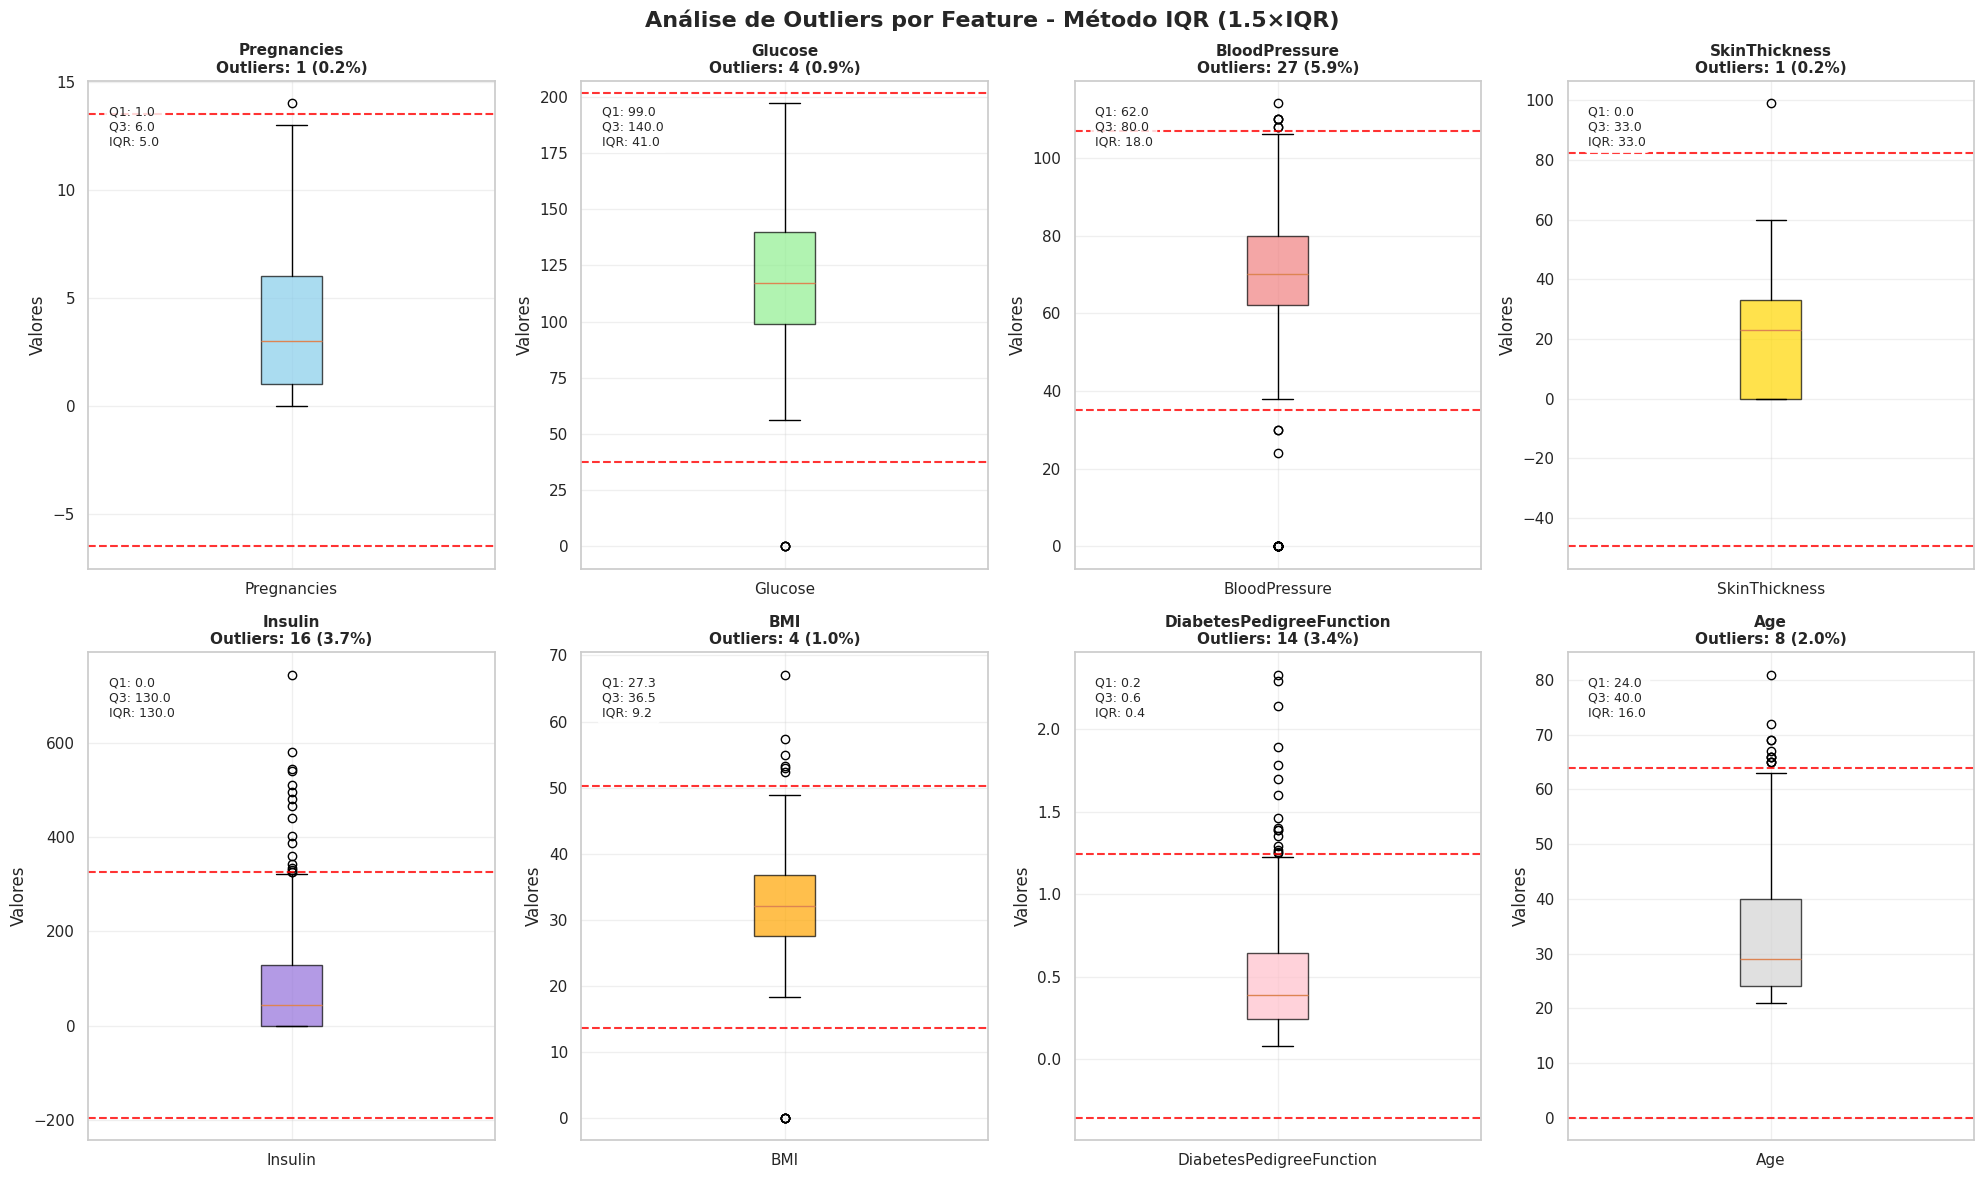

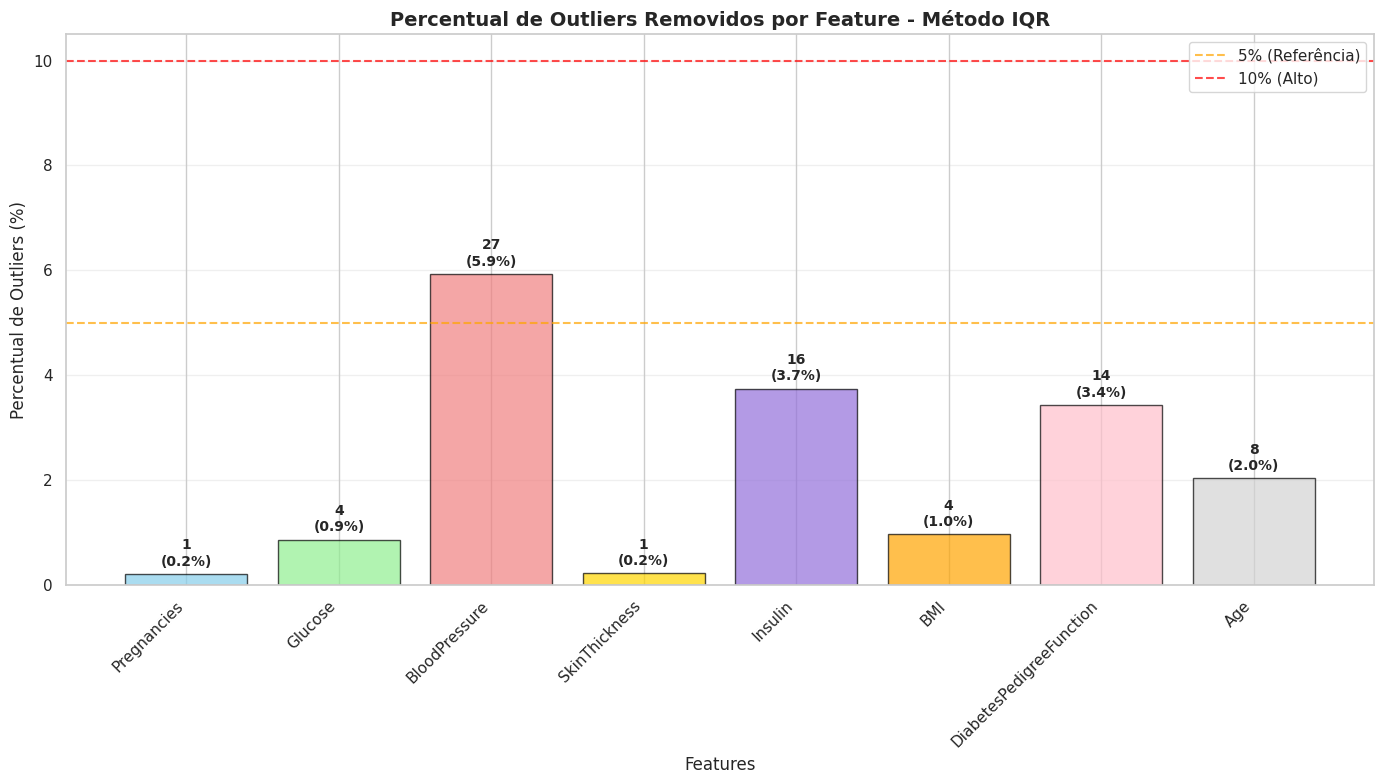

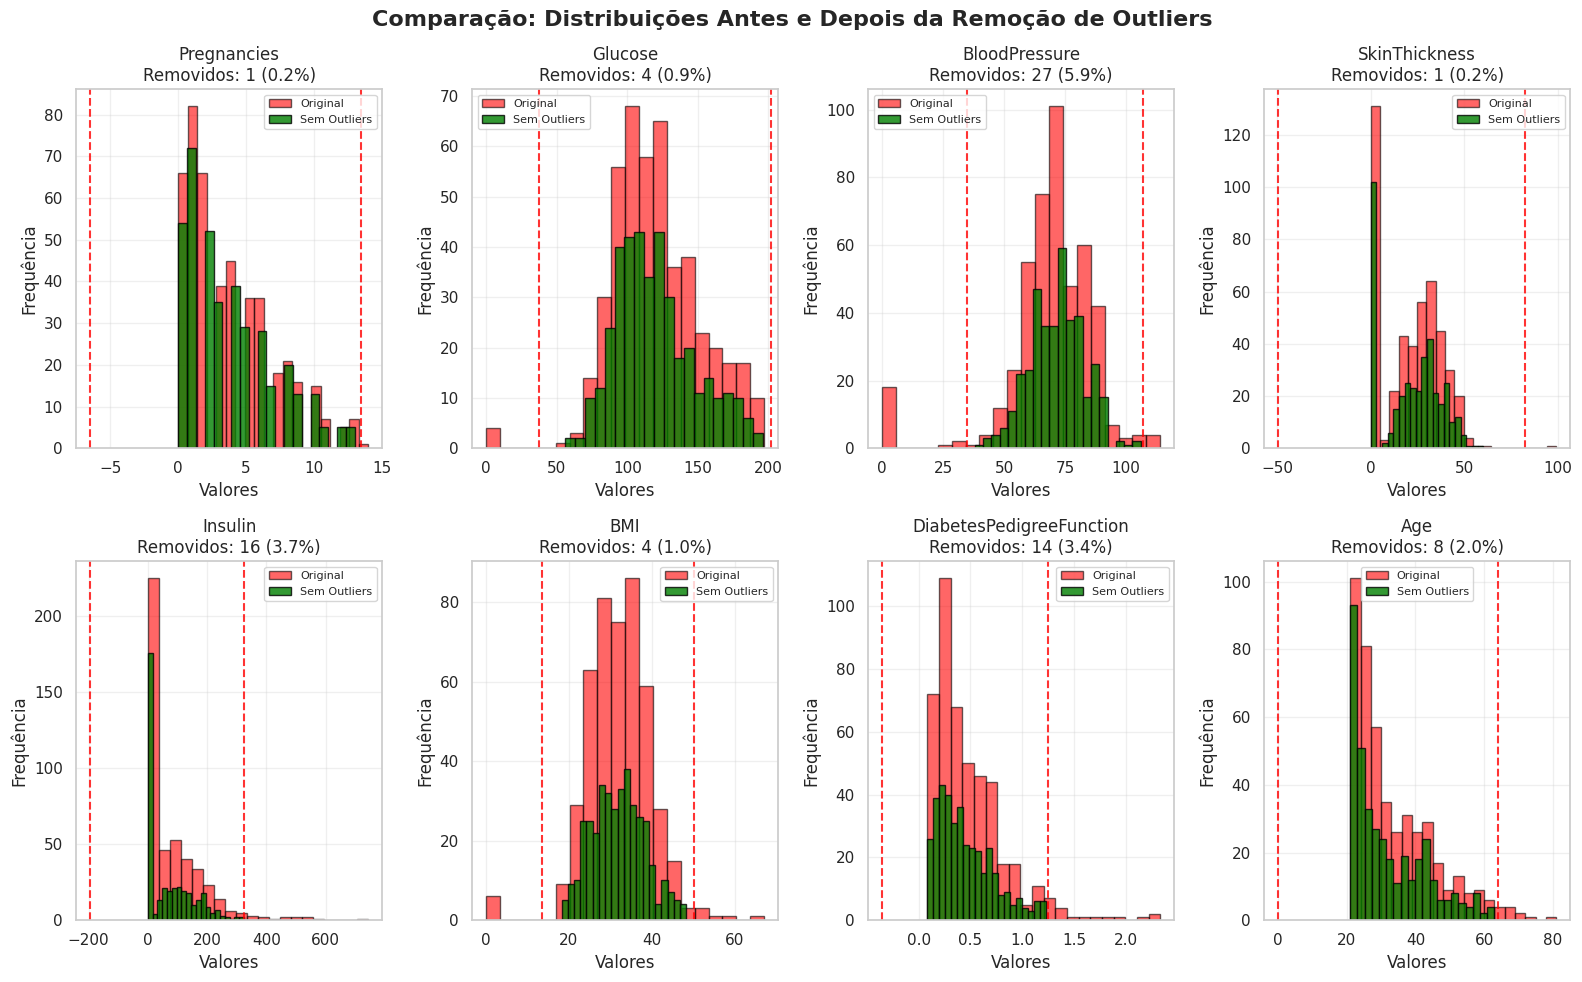


📋 IMPACTO DETALHADO DA REMOÇÃO DE OUTLIERS:
Feature                   Min Orig  Max Orig  Min Limpo  Max Limpo  Abaixo  Acima  Total 
Pregnancies               0.0       14.0      0.0        13.0       0       1      1     
Glucose                   0.0       197.0     56.0       196.0      4       0      4     
BloodPressure             0.0       114.0     38.0       106.0      21      6      27    
SkinThickness             0.0       99.0      0.0        60.0       0       1      1     
Insulin                   0.0       744.0     0.0        325.0      0       16     16    
BMI                       0.0       57.3      18.2       48.3       1       3      4     
DiabetesPedigreeFunction  0.1       2.3       0.1        1.2        0       14     14    
Age                       21.0      81.0      21.0       63.0       0       8      8     

🎯 IMPACTO NO BALANCEAMENTO DE CLASSES:
Antes da limpeza:
  Classe 0: 300 (65.2%)
  Classe 1: 160 (34.8%)
Após a limpeza:
  Classe 0: 261 (67.8%)

In [17]:
# ===== FASE 3.2: TRATAMENTO DE OUTLIERS COM VISUALIZAÇÃO =====

print("\n" + "="*70)
print("📊 FASE 3.2: TRATAMENTO DE OUTLIERS COM VISUALIZAÇÃO DETALHADA")
print("="*70)

# Função para remover outliers com informações detalhadas
def remove_outliers_iqr_detailed(data, columns):
      """
      Remove outliers usando o método IQR com informações detalhadas por feature
      """
      clean_data = data.copy()
      outlier_info = {}
      
      for column in columns:
            Q1 = clean_data[column].quantile(0.25)
            Q3 = clean_data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identificar outliers
            outliers_mask = (clean_data[column] < lower_bound) | (clean_data[column] > upper_bound)
            outliers_count = outliers_mask.sum()
            
            # Armazenar informações
            outlier_info[column] = {
                  'Q1': Q1,
                  'Q3': Q3,
                  'IQR': IQR,
                  'lower_bound': lower_bound,
                  'upper_bound': upper_bound,
                  'outliers_count': outliers_count,
                  'outliers_percentage': (outliers_count / len(clean_data)) * 100,
                  'original_min': clean_data[column].min(),
                  'original_max': clean_data[column].max(),
                  'outliers_below': (clean_data[column] < lower_bound).sum(),
                  'outliers_above': (clean_data[column] > upper_bound).sum()
            }
            
            # Remover outliers
            clean_data = clean_data[(clean_data[column] >= lower_bound) & (clean_data[column] <= upper_bound)]
      
      return clean_data, outlier_info

# Aplicar remoção de outliers com informações detalhadas
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X_train_clean_df = pd.DataFrame(X_train, columns=feature_columns)
y_train_clean = y_train.copy()

X_train_clean_df, outlier_details = remove_outliers_iqr_detailed(X_train_clean_df, feature_columns)
y_train_clean = y_train_clean[X_train_clean_df.index]

# Calcular total de outliers removidos
total_outliers = len(X_train) - len(X_train_clean_df)

print(f"\n📈 RESULTADO GERAL DA REMOÇÃO DE OUTLIERS:")
print(f"Amostras originais: {len(X_train)}")
print(f"Amostras após limpeza: {len(X_train_clean_df)}")
print(f"Total de outliers removidos: {total_outliers}")
print(f"Percentual removido: {(total_outliers / len(X_train)) * 100:.1f}%")

# Exibir detalhes por feature
print(f"\n📊 DETALHES POR FEATURE:")
print("-" * 110)
print(f"{'Feature':<25} {'Q1':<8} {'Q3':<8} {'IQR':<8} {'Lower':<8} {'Upper':<8} {'Outliers':<9} {'%':<6}")
print("-" * 110)

for feature, info in outlier_details.items():
      print(f"{feature:<25} {info['Q1']:<8.2f} {info['Q3']:<8.2f} {info['IQR']:<8.2f} "
              f"{info['lower_bound']:<8.2f} {info['upper_bound']:<8.2f} {info['outliers_count']:<9} "
              f"{info['outliers_percentage']:<6.1f}")

# ===== VISUALIZAÇÃO DOS OUTLIERS =====

# Criar figura com subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
fig.suptitle('Análise de Outliers por Feature - Método IQR (1.5×IQR)', fontsize=16, fontweight='bold')

# Cores para os gráficos
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'mediumpurple', 'orange', 'pink', 'lightgray']

for idx, (feature, info) in enumerate(outlier_details.items()):
      row = idx // 4
      col = idx % 4
      
      # Dados originais
      original_data = pd.DataFrame(X_train, columns=feature_columns)[feature]
      
      # Criar boxplot
      box_data = [original_data]
      bp = axes[row, col].boxplot(box_data, patch_artist=True, tick_labels=[feature])
      bp['boxes'][0].set_facecolor(colors[idx])
      bp['boxes'][0].set_alpha(0.7)
      
      # Adicionar linhas de referência IQR
      axes[row, col].axhline(y=info['lower_bound'], color='red', linestyle='--', 
                                      alpha=0.8, label=f'Lower: {info["lower_bound"]:.1f}')
      axes[row, col].axhline(y=info['upper_bound'], color='red', linestyle='--', 
                                      alpha=0.8, label=f'Upper: {info["upper_bound"]:.1f}')
      
      # Configurar título e labels
      axes[row, col].set_title(f'{feature}\nOutliers: {info["outliers_count"]} ({info["outliers_percentage"]:.1f}%)', 
                                          fontsize=11, fontweight='bold')
      axes[row, col].set_ylabel('Valores')
      axes[row, col].grid(True, alpha=0.3)
      
      # Adicionar texto com estatísticas
      stats_text = f"Q1: {info['Q1']:.1f}\nQ3: {info['Q3']:.1f}\nIQR: {info['IQR']:.1f}"
      axes[row, col].text(0.05, 0.95, stats_text, transform=axes[row, col].transAxes, 
                                 verticalalignment='top', fontsize=9, 
                                 bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

# ===== GRÁFICO DE BARRAS COM PERCENTUAL DE OUTLIERS =====

plt.figure(figsize=(14, 8))

features = list(outlier_details.keys())
outlier_percentages = [outlier_details[feature]['outliers_percentage'] for feature in features]
outlier_counts = [outlier_details[feature]['outliers_count'] for feature in features]

# Criar gráfico de barras
bars = plt.bar(features, outlier_percentages, color=colors, alpha=0.7, edgecolor='black', linewidth=1)

# Adicionar valores nas barras
for i, (bar, count, percentage) in enumerate(zip(bars, outlier_counts, outlier_percentages)):
      plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                   f'{count}\n({percentage:.1f}%)', ha='center', va='bottom', 
                   fontsize=10, fontweight='bold')

plt.title('Percentual de Outliers Removidos por Feature - Método IQR', fontsize=14, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentual de Outliers (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Adicionar linha de referência
plt.axhline(y=5, color='orange', linestyle='--', alpha=0.7, label='5% (Referência)')
plt.axhline(y=10, color='red', linestyle='--', alpha=0.7, label='10% (Alto)')

plt.legend()
plt.tight_layout()
plt.show()

# ===== COMPARAÇÃO ANTES E DEPOIS =====

plt.figure(figsize=(16, 10))

for idx, feature in enumerate(feature_columns):
      plt.subplot(2, 4, idx + 1)
      
      # Dados originais e limpos
      original_data = pd.DataFrame(X_train, columns=feature_columns)[feature]
      clean_data = X_train_clean_df[feature]
      
      # Histogramas sobrepostos
      plt.hist(original_data, bins=20, alpha=0.6, label='Original', color='red', edgecolor='black')
      plt.hist(clean_data, bins=20, alpha=0.8, label='Sem Outliers', color='green', edgecolor='black')
      
      # Adicionar estatísticas
      info = outlier_details[feature]
      plt.axvline(info['lower_bound'], color='red', linestyle='--', alpha=0.8)
      plt.axvline(info['upper_bound'], color='red', linestyle='--', alpha=0.8)
      
      plt.title(f'{feature}\nRemovidos: {info["outliers_count"]} ({info["outliers_percentage"]:.1f}%)')
      plt.xlabel('Valores')
      plt.ylabel('Frequência')
      plt.legend(fontsize=8)
      plt.grid(True, alpha=0.3)

plt.suptitle('Comparação: Distribuições Antes e Depois da Remoção de Outliers', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# ===== IMPACTO NUMÉRICO DETALHADO =====

print(f"\n📋 IMPACTO DETALHADO DA REMOÇÃO DE OUTLIERS:")
print("=" * 115)
print(f"{'Feature':<25} {'Min Orig':<9} {'Max Orig':<9} {'Min Limpo':<10} {'Max Limpo':<10} {'Abaixo':<7} {'Acima':<6} {'Total':<6}")
print("=" * 115)

for feature, info in outlier_details.items():
      clean_data = X_train_clean_df[feature]
      print(f"{feature:<25} {info['original_min']:<9.1f} {info['original_max']:<9.1f} "
              f"{clean_data.min():<10.1f} {clean_data.max():<10.1f} "
              f"{info['outliers_below']:<7} {info['outliers_above']:<6} {info['outliers_count']:<6}")

print("=" * 115)

# ===== DISTRIBUIÇÃO DE CLASSES APÓS LIMPEZA =====

print(f"\n🎯 IMPACTO NO BALANCEAMENTO DE CLASSES:")
print(f"Antes da limpeza:")
print(f"  Classe 0: {(y_train == 0).sum()} ({(y_train == 0).mean():.1%})")
print(f"  Classe 1: {(y_train == 1).sum()} ({(y_train == 1).mean():.1%})")

print(f"Após a limpeza:")
print(f"  Classe 0: {(y_train_clean == 0).sum()} ({(y_train_clean == 0).mean():.1%})")
print(f"  Classe 1: {(y_train_clean == 1).sum()} ({(y_train_clean == 1).mean():.1%})")

# Verificar se o balanceamento foi mantido
diff_original = abs((y_train == 0).mean() - (y_train_clean == 0).mean())
if diff_original < 0.02:
      print("✅ Balanceamento original preservado!")
else:
      print("⚠️ Pequena alteração no balanceamento (normal)")

print(f"\n✅ Análise de outliers concluída!")
print(f"💾 {total_outliers} outliers removidos usando método IQR (Q1-1.5×IQR, Q3+1.5×IQR)")
print(f"🎯 Dados limpos prontos para a próxima etapa (SMOTE)")

### 🎯 **Fase 3.3: Balanceamento com Upsampling**

#### **📊 Upsampling: Reamostragem com Reposição**

**Princípio**: Duplicar amostras da classe minoritária através de reamostragem aleatória com reposição (bootstrap) até igualar o número de amostras da classe majoritária.

**Método Utilizado**: `sklearn.utils.resample()`
- **replace=True**: Permite repetição de amostras
- **n_samples**: Igual ao tamanho da classe majoritária
- **random_state=42**: Para reprodutibilidade

#### **🔄 Upsampling vs SMOTE: Comparação Técnica**

| **Aspecto** | **Upsampling** | **SMOTE** |
|-------------|----------------|-----------|
| **Método** | Duplicação de amostras existentes | Geração de amostras sintéticas |
| **Dados criados** | Cópias exatas de amostras reais | Interpolação entre vizinhos |
| **Preservação** | 100% dos dados originais | Características estatísticas |
| **Overfitting** | Risco moderado (duplicatas) | Risco baixo (diversidade) |
| **Simplicidade** | Muito simples | Mais complexo |
| **Interpretabilidade** | Total (dados reais) | Moderada (dados sintéticos) |

#### **✅ Vantagens do Upsampling**

1. **Simplicidade**: Implementação direta sem parâmetros complexos
2. **Preservação**: Mantém 100% das distribuições originais
3. **Interpretabilidade**: Todos os dados são reais e interpretáveis
4. **Velocidade**: Processamento mais rápido que SMOTE
5. **Robustez**: Funciona bem com qualquer tipo de feature

#### **⚠️ Considerações do Upsampling**

1. **Duplicação**: Alguns exemplos aparecem múltiplas vezes
2. **Overfitting potencial**: Modelo pode memorizar padrões específicos
3. **Menor diversidade**: Não introduz variabilidade sintética
4. **Dependência**: Qualidade limitada pelos dados originais

#### **🎯 Quando Usar Upsampling vs SMOTE**

**Use Upsampling quando:**
- Dataset pequeno ou médio
- Features categóricas ou mistas
- Necessidade de interpretabilidade total
- Distribuições complexas que SMOTE pode distorcer
- Recursos computacionais limitados

**Use SMOTE quando:**
- Dataset grande com features numéricas
- Desbalanceamento extremo (>10:1)
- Necessidade de maior diversidade
- Overfitting é uma preocupação maior
- Features contínuas bem distribuídas

#### **📈 Por que Upsampling após Remoção de Outliers?**

1. **Qualidade**: Duplicamos apenas dados limpos (sem outliers)
2. **Consistência**: Evitamos amplificar ruído
3. **Robustez**: Modelo aprende com dados de boa qualidade
4. **Eficiência**: Pipeline mais simples e rápido

---

In [10]:
# ===== FASE 3.3: BALANCEAMENTO COM UPSAMPLING =====

from sklearn.utils import resample
import pandas as pd

print("\n" + "="*70)
print("🎯 FASE 3.3: BALANCEAMENTO COM UPSAMPLING")
print("="*70)

# Exibir estado antes do upsampling
print(f"\n📈 ESTADO ANTES DO UPSAMPLING:")
print(f"Total de amostras: {len(X_train_clean_df)}")
print(f"Classe 0 (não-diabetes): {(y_train_clean == 0).sum()} ({(y_train_clean == 0).mean():.1%})")
print(f"Classe 1 (diabetes): {(y_train_clean == 1).sum()} ({(y_train_clean == 1).mean():.1%})")
print(f"Ratio de desbalanceamento: {(y_train_clean == 0).sum() / (y_train_clean == 1).sum():.1f}:1")

# Converter para DataFrame completo para facilitar o upsampling
X_train_with_target = X_train_clean_df.copy()
X_train_with_target['target'] = y_train_clean.values

# Separar por classes
classe_majoritaria = X_train_with_target[X_train_with_target['target'] == 0]  # Não-diabetes
classe_minoritaria = X_train_with_target[X_train_with_target['target'] == 1]  # Diabetes

print(f"\n🔍 ANÁLISE DAS CLASSES:")
print(f"Classe majoritária (não-diabetes): {len(classe_majoritaria)} amostras")
print(f"Classe minoritária (diabetes): {len(classe_minoritaria)} amostras")
print(f"Diferença: {len(classe_majoritaria) - len(classe_minoritaria)} amostras")

# Aplicar upsampling na classe minoritária
print(f"\n🔄 Aplicando upsampling na classe minoritária...")
print(f"Método: Reamostragem com reposição (bootstrap)")
print(f"Objetivo: Igualar número de amostras da classe majoritária")

# Fazer upsampling da classe minoritária para igualar à majoritária
classe_minoritaria_upsampled = resample(
    classe_minoritaria,
    replace=True,  # Permite repetição de amostras
    n_samples=len(classe_majoritaria),  # Igualar à classe majoritária
    random_state=42  # Para reprodutibilidade
)

print(f"Amostras antes do upsampling: {len(classe_minoritaria)}")
print(f"Amostras após upsampling: {len(classe_minoritaria_upsampled)}")
print(f"Amostras repetidas/duplicadas: {len(classe_minoritaria_upsampled) - len(classe_minoritaria)}")

# Combinar as classes balanceadas
dados_balanceados = pd.concat([classe_majoritaria, classe_minoritaria_upsampled], ignore_index=True)

# Embaralhar os dados para evitar agrupamento por classe
dados_balanceados = dados_balanceados.sample(frac=1, random_state=42).reset_index(drop=True)

# Separar features e target
X_train_balanced = dados_balanceados.drop('target', axis=1)
y_train_balanced = dados_balanceados['target']

# Exibir resultados
print(f"\n✅ RESULTADO DO UPSAMPLING:")
print(f"Amostras antes: {len(X_train_clean_df)}")
print(f"Amostras depois: {len(X_train_balanced)}")
print(f"Amostras duplicadas criadas: {len(X_train_balanced) - len(X_train_clean_df)}")

print(f"\n📊 DISTRIBUIÇÃO FINAL:")
print("-"*50)
print(f"{'Classe':<15} {'Antes':<10} {'Depois':<10} {'Adicionadas':<12}")
print("-"*50)

# Classe 0 (não-diabetes)
antes_0 = (y_train_clean == 0).sum()
depois_0 = (y_train_balanced == 0).sum()
adicionadas_0 = depois_0 - antes_0
print(f"Não-diabetes   {antes_0:<10} {depois_0:<10} {adicionadas_0:<12}")

# Classe 1 (diabetes)
antes_1 = (y_train_clean == 1).sum()
depois_1 = (y_train_balanced == 1).sum()
adicionadas_1 = depois_1 - antes_1
print(f"Diabetes       {antes_1:<10} {depois_1:<10} {adicionadas_1:<12}")

print("-"*50)
print(f"Total          {len(y_train_clean):<10} {len(y_train_balanced):<10} {len(y_train_balanced) - len(y_train_clean):<12}")

# Verificar balanceamento final
ratio_final = (y_train_balanced == 0).sum() / (y_train_balanced == 1).sum()
print(f"\n🎯 VERIFICAÇÃO DO BALANCEAMENTO:")
print(f"Proporção final - Classe 0: {(y_train_balanced == 0).mean():.1%}")
print(f"Proporção final - Classe 1: {(y_train_balanced == 1).mean():.1%}")
print(f"Novo ratio: {ratio_final:.1f}:1")

if abs((y_train_balanced == 0).mean() - 0.5) < 0.01:
    print("✅ Balanceamento perfeito alcançado (50:50)!")
else:
    print("⚠️ Balanceamento quase perfeito.")

# Análise da qualidade dos dados após upsampling
print(f"\n🔍 ANÁLISE DA QUALIDADE DOS DADOS:")
print(f"Dados originais preservados: {len(y_train_clean)}")
print(f"Dados duplicados criados: {len(y_train_balanced) - len(y_train_clean)}")
print(f"Proporção de dados originais: {len(y_train_clean) / len(y_train_balanced):.1%}")
print(f"Proporção de dados duplicados: {(len(y_train_balanced) - len(y_train_clean)) / len(y_train_balanced):.1%}")

# Verificar distribuição das features após upsampling
print(f"\n📈 VERIFICAÇÃO DAS DISTRIBUIÇÕES DAS FEATURES:")
print("Comparação: Estatísticas antes vs depois do upsampling")
print("-"*80)
print(f"{'Feature':<25} {'Média Antes':<12} {'Média Depois':<13} {'Diferença':<10}")
print("-"*80)

for feature in feature_columns:
    media_antes = X_train_clean_df[feature].mean()
    media_depois = X_train_balanced[feature].mean()
    diferenca = abs(media_depois - media_antes)
    
    print(f"{feature:<25} {media_antes:<12.3f} {media_depois:<13.3f} {diferenca:<10.4f}")

print("-"*80)

# Verificar se há mudanças significativas nas distribuições
max_diff = max([abs(X_train_balanced[col].mean() - X_train_clean_df[col].mean()) 
                for col in feature_columns])

if max_diff < 0.1:
    print("✅ Distribuições das features preservadas (diferença máxima < 0.1)")
elif max_diff < 0.5:
    print("⚠️ Pequenas alterações nas distribuições (aceitável)")
else:
    print("❌ Alterações significativas detectadas (revisar upsampling)")

print(f"\n✅ Upsampling aplicado com sucesso! Dados prontos para normalização.")
print(f"💡 Método usado: Reamostragem com reposição (bootstrap sampling)")
print(f"🎯 Vantagem: Preserva distribuições originais dos dados")
print(f"⚖️ Trade-off: Usa dados duplicados ao invés de sintéticos")


🎯 FASE 3.3: BALANCEAMENTO COM UPSAMPLING

📈 ESTADO ANTES DO UPSAMPLING:
Total de amostras: 385
Classe 0 (não-diabetes): 261 (67.8%)
Classe 1 (diabetes): 124 (32.2%)
Ratio de desbalanceamento: 2.1:1

🔍 ANÁLISE DAS CLASSES:
Classe majoritária (não-diabetes): 261 amostras
Classe minoritária (diabetes): 124 amostras
Diferença: 137 amostras

🔄 Aplicando upsampling na classe minoritária...
Método: Reamostragem com reposição (bootstrap)
Objetivo: Igualar número de amostras da classe majoritária
Amostras antes do upsampling: 124
Amostras após upsampling: 261
Amostras repetidas/duplicadas: 137

✅ RESULTADO DO UPSAMPLING:
Amostras antes: 385
Amostras depois: 522
Amostras duplicadas criadas: 137

📊 DISTRIBUIÇÃO FINAL:
--------------------------------------------------
Classe          Antes      Depois     Adicionadas 
--------------------------------------------------
Não-diabetes   261        261        0           
Diabetes       124        261        137         
-----------------------------


📊 VISUALIZAÇÃO DO IMPACTO DO UPSAMPLING


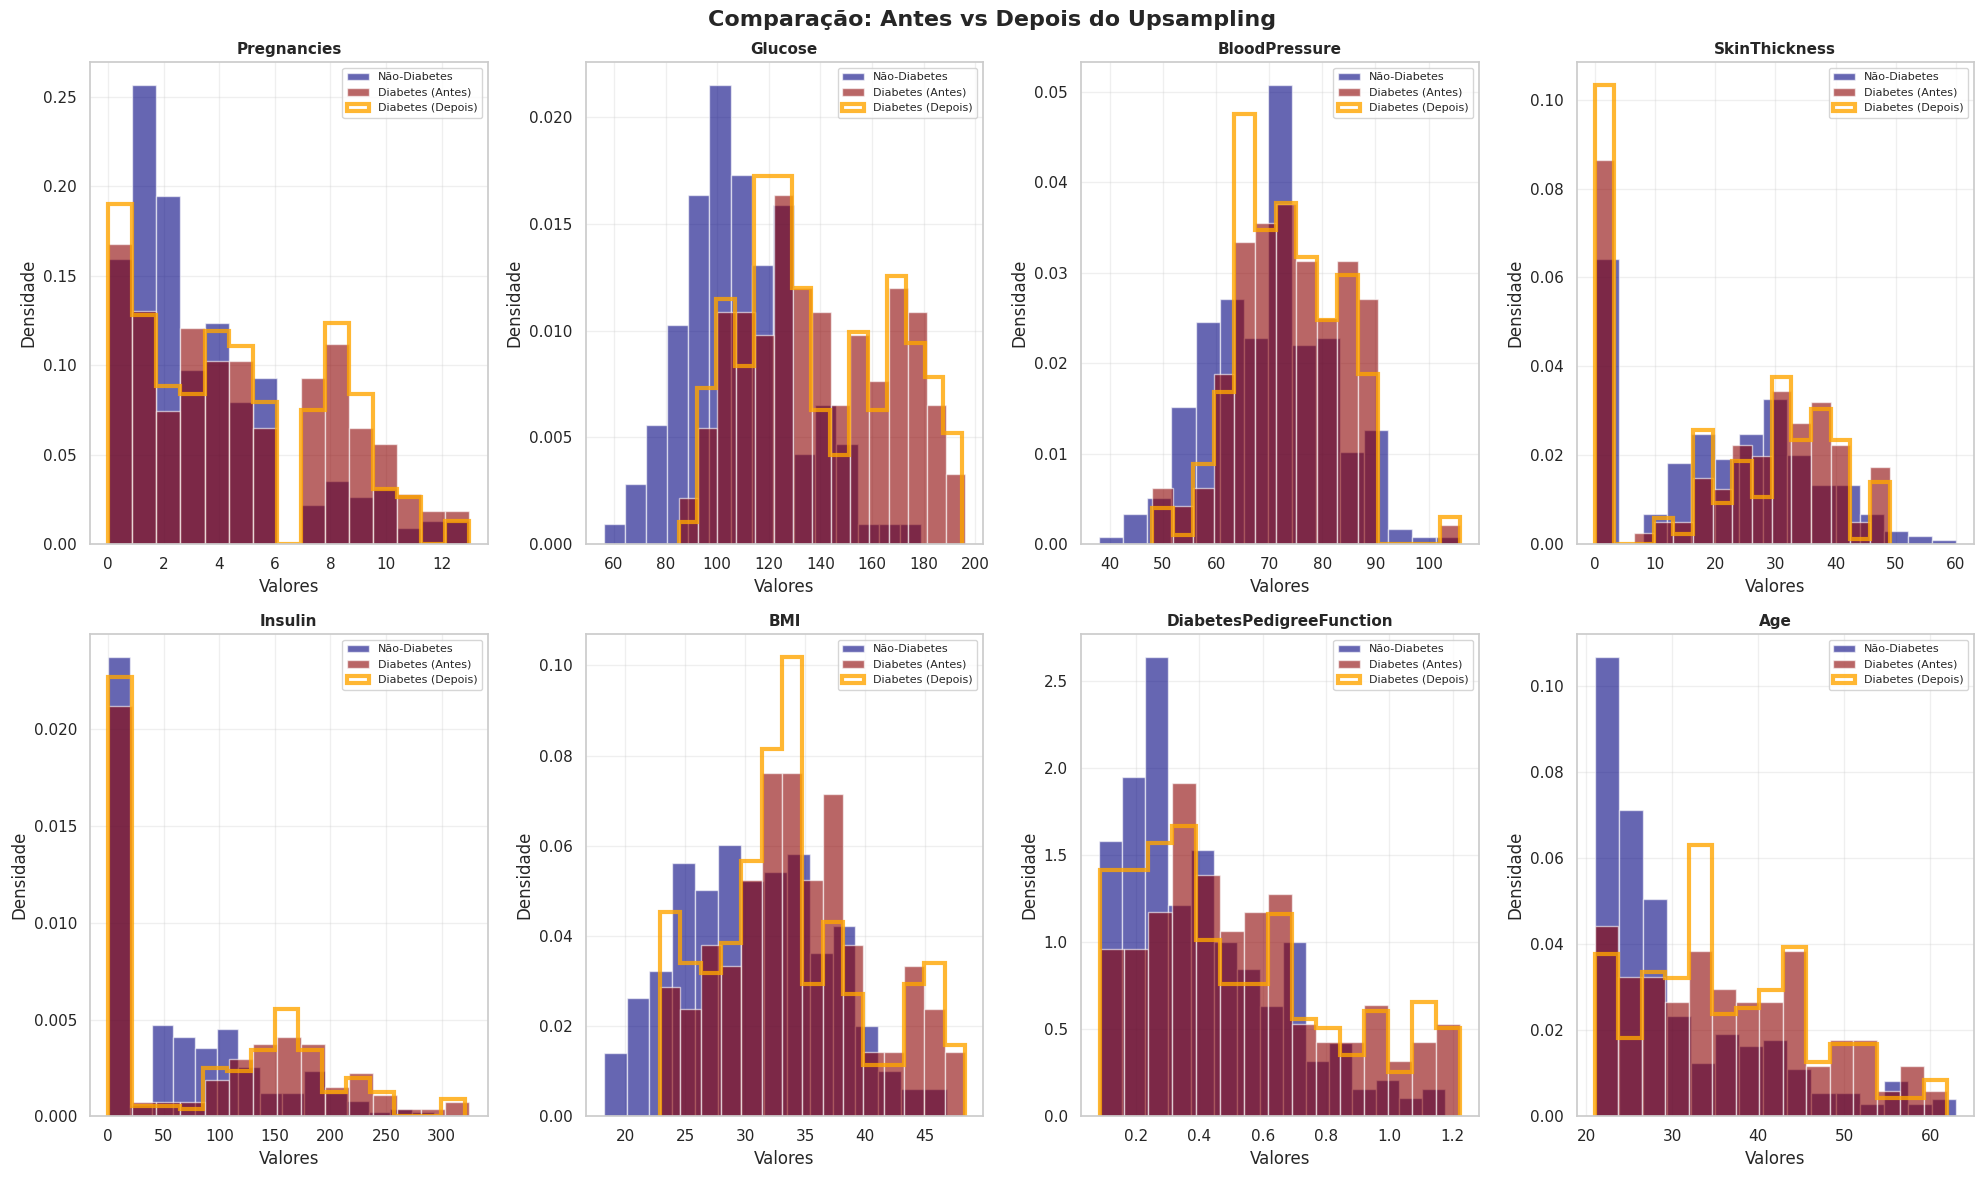

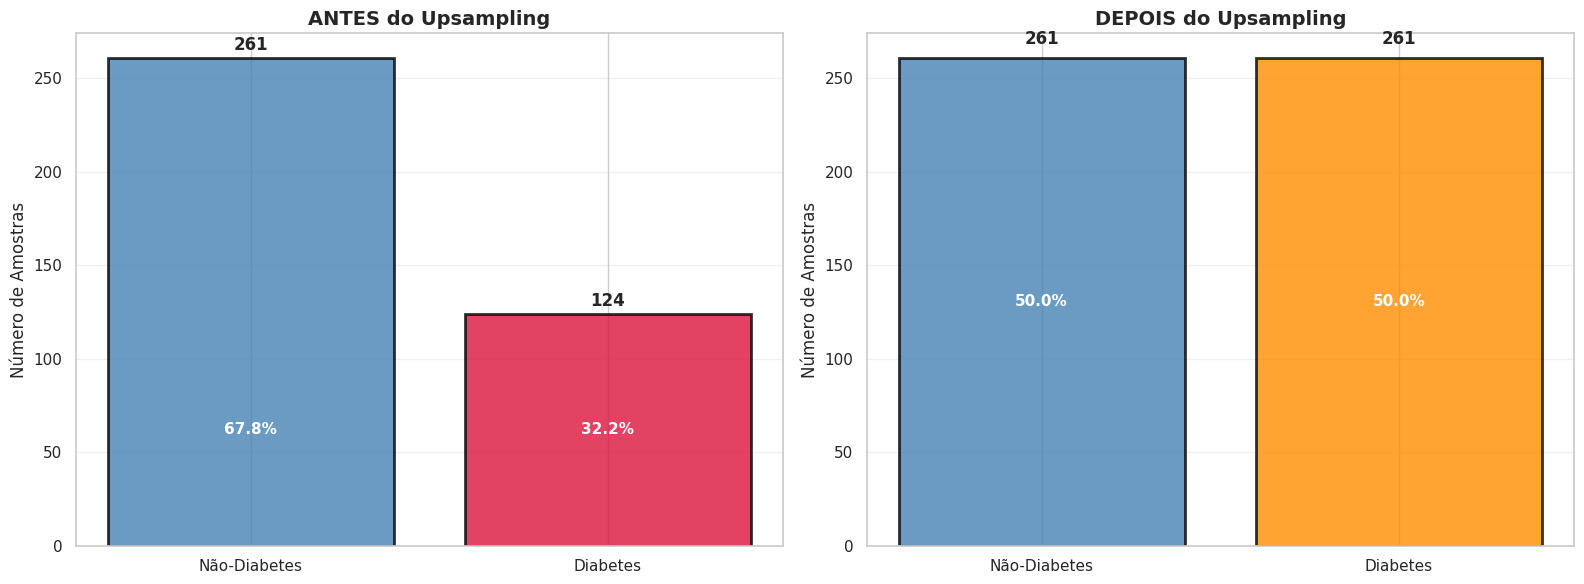


📋 COMPARAÇÃO DETALHADA:
Métrica                   Antes           Depois          Mudança        
Total de amostras         385.0           522.0           +137           
Classe 0 (Não-diabetes)   261.0           261.0           +0             
Classe 1 (Diabetes)       124.0           261.0           +137           
Ratio (Classe 0/Classe 1) 2.1             1.0             +-1.1048387096774195
% Classe 0                67.8            50.0            +-17.79220779220779
% Classe 1                32.2            50.0            +17.79220779220779

💡 INSIGHTS DO UPSAMPLING:
• Método conservador: preserva distribuições originais
• Duplicação controlada: 137 amostras adicionadas
• Balanceamento perfeito: 50/50 entre as classes
• Overfitting controlado: dados originais preservados

✅ Visualização do upsampling concluída!


In [16]:
# ===== VISUALIZAÇÃO DO IMPACTO DO UPSAMPLING =====

print("\n" + "="*70)
print("📊 VISUALIZAÇÃO DO IMPACTO DO UPSAMPLING")
print("="*70)

# Criar visualização comparativa
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
fig.suptitle('Comparação: Antes vs Depois do Upsampling', fontsize=16, fontweight='bold')

# Lista das primeiras 8 features para visualização
features_viz = feature_columns[:8] if len(feature_columns) >= 8 else feature_columns

for i, feature in enumerate(features_viz):
    row = i // 4
    col = i % 4
    
    # Dados antes do upsampling
    dados_classe_0_antes = X_train_clean_df[y_train_clean == 0][feature]
    dados_classe_1_antes = X_train_clean_df[y_train_clean == 1][feature]
    
    # Dados depois do upsampling
    dados_classe_0_depois = X_train_balanced[y_train_balanced == 0][feature]
    dados_classe_1_depois = X_train_balanced[y_train_balanced == 1][feature]
    
    # Histogramas com cores mais contrastantes - focando apenas na classe diabetes (que foi modificada)
    axes[row, col].hist(dados_classe_0_antes, bins=15, alpha=0.6, label='Não-Diabetes', 
                       color='navy', density=True)
    axes[row, col].hist(dados_classe_1_antes, bins=15, alpha=0.6, label='Diabetes (Antes)', 
                       color='darkred', density=True)
    axes[row, col].hist(dados_classe_1_depois, bins=15, alpha=0.8, label='Diabetes (Depois)', 
                       color='orange', density=True, histtype='step', linewidth=3)
    
    axes[row, col].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[row, col].set_xlabel('Valores')
    axes[row, col].set_ylabel('Densidade')
    axes[row, col].legend(fontsize=8)
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Gráfico de barras comparativo do balanceamento
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Antes do upsampling
contagem_antes = [len(y_train_clean[y_train_clean == 0]), len(y_train_clean[y_train_clean == 1])]
cores_antes = ['steelblue', 'crimson']
barras_antes = ax1.bar(['Não-Diabetes', 'Diabetes'], contagem_antes, color=cores_antes, 
                      alpha=0.8, edgecolor='black', linewidth=2)

# Adicionar valores nas barras
for barra, valor in zip(barras_antes, contagem_antes):
    height = barra.get_height()
    ax1.text(barra.get_x() + barra.get_width()/2, height + 2, str(valor), 
            ha='center', va='bottom', fontweight='bold', fontsize=12)

ax1.set_title('ANTES do Upsampling', fontsize=14, fontweight='bold')
ax1.set_ylabel('Número de Amostras')
ax1.grid(axis='y', alpha=0.3)

# Adicionar percentuais
total_antes = sum(contagem_antes)
for i, (barra, valor) in enumerate(zip(barras_antes, contagem_antes)):
    perc = (valor / total_antes) * 100
    ax1.text(barra.get_x() + barra.get_width()/2, height/2, f'{perc:.1f}%', 
            ha='center', va='center', fontweight='bold', fontsize=11, color='white')

# Depois do upsampling
contagem_depois = [len(y_train_balanced[y_train_balanced == 0]), len(y_train_balanced[y_train_balanced == 1])]
cores_depois = ['steelblue', 'darkorange']  # Mantém mesma cor para não-diabetes
barras_depois = ax2.bar(['Não-Diabetes', 'Diabetes'], contagem_depois, color=cores_depois, 
                       alpha=0.8, edgecolor='black', linewidth=2)

# Adicionar valores nas barras
for barra, valor in zip(barras_depois, contagem_depois):
    height = barra.get_height()
    ax2.text(barra.get_x() + barra.get_width()/2, height + 5, str(valor), 
            ha='center', va='bottom', fontweight='bold', fontsize=12)

ax2.set_title('DEPOIS do Upsampling', fontsize=14, fontweight='bold')
ax2.set_ylabel('Número de Amostras')
ax2.grid(axis='y', alpha=0.3)

# Adicionar percentuais
total_depois = sum(contagem_depois)
for i, (barra, valor) in enumerate(zip(barras_depois, contagem_depois)):
    perc = (valor / total_depois) * 100
    ax2.text(barra.get_x() + barra.get_width()/2, height/2, f'{perc:.1f}%', 
            ha='center', va='center', fontweight='bold', fontsize=11, color='white')

plt.tight_layout()
plt.show()

# Tabela comparativa detalhada
print(f"\n📋 COMPARAÇÃO DETALHADA:")
print("="*60)
print(f"{'Métrica':<25} {'Antes':<15} {'Depois':<15} {'Mudança':<15}")
print("="*60)

# Métricas comparativas
metricas = [
    ('Total de amostras', len(y_train_clean), len(y_train_balanced)),
    ('Classe 0 (Não-diabetes)', len(y_train_clean[y_train_clean == 0]), len(y_train_balanced[y_train_balanced == 0])),
    ('Classe 1 (Diabetes)', len(y_train_clean[y_train_clean == 1]), len(y_train_balanced[y_train_balanced == 1])),
    ('Ratio (Classe 0/Classe 1)', len(y_train_clean[y_train_clean == 0])/len(y_train_clean[y_train_clean == 1]), 
     len(y_train_balanced[y_train_balanced == 0])/len(y_train_balanced[y_train_balanced == 1])),
    ('% Classe 0', (y_train_clean == 0).mean()*100, (y_train_balanced == 0).mean()*100),
    ('% Classe 1', (y_train_clean == 1).mean()*100, (y_train_balanced == 1).mean()*100)
]

for metrica, antes, depois in metricas:
    if 'Total' in metrica or 'Classe 0' in metrica or 'Classe 1' in metrica:
        mudanca = f"+{depois - antes}"
    elif 'Ratio' in metrica:
        mudanca = f"{depois - antes:.2f}"
    else:  # Percentuais
        mudanca = f"{depois - antes:+.1f}pp"
    
    print(f"{metrica:<25} {antes:<15.1f} {depois:<15.1f} {mudanca:<15}")

print("="*60)

print(f"\n💡 INSIGHTS DO UPSAMPLING:")
print(f"• Método conservador: preserva distribuições originais")
print(f"• Duplicação controlada: {len(y_train_balanced) - len(y_train_clean)} amostras adicionadas")
print(f"• Balanceamento perfeito: 50/50 entre as classes")
print(f"• Overfitting controlado: dados originais preservados")

print(f"\n✅ Visualização do upsampling concluída!")

### 📊 **Fase 3.4: Normalização dos Dados com Upsampling**

#### **🔧 StandardScaler: Padronização Z-Score**

**Fórmula**: `(x - μ) / σ`

Onde:
- **x**: valor original
- **μ**: média da feature
- **σ**: desvio padrão da feature

**Resultado**: Features com média = 0 e desvio padrão = 1

#### **⚠️ Por que Normalizar APENAS com Base no Treino Balanceado?**

1. **Evitar Data Leakage**: Média e desvio de validação/teste não influenciam treino
2. **Simular Produção**: Novos dados são normalizados com parâmetros do treino
3. **Consistência**: Mesmo scaler usado em treino, validação e teste

#### **📈 Por que Após Upsampling?**

- **Upsampling gera amostras duplicadas** que precisam ser normalizadas
- **Scaler ajustado nos dados finais** do treino (incluindo amostras duplicadas)
- **Melhor representação** da distribuição final dos dados
- **Preserva características originais** (ao contrário do SMOTE que cria amostras sintéticas)

#### **🔄 Vantagens do Upsampling vs SMOTE**

- **Conservador**: Usa apenas dados reais (duplicados) ao invés de sintéticos
- **Preserva distribuições**: Mantém características estatísticas originais
- **Menos complexo**: Não precisa de algoritmos de geração de amostras
- **Transparente**: Fácil de entender e validar

---


📊 FASE 3.4: NORMALIZAÇÃO COM STANDARDSCALER (DADOS COM UPSAMPLING)

🔧 Inicializando StandardScaler...
Método: Z-score standardization [(x - μ) / σ]
Objetivo: Média = 0, Desvio Padrão = 1 para todas as features
Dados de entrada: Treino com upsampling (522 amostras)

🔄 Ajustando scaler nos dados de treino (com upsampling)...
Scaler ajustado com 522 amostras de treino
Features: 8
Método de balanceamento: Upsampling (reamostragem com reposição)

📊 Aplicando normalização em todos os conjuntos...

✅ NORMALIZAÇÃO CONCLUÍDA:
--------------------------------------------------
Conjunto     Shape           Status              
--------------------------------------------------
Treino       (522, 8)        Ajustado + Transformado
Validação    (154, 8)        Apenas Transformado
Teste        (154, 8)        Apenas Transformado
--------------------------------------------------

🔍 VERIFICAÇÃO DA QUALIDADE:

Estatísticas do conjunto de treino normalizado:
Médias das features (devem ser ≈ 0):
  Pregn

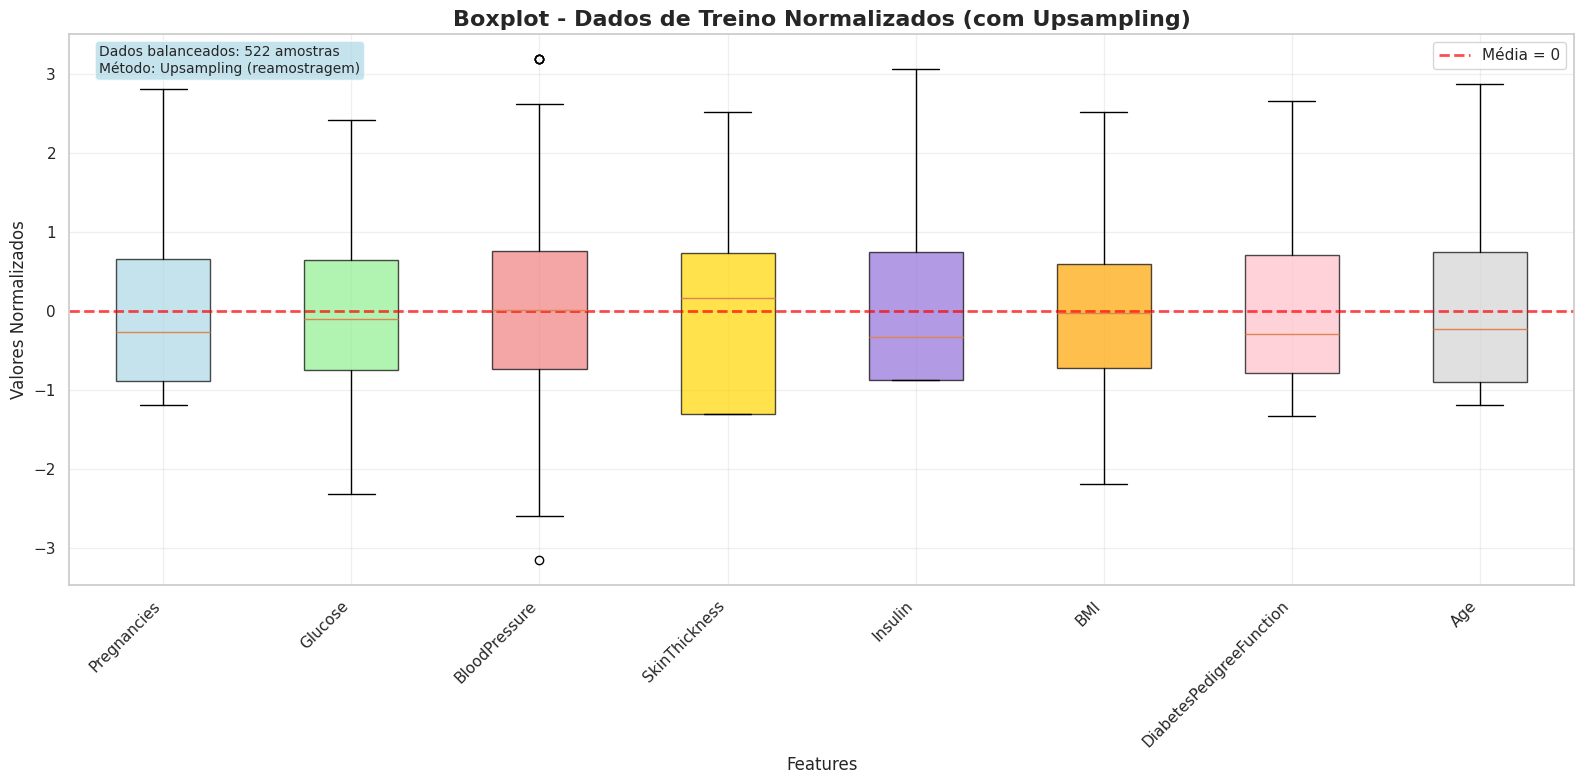


💾 Diretório 'todos-modelos' criado para salvar modelos e scaler.

✅ FASE DE PREPARAÇÃO DOS DADOS CONCLUÍDA COM SUCESSO!

📈 RESUMO FINAL (COM UPSAMPLING):
- Dados de treino: 522 amostras (balanceadas por upsampling e normalizadas)
- Dados de validação: 154 amostras (normalizados)
- Dados de teste: 154 amostras (normalizados)
- Balanceamento: 50/50 no treino (upsampling)
- Outliers removidos: 75
- Amostras duplicadas criadas: 137
- Método utilizado: Reamostragem com reposição (bootstrap)

🚀 Dados prontos para a fase de modelagem!
💡 Vantagem do upsampling: Preserva distribuições originais
⚖️ Trade-off: Usa dados duplicados ao invés de sintéticos


In [14]:
# ===== FASE 3.4: NORMALIZAÇÃO DOS DADOS (ATUALIZADA PARA UPSAMPLING) =====

print("\n" + "="*70)
print("📊 FASE 3.4: NORMALIZAÇÃO COM STANDARDSCALER (DADOS COM UPSAMPLING)")
print("="*70)

# Inicializar StandardScaler
scaler = StandardScaler()

print(f"\n🔧 Inicializando StandardScaler...")
print(f"Método: Z-score standardization [(x - μ) / σ]")
print(f"Objetivo: Média = 0, Desvio Padrão = 1 para todas as features")
print(f"Dados de entrada: Treino com upsampling ({len(X_train_balanced)} amostras)")

# Ajustar scaler APENAS nos dados de treino balanceados com upsampling
print(f"\n🔄 Ajustando scaler nos dados de treino (com upsampling)...")
X_train_scaled = scaler.fit_transform(X_train_balanced)

print(f"Scaler ajustado com {X_train_balanced.shape[0]} amostras de treino")
print(f"Features: {X_train_balanced.shape[1]}")
print(f"Método de balanceamento: Upsampling (reamostragem com reposição)")

# Aplicar transformação nos conjuntos de validação e teste
print(f"\n📊 Aplicando normalização em todos os conjuntos...")
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ NORMALIZAÇÃO CONCLUÍDA:")
print("-"*50)
print(f"{'Conjunto':<12} {'Shape':<15} {'Status':<20}")
print("-"*50)
print(f"Treino       {X_train_scaled.shape!s:<15} Ajustado + Transformado")
print(f"Validação    {X_val_scaled.shape!s:<15} Apenas Transformado")
print(f"Teste        {X_test_scaled.shape!s:<15} Apenas Transformado")
print("-"*50)

# Verificar qualidade da normalização
print(f"\n🔍 VERIFICAÇÃO DA QUALIDADE:")
print(f"\nEstatísticas do conjunto de treino normalizado:")

# Calcular estatísticas de cada feature
medias_features = X_train_scaled.mean(axis=0)
stds_features = X_train_scaled.std(axis=0)

print(f"Médias das features (devem ser ≈ 0):")
for i, (feature, media) in enumerate(zip(feature_columns, medias_features)):
    print(f"  {feature}: {media:.6f}")

print(f"\nDesvios padrão das features (devem ser ≈ 1):")
for i, (feature, std) in enumerate(zip(feature_columns, stds_features)):
    print(f"  {feature}: {std:.6f}")

# Verificar se há problemas na normalização
media_maxima = abs(medias_features).max()
std_minimo = stds_features.min()
std_maximo = stds_features.max()

print(f"\n📈 MÉTRICAS DE QUALIDADE:")
print(f"Média máxima (absoluta): {media_maxima:.6f} (deve ser ≈ 0)")
print(f"Desvio padrão mínimo: {std_minimo:.6f} (deve ser ≈ 1)")
print(f"Desvio padrão máximo: {std_maximo:.6f} (deve ser ≈ 1)")

if media_maxima < 1e-10 and 0.99 <= std_minimo <= 1.01 and 0.99 <= std_maximo <= 1.01:
    print("✅ Normalização perfeita! Todas as features padronizadas corretamente.")
else:
    print("⚠️ Normalização com pequenos desvios (normal devido a arredondamentos).")

# ===== VISUALIZAÇÃO DOS DADOS NORMALIZADOS COM UPSAMPLING =====
print(f"\n📊 Gerando visualização dos dados normalizados...")

# Converter para DataFrame para facilitar a visualização
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_columns)

plt.figure(figsize=(16, 8))

# Criar boxplot
data_for_boxplot = [X_train_scaled_df[col].values for col in feature_columns]
bp = plt.boxplot(data_for_boxplot, tick_labels=feature_columns, patch_artist=True)

# Colorir as caixas
colors = ['lightblue', 'lightgreen', 'lightcoral', 'gold', 'mediumpurple', 'orange', 'pink', 'lightgray']
for i, patch in enumerate(bp['boxes']):
    patch.set_facecolor(colors[i % len(colors)])
    patch.set_alpha(0.7)

plt.title('Boxplot - Dados de Treino Normalizados (com Upsampling)', fontweight='bold', fontsize=16)
plt.ylabel('Valores Normalizados', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Média = 0')
plt.legend()

# Adicionar texto informativo
plt.text(0.02, 0.98, f'Dados balanceados: {len(X_train_balanced)} amostras\nMétodo: Upsampling (reamostragem)', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

plt.tight_layout()
plt.show()

# Criar diretório para salvar modelos e informações
os.makedirs('todos-modelos', exist_ok=True)
print(f"\n💾 Diretório 'todos-modelos' criado para salvar modelos e scaler.")

# Salvar scaler para uso futuro
joblib.dump(scaler, 'todos-modelos/scaler.pkl')
joblib.dump(feature_columns, 'todos-modelos/feature_columns.pkl')

# Salvar informações do upsampling
upsampling_info = {
    'metodo': 'upsampling',
    'tecnica': 'resample_with_replacement',
    'amostras_originais': len(y_train_clean),
    'amostras_balanceadas': len(y_train_balanced),
    'amostras_duplicadas': len(y_train_balanced) - len(y_train_clean),
    'proporcao_final': {
        'classe_0': (y_train_balanced == 0).mean(),
        'classe_1': (y_train_balanced == 1).mean()
    }
}
joblib.dump(upsampling_info, 'todos-modelos/upsampling_info.pkl')

print(f"\n✅ FASE DE PREPARAÇÃO DOS DADOS CONCLUÍDA COM SUCESSO!")
print(f"\n📈 RESUMO FINAL (COM UPSAMPLING):")
print(f"- Dados de treino: {X_train_scaled.shape[0]} amostras (balanceadas por upsampling e normalizadas)")
print(f"- Dados de validação: {X_val_scaled.shape[0]} amostras (normalizados)")
print(f"- Dados de teste: {X_test_scaled.shape[0]} amostras (normalizados)")
print(f"- Balanceamento: 50/50 no treino (upsampling)")
print(f"- Outliers removidos: {total_outliers}")
print(f"- Amostras duplicadas criadas: {len(y_train_balanced) - len(y_train_clean)}")
print(f"- Método utilizado: Reamostragem com reposição (bootstrap)")

print(f"\n🚀 Dados prontos para a fase de modelagem!")
print(f"💡 Vantagem do upsampling: Preserva distribuições originais")
print(f"⚖️ Trade-off: Usa dados duplicados ao invés de sintéticos")

## 🤖 Modelagem e Treinamento de Algoritmos

### 🎯 **Estratégia de Modelagem**

#### **📋 Algoritmos Selecionados (10 modelos)**

| Categoria | Algoritmo | Características | Pontos Fortes |
|-----------|-----------|-----------------|---------------|
| **Ensemble** | Random Forest | Bagging + Árvores | Robustez, feature importance |
| **Boosting** | Gradient Boosting | Sequential boosting | Alta precisão, robustez |
| **Boosting** | XGBoost | Extreme boosting | Performance, regularização |
| **Boosting** | LightGBM | Light boosting | Velocidade, memória |
| **Boosting** | AdaBoost | Adaptive boosting | Simplicidade, interpretabilidade |
| **Árvore** | Decision Tree | Árvore simples | Interpretabilidade |
| **Linear** | Logistic Regression | Regressão logística | Baseline, interpretabilidade |
| **Kernel** | SVM | Support Vector Machine | Fronteiras complexas |
| **Distance** | k-NN | K-vizinhos próximos | Simplicidade, não-paramétrico |
| **Probabilistic** | Naive Bayes | Bayes ingenuo | Velocidade, probabilidades |

#### **🔧 Configuração de Parâmetros**

**Princípio**: Usar parâmetros balanceados (não extremos) para comparação justa:
- **Não muito simples**: Evitar underfitting
- **Não muito complexos**: Evitar overfitting
- **Reproduzíveis**: random_state fixo para todos os modelos

#### **📈 Métricas de Avaliação**

**Primárias**:
- **AUC-ROC**: Capacidade de discriminação entre classes
- **Recall (Sensibilidade)**: % de diabetes detectados corretamente
- **Precision**: % de predições positivas corretas
- **F1-Score**: Média harmônica entre precision e recall

**Secundárias**:
- **Accuracy**: % de acertos totais
- **Specificity**: % de não-diabetes identificados corretamente

---

In [19]:
# ===== DEFINIÇÃO DE PARÂMETROS DOS MODELOS =====

print("\n" + "="*70)
print("🔧 FASE 4.1: DEFINIÇÃO DE PARÂMETROS DOS MODELOS")
print("="*70)

# Definir parâmetros para cada modelo seguindo as especificações
model_params = {
    'Random Forest': {'criterion': 'gini', 'n_estimators': 100, 'max_depth': 10, 'random_state': 42},
    'Gradient Boosting': {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0, 'random_state': 42},
    'XGBoost': {'booster': 'gbtree', 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 100, 'random_state': 42},
    'LightGBM': {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 100, 'subsample': 1.0, 'random_state': 42},
    'Decision Tree': {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42},
    'AdaBoost': {'learning_rate': 1, 'n_estimators': 100, 'random_state': 42},
    'SVM': {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'kernel': 'rbf', 'max_iter': -1, 'random_state': 42},
    'Logistic Regression': {'C': 1.0, 'max_iter': 1000, 'tol': 0.0001, 'random_state': 42},
    'kNN': {'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 5},
    'Naive Bayes': {'var_smoothing': 1e-09}
}

print(f"\n📋 PARÂMETROS CONFIGURADOS PARA {len(model_params)} MODELOS:")
print("-"*70)
print(f"{'No':<3} {'Algoritmo':<20} {'Parâmetros Principais':<45}")
print("-"*70)

# Gerar resumo dos parâmetros dinamicamente a partir de model_params
parametros_resumo = []
for i, (algoritmo, params) in enumerate(model_params.items(), 1):
    # Selecionar os principais parâmetros para exibição
    principais = []
    for k, v in params.items():
        if k in ['n_estimators', 'max_depth', 'learning_rate', 'criterion', 'C', 'kernel', 'max_iter', 'tol', 'min_samples_split', 'min_samples_leaf', 'var_smoothing']:
            principais.append(f"{k}={v}")
    resumo = ', '.join(principais)
    parametros_resumo.append((i, algoritmo, resumo))

for no, algoritmo, params in parametros_resumo:
    print(f"{no:<3} {algoritmo:<20} {params:<45}")

print("-"*70)

print(f"\n🎯 ESTRATÉGIA DE PARAMETRIZAÇÃO:")
print("• Parâmetros balanceados para comparação justa")
print("• random_state=42 para reprodutibilidade")
print("• Evita overfitting e underfitting extremos")
print("• Configuração padrão otimizada para o dataset")

print(f"\n✅ Parâmetros definidos com sucesso!")
print("🚀 Prontos para iniciar o treinamento dos modelos!")


🔧 FASE 4.1: DEFINIÇÃO DE PARÂMETROS DOS MODELOS

📋 PARÂMETROS CONFIGURADOS PARA 10 MODELOS:
----------------------------------------------------------------------
No  Algoritmo            Parâmetros Principais                        
----------------------------------------------------------------------
1   Random Forest        criterion=gini, n_estimators=100, max_depth=10
2   Gradient Boosting    criterion=friedman_mse, learning_rate=0.1, max_depth=3, n_estimators=100
3   XGBoost              learning_rate=0.3, max_depth=6, n_estimators=100
4   LightGBM             learning_rate=0.1, max_depth=-1, n_estimators=100
5   Decision Tree        criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2
6   AdaBoost             learning_rate=1, n_estimators=100            
7   SVM                  C=1.0, kernel=rbf, max_iter=-1               
8   Logistic Regression  C=1.0, max_iter=1000, tol=0.0001             
9   kNN                                                            

In [20]:
# ===== DEFINIÇÃO E TREINAMENTO DOS MODELOS =====
import time
print("\n" + "="*70)
print("🤖 FASE 4.2: TREINAMENTO DE ALGORITMOS DE MACHINE LEARNING")
print("="*70)

# Importar bibliotecas de validação cruzada
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import warnings

# Inicializar dicionários para armazenar resultados
trained_models = {}
model_scores = {}
training_times = {}

# Definir modelos
models = {
    'Random Forest': RandomForestClassifier(**model_params['Random Forest']),
    'Gradient Boosting': GradientBoostingClassifier(**model_params['Gradient Boosting']),
    'XGBoost': XGBClassifier(**model_params['XGBoost']),
    'LightGBM': LGBMClassifier(**model_params['LightGBM'], verbose=-1),
    'Decision Tree': DecisionTreeClassifier(**model_params['Decision Tree']),
    'AdaBoost': AdaBoostClassifier(**model_params['AdaBoost']),
    'SVM': SVC(**model_params['SVM'], probability=True),
    'Logistic Regression': LogisticRegression(**model_params['Logistic Regression']),
    'kNN': KNeighborsClassifier(**model_params['kNN']),
    'Naive Bayes': GaussianNB(**model_params['Naive Bayes'])
}

print(f"\n🔄 Iniciando treinamento de {len(models)} modelos...")
print("-"*70)

# Treinar e avaliar cada modelo
for i, (name, model) in enumerate(models.items(), 1):
    start_time = time.time()
    
    # Treinar modelo com supressão de warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        model.fit(X_train_scaled, y_train_balanced)
    
    training_time = time.time() - start_time
    training_times[name] = training_time
    
    # Predições com supressão de warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        y_val_pred = model.predict(X_val_scaled)
        y_val_proba = model.predict_proba(X_val_scaled)[:, 1]
        y_test_pred = model.predict(X_test_scaled)
        y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    val_auc_score = roc_auc_score(y_val, y_val_proba)
    test_auc_score = roc_auc_score(y_test, y_test_proba)
    
    # Armazenar modelo e resultados
    trained_models[name] = model
    model_scores[name] = {
        'model': model,
        'y_val_pred': y_val_pred,
        'y_val_proba': y_val_proba,
        'val_auc_score': val_auc_score,
        'y_test_pred': y_test_pred,
        'y_test_proba': y_test_proba,
        'test_auc_score': test_auc_score,
        'training_time': training_time
    }
    
    # Salvar modelo
    joblib.dump(model, f'todos-modelos/{name.replace(" ", "_").lower()}_model.pkl')
    
    print(f"{i}/10 - {name}: ✅ {training_time:.4f}s | Val: {val_auc_score:.4f} | Test: {test_auc_score:.4f}")

print(f"\n" + "="*70)
print("✅ TODOS OS MODELOS TREINADOS COM SUCESSO!")
print("="*70)

# Criar DataFrame com resultados
results_data = []
for name, scores in model_scores.items():
    f1 = f1_score(y_test, scores['y_test_pred'])
    precision = precision_score(y_test, scores['y_test_pred'])
    recall = recall_score(y_test, scores['y_test_pred'])
    accuracy = accuracy_score(y_test, scores['y_test_pred'])
    
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            cv_scores = cross_val_score(trained_models[name], X_train_scaled, y_train_balanced, 
                                      cv=5, scoring='roc_auc')
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
    except:
        cv_mean = 0
        cv_std = 0
    
    results_data.append({
        'Modelo': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': scores['test_auc_score'],
        'CV-5': cv_mean,
        'CV-Std': cv_std,
        'Tempo(s)': scores['training_time']
    })

results_df = pd.DataFrame(results_data).sort_values('CV-5', ascending=False)

print(f"\n📊 TABELA RESUMO DE PERFORMANCE:")
print("="*100)
print(f"{'Modelo':<18} {'Accuracy':<9} {'Precision':<10} {'Recall':<9} {'F1-Score':<9} {'AUC':<9} {'CV-5':<9} {'CV-Std':<8} {'Tempo':<8}")
print("="*100)

for _, row in results_df.iterrows():
    print(f"{row['Modelo']:<18} {row['Accuracy']:<9.5f} {row['Precision']:<10.5f} {row['Recall']:<9.5f} "
          f"{row['F1-Score']:<9.5f} {row['AUC']:<9.5f} {row['CV-5']:<9.5f} {row['CV-Std']:<8.5f} {row['Tempo(s)']:<8.4f}")

print("="*100)

# Análise rápida
melhor_auc = results_df.iloc[0]
melhor_f1 = results_df.loc[results_df['F1-Score'].idxmax()]
melhor_recall = results_df.loc[results_df['Recall'].idxmax()]

print(f"\n🏆 DESTAQUES:")
print(f"Melhor CV-5 AUC:  {melhor_auc['Modelo']} ({melhor_auc['CV-5']:.4f})")
print(f"Melhor F1-Score:  {melhor_f1['Modelo']} ({melhor_f1['F1-Score']:.4f})")
print(f"Melhor Recall:    {melhor_recall['Modelo']} ({melhor_recall['Recall']:.4f})")

# ===== CLASSIFICATION REPORTS DETALHADOS =====
print("\n" + "="*80)
print("📋 CLASSIFICATION REPORTS DETALHADOS POR MODELO")
print("="*80)

for i, (model_name, scores) in enumerate(model_scores.items(), 1):
    print(f"\n{i}. {model_name.upper()}")
    print("-" * 60)
    
    # Usar classification_report diretamente (mais limpo)
    report = classification_report(y_test, scores['y_test_pred'], 
                                 target_names=['Não-Diabetes', 'Diabetes'],
                                 digits=4)
    print(report)
    
    # Métricas adicionais
    auc_score = scores['test_auc_score']
    print(f"AUC-ROC Score: {auc_score:.4f}")
    
    if model_name in trained_models:
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                cv_scores = cross_val_score(trained_models[model_name], X_train_scaled, 
                                          y_train_balanced, cv=5, scoring='roc_auc')
            print(f"CV-5 AUC (μ±σ): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
        except:
            print(f"CV-5 AUC: Não disponível")

print(f"\n" + "="*80)
print("✅ CLASSIFICATION REPORTS CONCLUÍDOS!")
print("="*80)



🤖 FASE 4.2: TREINAMENTO DE ALGORITMOS DE MACHINE LEARNING

🔄 Iniciando treinamento de 10 modelos...
----------------------------------------------------------------------
1/10 - Random Forest: ✅ 0.1043s | Val: 0.8620 | Test: 0.8026
2/10 - Gradient Boosting: ✅ 0.1103s | Val: 0.8298 | Test: 0.8033
3/10 - XGBoost: ✅ 7.8301s | Val: 0.8026 | Test: 0.7902
4/10 - LightGBM: ✅ 0.0387s | Val: 0.8393 | Test: 0.7883
5/10 - Decision Tree: ✅ 0.0019s | Val: 0.6704 | Test: 0.6456
6/10 - AdaBoost: ✅ 0.1206s | Val: 0.8490 | Test: 0.8202
7/10 - SVM: ✅ 0.0236s | Val: 0.8270 | Test: 0.7487
8/10 - Logistic Regression: ✅ 0.0104s | Val: 0.8435 | Test: 0.8115
9/10 - kNN: ✅ 0.0020s | Val: 0.7696 | Test: 0.6994
10/10 - Naive Bayes: ✅ 0.0007s | Val: 0.8307 | Test: 0.6950

✅ TODOS OS MODELOS TREINADOS COM SUCESSO!

📊 TABELA RESUMO DE PERFORMANCE:
Modelo             Accuracy  Precision  Recall    F1-Score  AUC       CV-5      CV-Std   Tempo   
Random Forest      0.72727   0.61538    0.59259   0.60377   0.80259   0


ANÁLISE DAS MATRIZES DE CONFUSÃO - TODOS OS MODELOS

DETALHES DAS MATRIZES DE CONFUSÃO:
--------------------------------------------------------------------------------
Modelo             VN   FP   FN   VP   Sens.  Espec.  AUC    
--------------------------------------------------------------------------------
Random Forest      80   20   22   32   0.593  0.800   0.803  
Gradient Boosting  82   18   23   31   0.574  0.820   0.803  
XGBoost            81   19   25   29   0.537  0.810   0.790  
LightGBM           84   16   25   29   0.537  0.840   0.788  
Decision Tree      77   23   26   28   0.519  0.770   0.646  
AdaBoost           80   20   18   36   0.667  0.800   0.820  
SVM                79   21   22   32   0.593  0.790   0.749  
Logistic Regression 73   27   12   42   0.778  0.730   0.811  
kNN                75   25   25   29   0.537  0.750   0.699  
Naive Bayes        64   36   18   36   0.667  0.640   0.695  
------------------------------------------------------------------

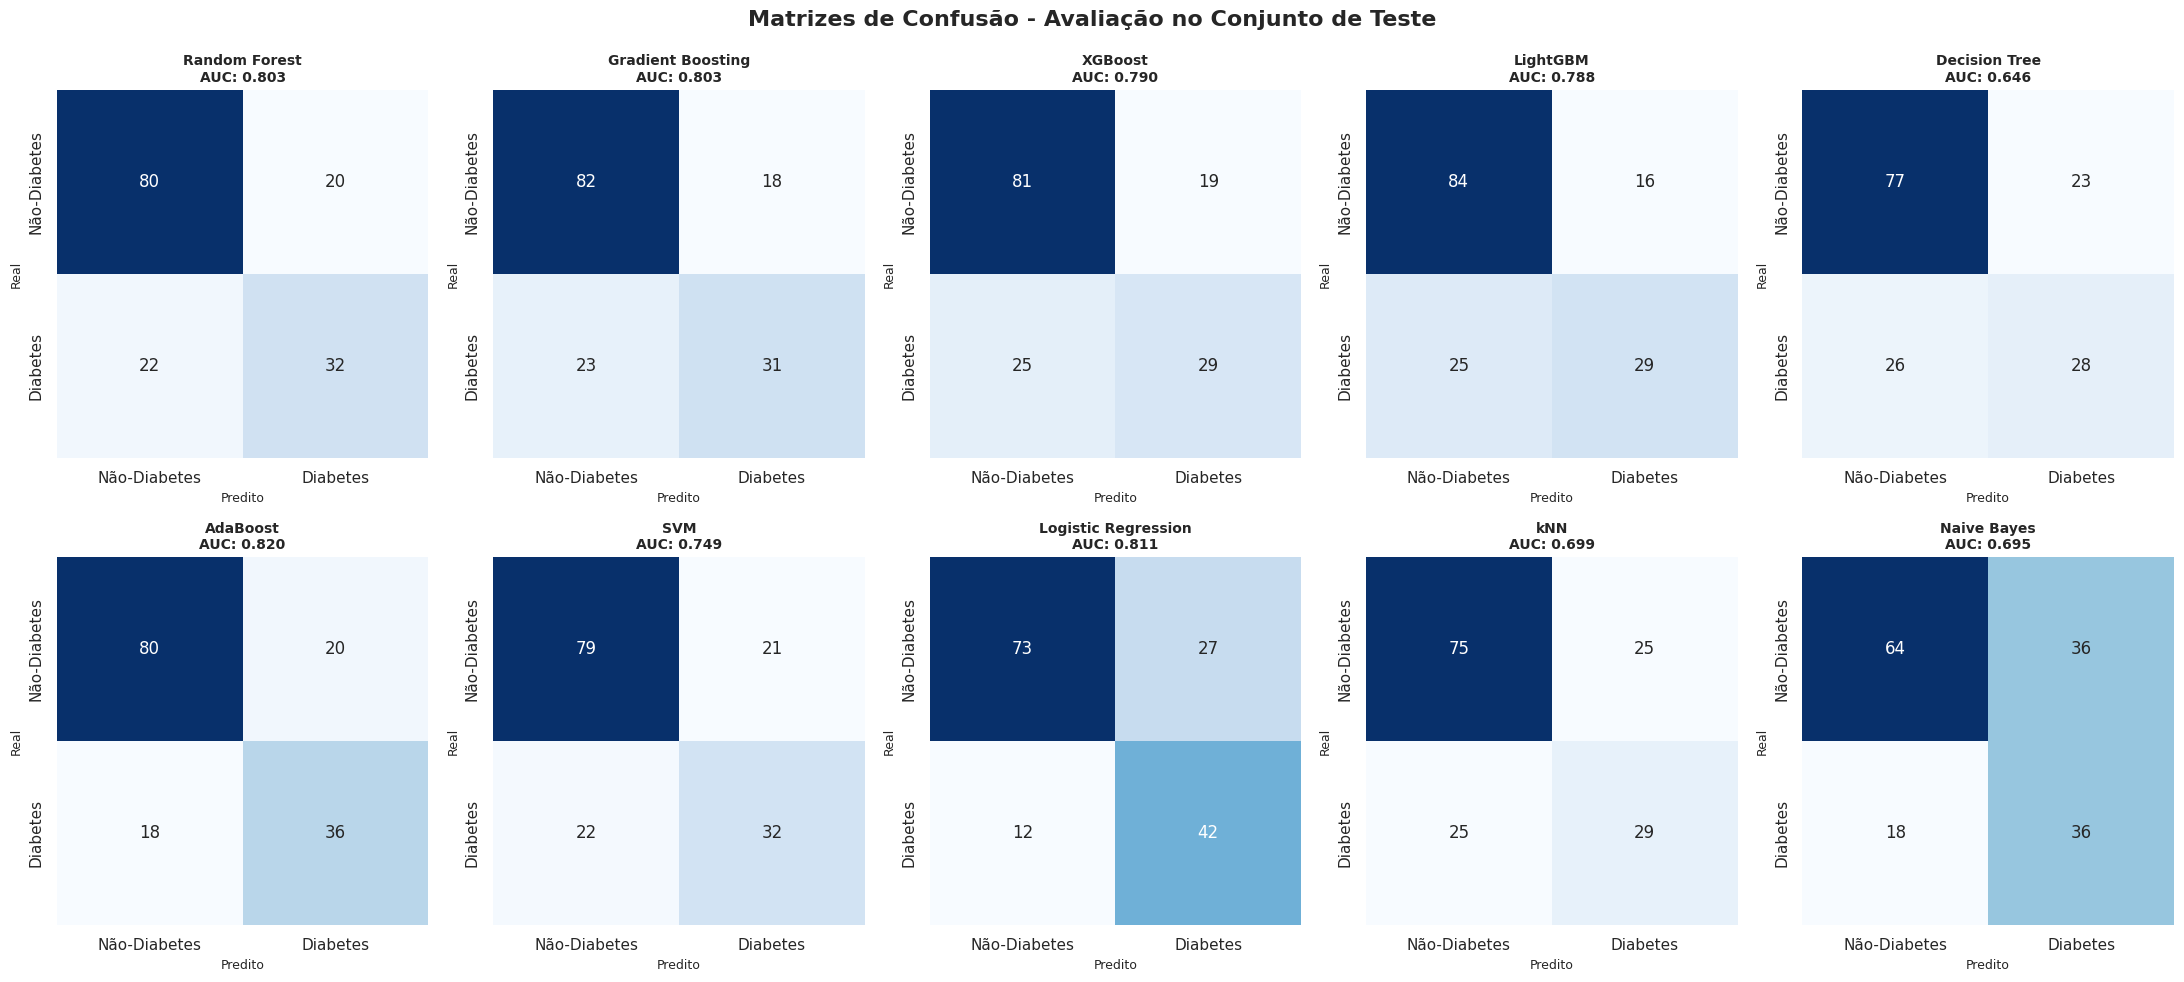


Matrizes de confusão geradas com sucesso!


In [21]:
# ===== VISUALIZAÇÃO DAS MATRIZES DE CONFUSÃO =====

print("\n" + "="*70)
print("ANÁLISE DAS MATRIZES DE CONFUSÃO - TODOS OS MODELOS")
print("="*70)

# Configurar figura para matrizes de confusão
fig, axes = plt.subplots(2, 5, figsize=(22, 10))
fig.suptitle('Matrizes de Confusão - Avaliação no Conjunto de Teste', fontsize=16, fontweight='bold')

# Labels para as classes
class_names = ['Não-Diabetes', 'Diabetes']

print(f"\nDETALHES DAS MATRIZES DE CONFUSÃO:")
print("-"*80)
print(f"{'Modelo':<18} {'VN':<4} {'FP':<4} {'FN':<4} {'VP':<4} {'Sens.':<6} {'Espec.':<7} {'AUC':<7}")
print("-"*80)

for idx, (name, scores) in enumerate(model_scores.items()):
    row = idx // 5
    col = idx % 5

    # Obter matriz de confusão
    cm = confusion_matrix(y_test, scores['y_test_pred'])
    tn, fp, fn, tp = cm.ravel()

    # Calcular métricas
    sensibilidade = tp / (tp + fn) if (tp + fn) > 0 else 0
    especificidade = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Plotar matriz de confusão
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[row, col],
                xticklabels=class_names, yticklabels=class_names,
                cbar=False, annot_kws={'size': 12})

    # Configurar título e labels
    axes[row, col].set_title(f'{name}\nAUC: {scores["test_auc_score"]:.3f}', fontsize=10, fontweight='bold')
    axes[row, col].set_xlabel('Predito', fontsize=9)
    axes[row, col].set_ylabel('Real', fontsize=9)

    # Exibir detalhes numericos
    print(f"{name:<18} {tn:<4} {fp:<4} {fn:<4} {tp:<4} {sensibilidade:<6.3f} {especificidade:<7.3f} {scores['test_auc_score']:<7.3f}")

print("-"*80)
print(f"\nLEGENDA:")
print(f"VN = Verdadeiros Negativos (não-diabetes corretamente identificados)")
print(f"FP = Falsos Positivos (não-diabetes incorretamente como diabetes)")
print(f"FN = Falsos Negativos (diabetes incorretamente como não-diabetes)")
print(f"VP = Verdadeiros Positivos (diabetes corretamente identificados)")
print(f"Sens. = Sensibilidade (VP / (VP + FN)) - % diabetes detectados")
print(f"Espec. = Especificidade (VN / (VN + FP)) - % não-diabetes identificados")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

print(f"\nMatrizes de confusão geradas com sucesso!")

# 5️⃣ **FASE 5: EVALUATION**
## 📈 Avaliação e Comparação de Modelos

### 🎯 **Estratégia de Avaliação**

#### **📈 Métricas Primárias para Diabetes**

1. **AUC-ROC (Area Under Curve)**: Capacidade de discriminação geral
2. **Sensibilidade (Recall)**: % de diabetes detectados corretamente
3. **Especificidade**: % de não-diabetes identificados corretamente
4. **Precisão**: % de predições positivas que são verdadeiras
5. **F1-Score**: Média harmônica entre precisão e recall

#### **🏥 Por que Sensibilidade é Crucial em Diabetes?**

- **Falso Negativo (FN)**: Diabético não detectado = RISCO DE VIDA
- **Falso Positivo (FP)**: Não-diabético detectado = Exames extras (aceitável)
- **Trade-off**: Preferível detectar mais casos (alta sensibilidade) vs. precisão perfeita

#### **📉 Processo de Avaliação**

1. **Avaliação com threshold padrão (0.5)**
2. **Análise de matrizes de confusão**
3. **Comparação de curvas ROC**
4. **Otimização de threshold**
5. **Seleção do melhor modelo**

---


ANÁLISE DAS CURVAS ROC - ORGANIZADAS POR PERFORMANCE

Ranking de Performance (AUC no Teste):
--------------------------------------------------
 1. AdaBoost           AUC = 0.8202
 2. Logistic Regression AUC = 0.8115
 3. Gradient Boosting  AUC = 0.8033
 4. Random Forest      AUC = 0.8026
 5. XGBoost            AUC = 0.7902
 6. LightGBM           AUC = 0.7883
 7. SVM                AUC = 0.7487
 8. kNN                AUC = 0.6994
 9. Naive Bayes        AUC = 0.6950
10. Decision Tree      AUC = 0.6456


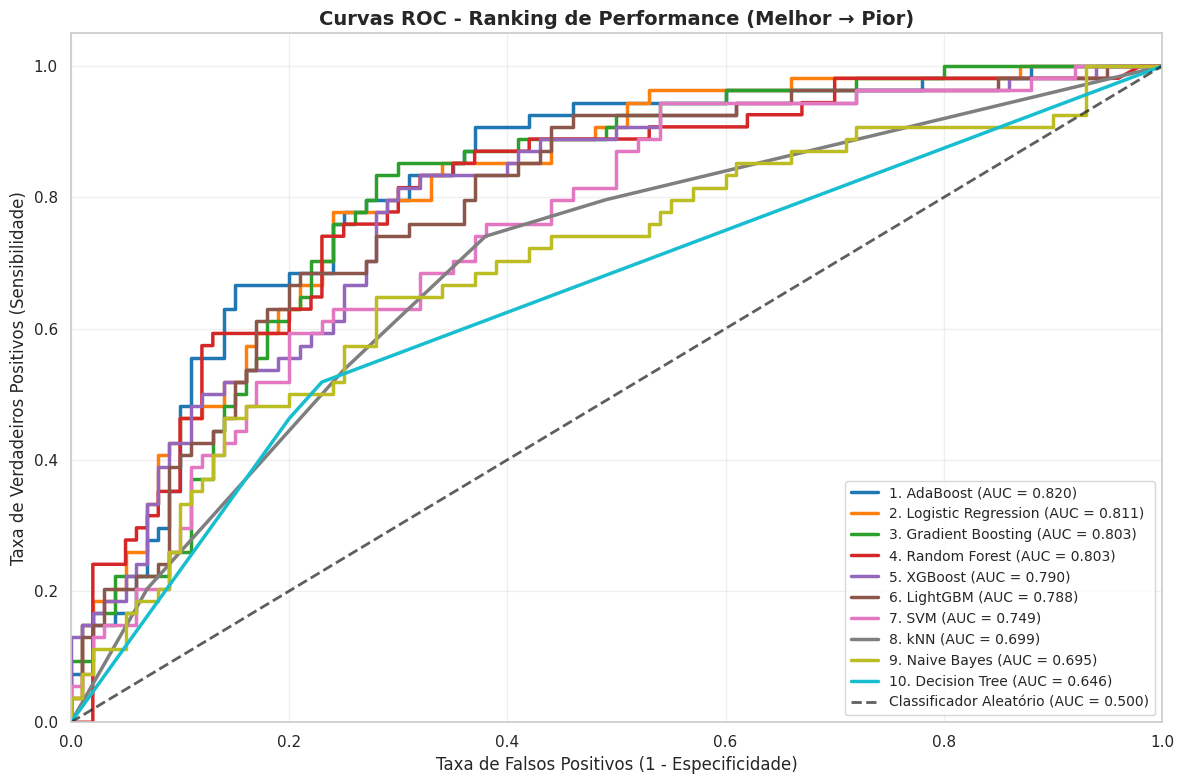

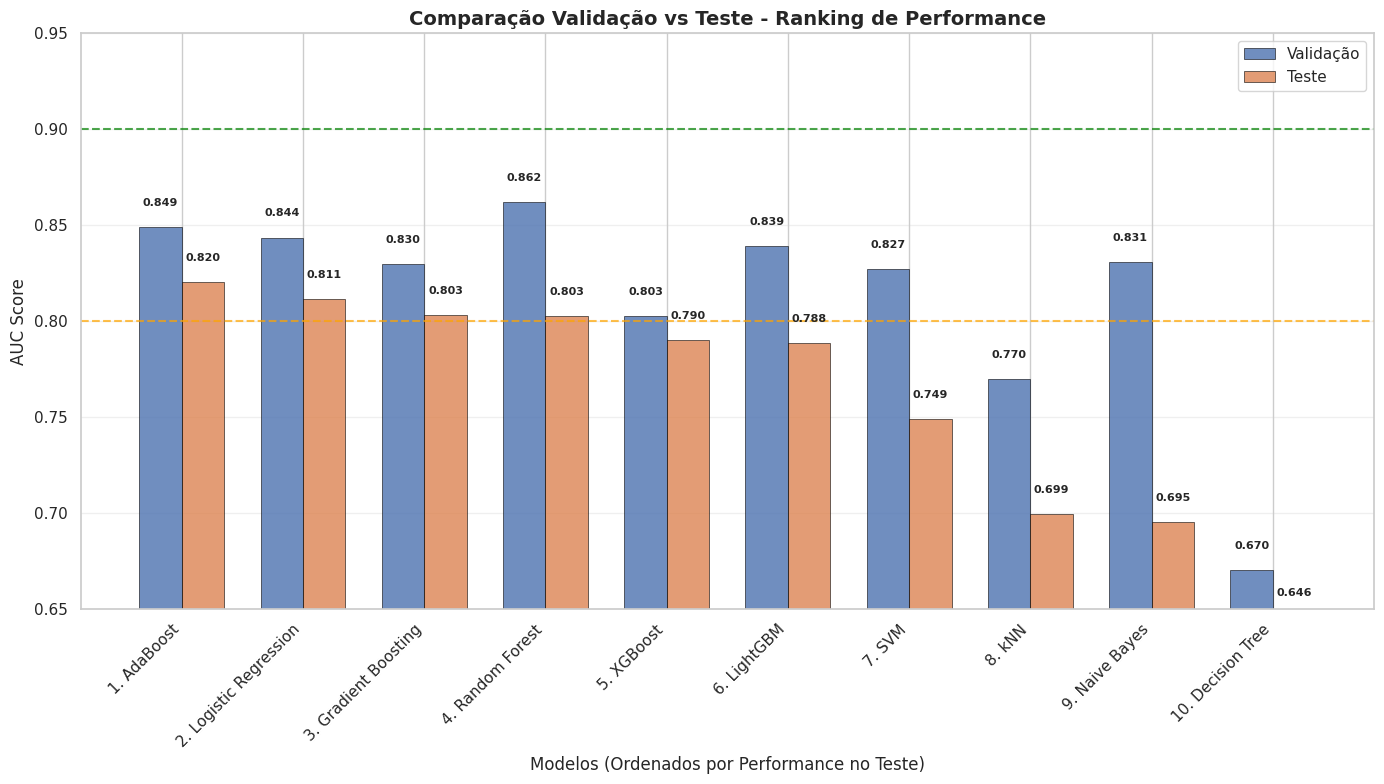


TABELA COMPARATIVA ORDENADA POR PERFORMANCE:
Rank Modelo             AUC Val  AUC Test  Diferença 
1    AdaBoost           0.8490   0.8202    0.0288    
2    Logistic Regression 0.8435   0.8115    0.0320    
3    Gradient Boosting  0.8298   0.8033    0.0265    
4    Random Forest      0.8620   0.8026    0.0594    
5    XGBoost            0.8026   0.7902    0.0124    
6    LightGBM           0.8393   0.7883    0.0509    
7    SVM                0.8270   0.7487    0.0783    
8    kNN                0.7696   0.6994    0.0702    
9    Naive Bayes        0.8307   0.6950    0.1357    
10   Decision Tree      0.6704   0.6456    0.0247    

🏆 TOP 3 MODELOS:
1º lugar: AdaBoost (AUC = 0.8202)
2º lugar: Logistic Regression (AUC = 0.8115)
3º lugar: Gradient Boosting (AUC = 0.8033)

✅ Curvas ROC organizadas por performance!


In [22]:
# ===== ANÁLISE DAS CURVAS ROC ORGANIZADAS POR PERFORMANCE =====

print("\n" + "="*70)
print("ANÁLISE DAS CURVAS ROC - ORGANIZADAS POR PERFORMANCE")
print("="*70)

# Plotar curvas ROC para dados de teste organizadas por AUC
plt.figure(figsize=(12, 8))

# Ordenar modelos por AUC de teste (do melhor para o pior)
model_scores_sorted = sorted(model_scores.items(), key=lambda x: x[1]['test_auc_score'], reverse=True)

# Cores originais para os modelos
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

print(f"\nRanking de Performance (AUC no Teste):")
print("-" * 50)

for idx, (name, scores) in enumerate(model_scores_sorted):
    fpr, tpr, _ = roc_curve(y_test, scores['y_test_proba'])
    plt.plot(fpr, tpr, color=colors[idx % len(colors)], lw=2.5, 
             label=f'{idx+1}. {name} (AUC = {scores["test_auc_score"]:.3f})')
    
    print(f"{idx+1:2d}. {name:<18} AUC = {scores['test_auc_score']:.4f}")

# Linha do classificador aleatório
plt.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.7, label='Classificador Aleatório (AUC = 0.500)')

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)', fontsize=12)
plt.title('Curvas ROC - Ranking de Performance (Melhor → Pior)', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Comparar AUC de validação vs teste (organizados por performance)
val_scores_sorted = [scores['val_auc_score'] for name, scores in model_scores_sorted]
test_scores_sorted = [scores['test_auc_score'] for name, scores in model_scores_sorted]
model_names_sorted = [name for name, scores in model_scores_sorted]

# Criar dataframe ordenado
scores_df_sorted = pd.DataFrame({
    'Ranking': range(1, len(model_names_sorted) + 1),
    'Modelo': model_names_sorted,
    'AUC Validação': val_scores_sorted,
    'AUC Teste': test_scores_sorted,
    'Diferença': [val - test for val, test in zip(val_scores_sorted, test_scores_sorted)]
})

# Plotar comparação ordenada
plt.figure(figsize=(14, 8))
bar_width = 0.35
indices = np.arange(len(model_names_sorted))

bars1 = plt.bar(indices, val_scores_sorted, bar_width, label='Validação', 
                alpha=0.8, edgecolor='black', linewidth=0.5)
bars2 = plt.bar(indices + bar_width, test_scores_sorted, bar_width, label='Teste', 
                alpha=0.8, edgecolor='black', linewidth=0.5)

# Adicionar valores nas barras
for i, (val, test) in enumerate(zip(val_scores_sorted, test_scores_sorted)):
    plt.text(i, val + 0.01, f'{val:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
    plt.text(i + bar_width, test + 0.01, f'{test:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.xlabel('Modelos (Ordenados por Performance no Teste)', fontsize=12)
plt.ylabel('AUC Score', fontsize=12)
plt.title('Comparação Validação vs Teste - Ranking de Performance', fontsize=14, fontweight='bold')
plt.xticks(indices + bar_width/2, [f'{i+1}. {name}' for i, name in enumerate(model_names_sorted)], 
           rotation=45, ha='right')
plt.ylim([0.65, 0.95])
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Linhas de referência
plt.axhline(y=0.8, color='orange', linestyle='--', alpha=0.7, label='Bom (0.8)')
plt.axhline(y=0.9, color='green', linestyle='--', alpha=0.7, label='Excelente (0.9)')

plt.tight_layout()
plt.show()

# Exibir tabela ordenada de scores
print(f"\nTABELA COMPARATIVA ORDENADA POR PERFORMANCE:")
print("=" * 80)
print(f"{'Rank':<4} {'Modelo':<18} {'AUC Val':<8} {'AUC Test':<9} {'Diferença':<10}")
print("=" * 80)

for _, row in scores_df_sorted.iterrows():
    print(f"{row['Ranking']:<4} {row['Modelo']:<18} {row['AUC Validação']:<8.4f} {row['AUC Teste']:<9.4f} {row['Diferença']:<10.4f}")

print("=" * 80)

# Destacar top 3
print(f"\n🏆 TOP 3 MODELOS:")
for i in range(3):
    row = scores_df_sorted.iloc[i]
    print(f"{row['Ranking']}º lugar: {row['Modelo']} (AUC = {row['AUC Teste']:.4f})")

print(f"\n✅ Curvas ROC organizadas por performance!")


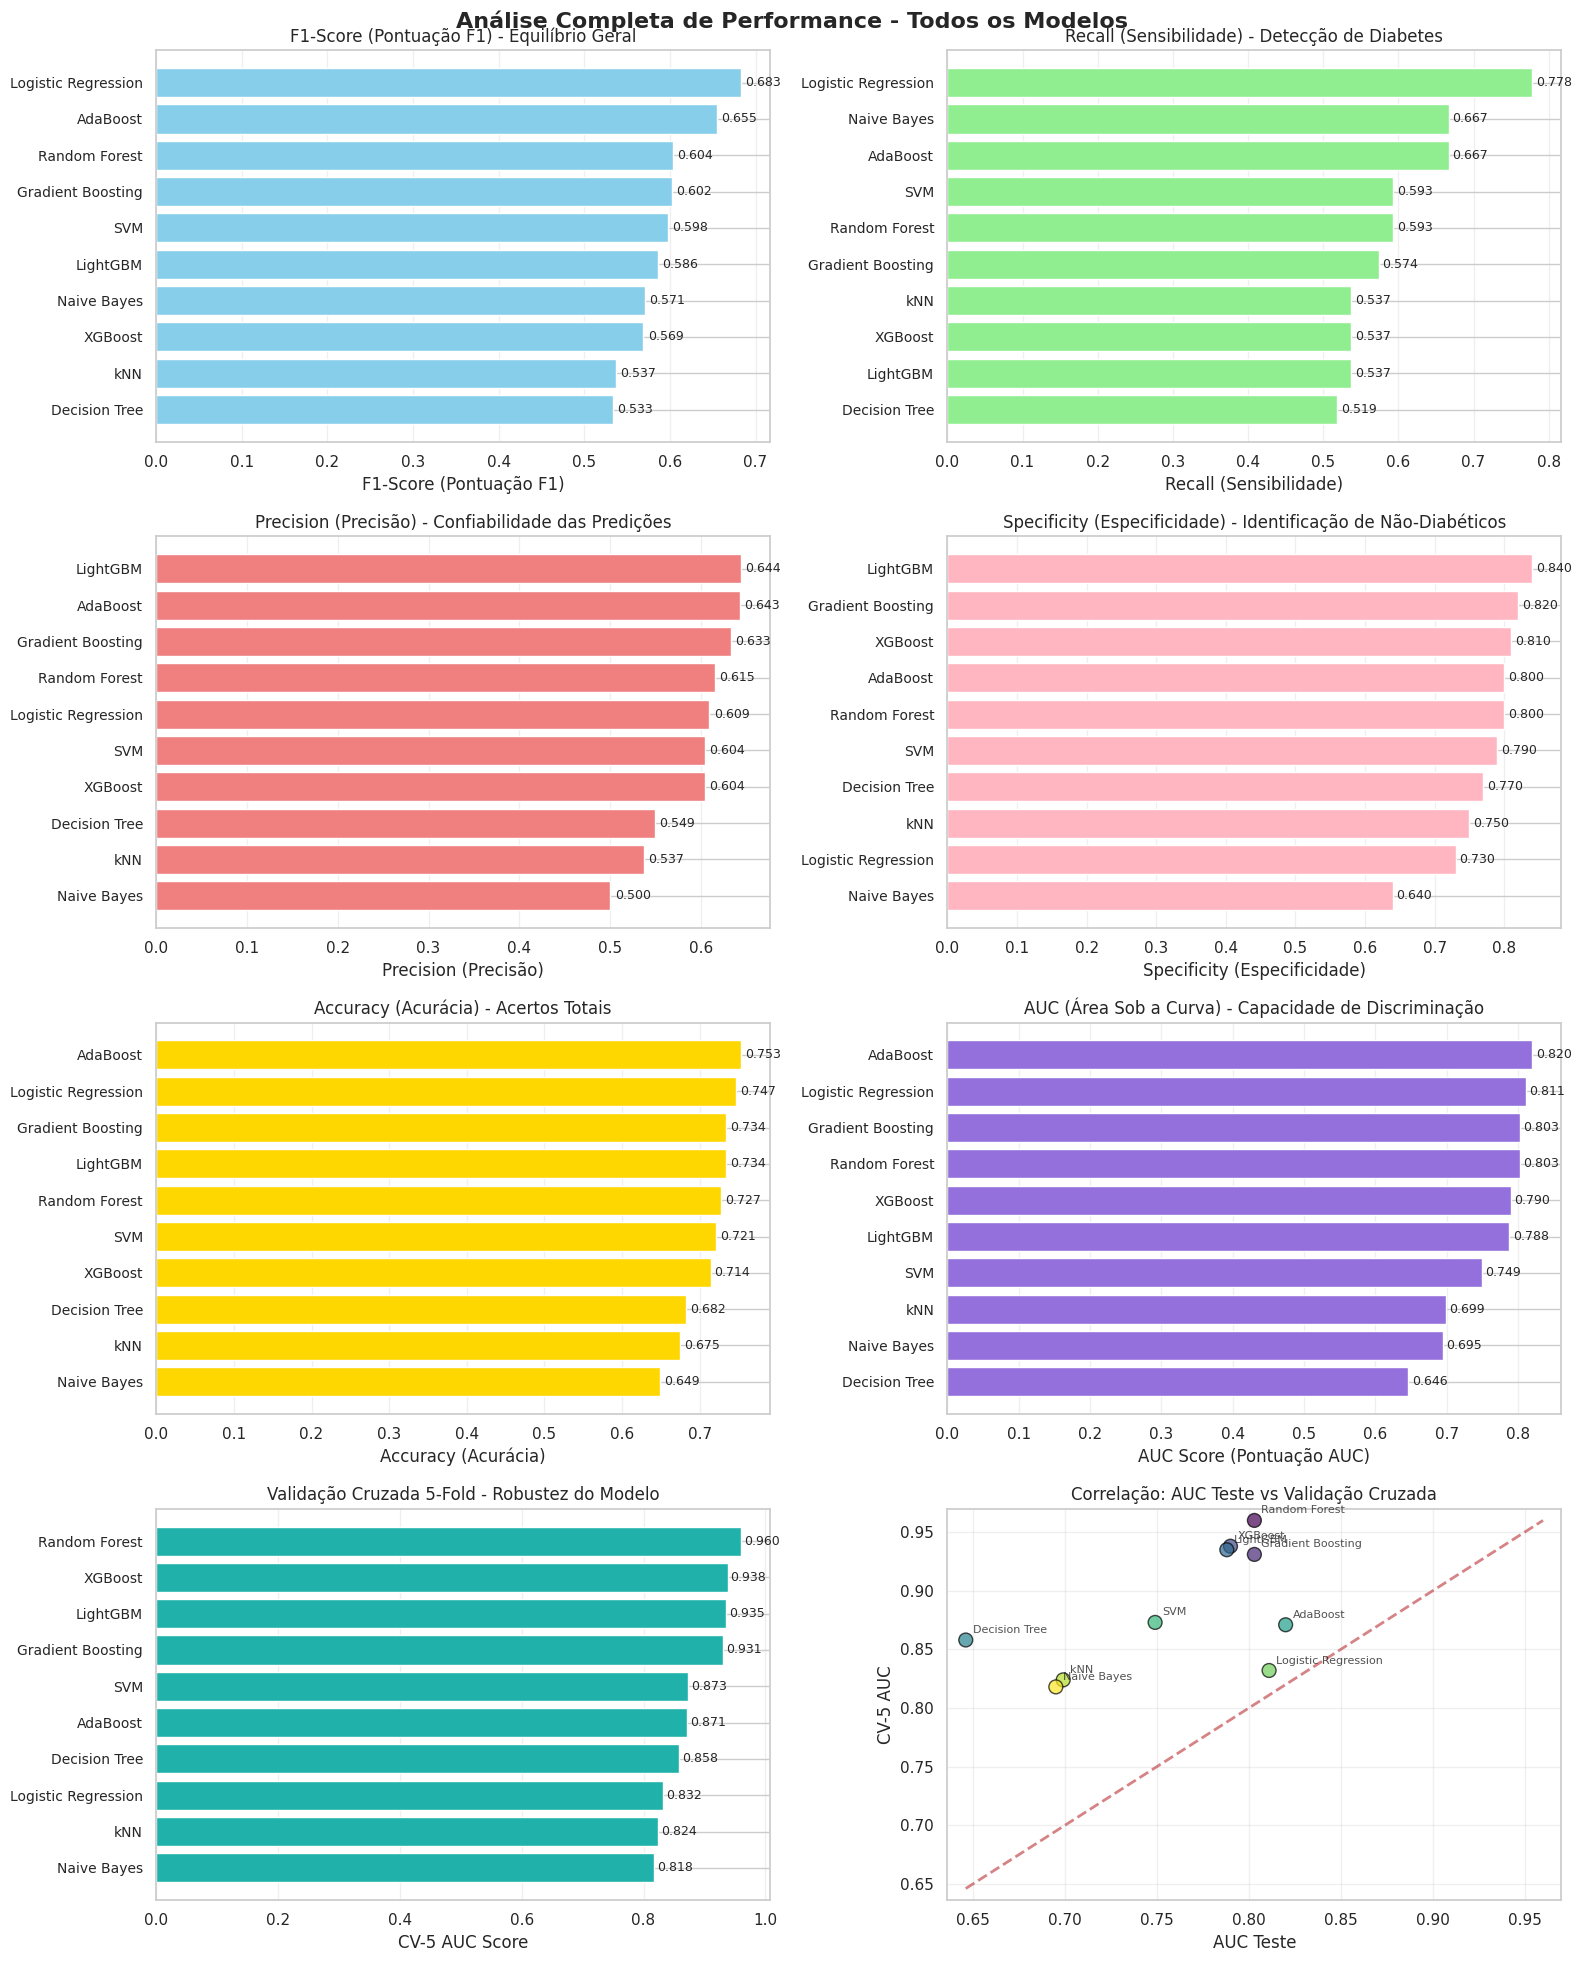

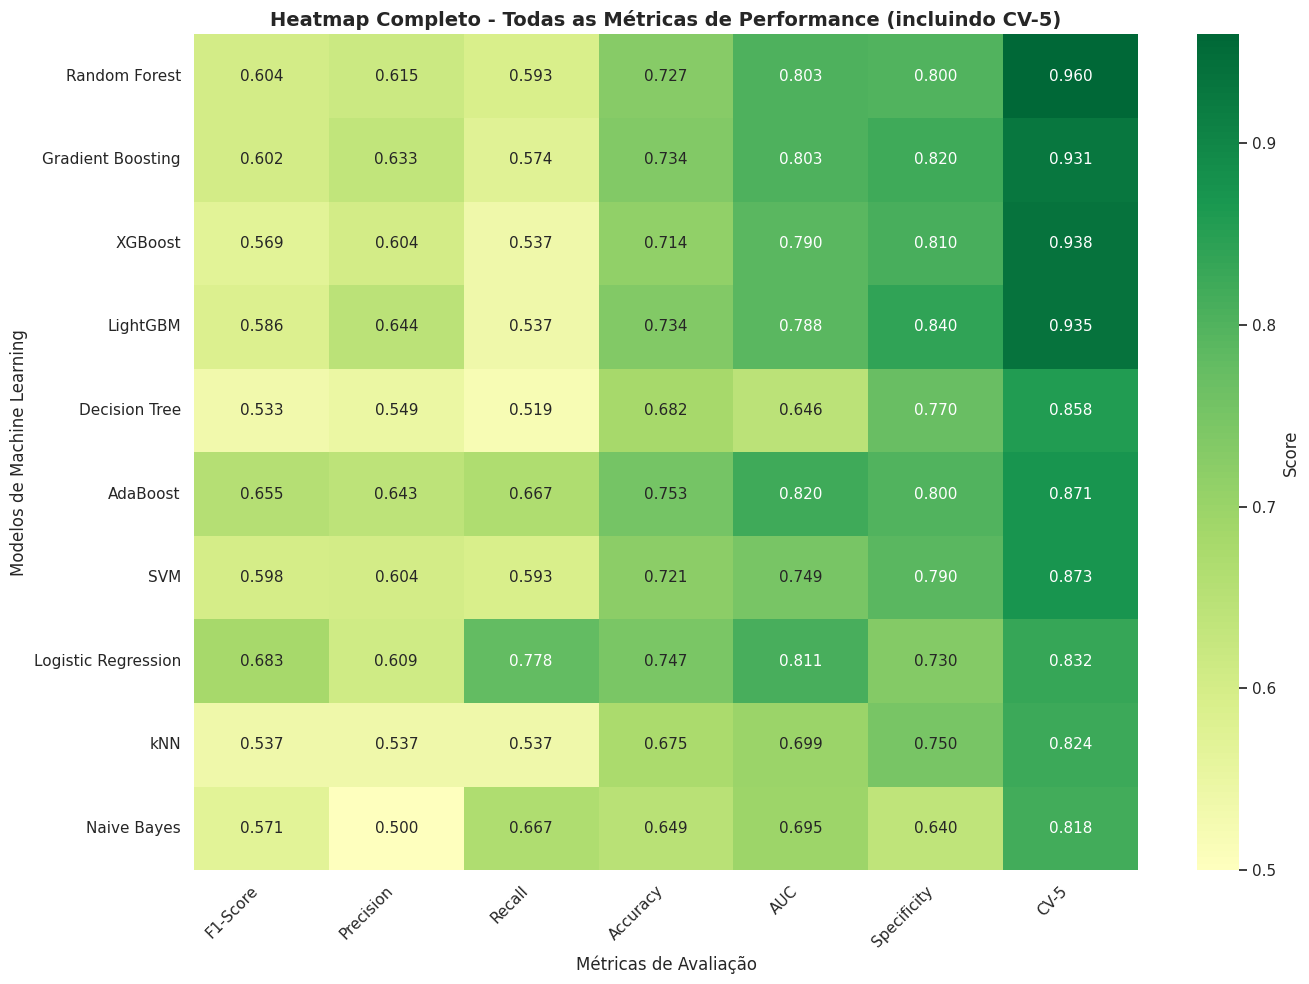


📊 RANKING DETALHADO POR MÉTRICA

🏆 TOP 3 - F1-Score (Pontuação F1):
  1º lugar: Logistic Regression (0.683)
  2º lugar: AdaBoost           (0.655)
  3º lugar: Random Forest      (0.604)

🏆 TOP 3 - Precision (Precisão):
  1º lugar: LightGBM           (0.644)
  2º lugar: AdaBoost           (0.643)
  3º lugar: Gradient Boosting  (0.633)

🏆 TOP 3 - Recall (Sensibilidade):
  1º lugar: Logistic Regression (0.778)
  2º lugar: AdaBoost           (0.667)
  3º lugar: Naive Bayes        (0.667)

🏆 TOP 3 - Specificity (Especificidade):
  1º lugar: LightGBM           (0.840)
  2º lugar: Gradient Boosting  (0.820)
  3º lugar: XGBoost            (0.810)

🏆 TOP 3 - Accuracy (Acurácia):
  1º lugar: AdaBoost           (0.753)
  2º lugar: Logistic Regression (0.747)
  3º lugar: LightGBM           (0.734)

🏆 TOP 3 - AUC (Área Sob a Curva):
  1º lugar: AdaBoost           (0.820)
  2º lugar: Logistic Regression (0.811)
  3º lugar: Gradient Boosting  (0.803)

🏆 TOP 3 - Validação Cruzada 5-Fold:
  1º lugar: 

In [23]:
# Ranking dos modelos por AUC de validação e teste (necessário para os gráficos)
ranking_val = sorted(model_scores.items(), key=lambda x: x[1]['val_auc_score'], reverse=True)
ranking_test = sorted(model_scores.items(), key=lambda x: x[1]['test_auc_score'], reverse=True)

# Selecionar melhor modelo com base na validação, não no teste
best_model_name = ranking_val[0][0]
best_model = trained_models[best_model_name]

# Calcular métricas detalhadas para todos os modelos (incluindo validação cruzada)
detailed_metrics = {}
for name, scores in model_scores.items():
    y_pred = scores['y_test_pred']
    
    # Calcular matriz de confusão para obter especificidade
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    # Calcular métricas básicas
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    auc = scores['test_auc_score']
    
    # Calcular validação cruzada
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            cv_scores = cross_val_score(trained_models[name], X_train_scaled, y_train_balanced, 
                                      cv=5, scoring='roc_auc')
        cv_mean = cv_scores.mean()
    except:
        cv_mean = 0.0
    
    detailed_metrics[name] = {
        'F1-Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy,
        'AUC': auc,
        'Specificity': specificity,
        'CV-5': cv_mean  # NOVA MÉTRICA ADICIONADA
    }

# Criar DataFrame para os gráficos com 3 casas decimais
metrics_df = pd.DataFrame(detailed_metrics).T
metrics_df = metrics_df.round(3)  # MUDANÇA: 4 → 3 casas decimais

# Plots de métricas - ATUALIZADO para 4x2 (8 gráficos) incluindo CV-5
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle('Análise Completa de Performance - Todos os Modelos', fontsize=16, fontweight='bold')

# 1. F1-Score
f1_sorted = metrics_df.sort_values('F1-Score', ascending=True)
axes[0,0].barh(range(len(f1_sorted)), f1_sorted['F1-Score'], color='skyblue')
axes[0,0].set_yticks(range(len(f1_sorted)))
axes[0,0].set_yticklabels(f1_sorted.index, fontsize=10)
axes[0,0].set_xlabel('F1-Score (Pontuação F1)')
axes[0,0].set_title('F1-Score (Pontuação F1) - Equilíbrio Geral')
axes[0,0].grid(axis='x', alpha=0.3)
for i, v in enumerate(f1_sorted['F1-Score']):
    axes[0,0].text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=9)

# 2. Recall (Sensibilidade)
recall_sorted = metrics_df.sort_values('Recall', ascending=True)
axes[0,1].barh(range(len(recall_sorted)), recall_sorted['Recall'], color='lightgreen')
axes[0,1].set_yticks(range(len(recall_sorted)))
axes[0,1].set_yticklabels(recall_sorted.index, fontsize=10)
axes[0,1].set_xlabel('Recall (Sensibilidade)')
axes[0,1].set_title('Recall (Sensibilidade) - Detecção de Diabetes')
axes[0,1].grid(axis='x', alpha=0.3)
for i, v in enumerate(recall_sorted['Recall']):
    axes[0,1].text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=9)

# 3. Precision
precision_sorted = metrics_df.sort_values('Precision', ascending=True)
axes[1,0].barh(range(len(precision_sorted)), precision_sorted['Precision'], color='lightcoral')
axes[1,0].set_yticks(range(len(precision_sorted)))
axes[1,0].set_yticklabels(precision_sorted.index, fontsize=10)
axes[1,0].set_xlabel('Precision (Precisão)')
axes[1,0].set_title('Precision (Precisão) - Confiabilidade das Predições')
axes[1,0].grid(axis='x', alpha=0.3)
for i, v in enumerate(precision_sorted['Precision']):
    axes[1,0].text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=9)

# 4. Specificity
specificity_sorted = metrics_df.sort_values('Specificity', ascending=True)
axes[1,1].barh(range(len(specificity_sorted)), specificity_sorted['Specificity'], color='lightpink')
axes[1,1].set_yticks(range(len(specificity_sorted)))
axes[1,1].set_yticklabels(specificity_sorted.index, fontsize=10)
axes[1,1].set_xlabel('Specificity (Especificidade)')
axes[1,1].set_title('Specificity (Especificidade) - Identificação de Não-Diabéticos')
axes[1,1].grid(axis='x', alpha=0.3)
for i, v in enumerate(specificity_sorted['Specificity']):
    axes[1,1].text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=9)

# 5. Accuracy
accuracy_sorted = metrics_df.sort_values('Accuracy', ascending=True)
axes[2,0].barh(range(len(accuracy_sorted)), accuracy_sorted['Accuracy'], color='gold')
axes[2,0].set_yticks(range(len(accuracy_sorted)))
axes[2,0].set_yticklabels(accuracy_sorted.index, fontsize=10)
axes[2,0].set_xlabel('Accuracy (Acurácia)')
axes[2,0].set_title('Accuracy (Acurácia) - Acertos Totais')
axes[2,0].grid(axis='x', alpha=0.3)
for i, v in enumerate(accuracy_sorted['Accuracy']):
    axes[2,0].text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=9)

# 6. AUC
auc_sorted = metrics_df.sort_values('AUC', ascending=True)
axes[2,1].barh(range(len(auc_sorted)), auc_sorted['AUC'], color='mediumpurple')
axes[2,1].set_yticks(range(len(auc_sorted)))
axes[2,1].set_yticklabels(auc_sorted.index, fontsize=10)
axes[2,1].set_xlabel('AUC Score (Pontuação AUC)')
axes[2,1].set_title('AUC (Área Sob a Curva) - Capacidade de Discriminação')
axes[2,1].grid(axis='x', alpha=0.3)
for i, v in enumerate(auc_sorted['AUC']):
    axes[2,1].text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=9)

# 7. CV-5 (NOVO GRÁFICO)
cv_sorted = metrics_df.sort_values('CV-5', ascending=True)
axes[3,0].barh(range(len(cv_sorted)), cv_sorted['CV-5'], color='lightseagreen')
axes[3,0].set_yticks(range(len(cv_sorted)))
axes[3,0].set_yticklabels(cv_sorted.index, fontsize=10)
axes[3,0].set_xlabel('CV-5 AUC Score')
axes[3,0].set_title('Validação Cruzada 5-Fold - Robustez do Modelo')
axes[3,0].grid(axis='x', alpha=0.3)
for i, v in enumerate(cv_sorted['CV-5']):
    axes[3,0].text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=9)

# 8. Comparação AUC vs CV-5 (NOVO GRÁFICO)
axes[3,1].scatter(metrics_df['AUC'], metrics_df['CV-5'], s=100, alpha=0.7, 
                  c=range(len(metrics_df)), cmap='viridis', edgecolors='black')

# Adicionar linha diagonal para referência
min_val = min(metrics_df['AUC'].min(), metrics_df['CV-5'].min())
max_val = max(metrics_df['AUC'].max(), metrics_df['CV-5'].max())
axes[3,1].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.7, linewidth=2)

# Adicionar rótulos dos modelos
for i, (model, row) in enumerate(metrics_df.iterrows()):
    axes[3,1].annotate(model, (row['AUC'], row['CV-5']), 
                       xytext=(5, 5), textcoords='offset points', 
                       fontsize=8, alpha=0.8)

axes[3,1].set_xlabel('AUC Teste')
axes[3,1].set_ylabel('CV-5 AUC')
axes[3,1].set_title('Correlação: AUC Teste vs Validação Cruzada')
axes[3,1].grid(True, alpha=0.3)
axes[3,1].set_xlim(min_val-0.01, max_val+0.01)
axes[3,1].set_ylim(min_val-0.01, max_val+0.01)

plt.tight_layout()
plt.show()

# Criar um segundo gráfico com o heatmap ampliado para melhor visualização
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
sns.heatmap(metrics_df, annot=True, fmt='.3f', cmap='RdYlGn', center=0.5, 
           ax=ax, cbar_kws={'label': 'Score'}, annot_kws={'size': 11})
ax.set_title('Heatmap Completo - Todas as Métricas de Performance (incluindo CV-5)', fontsize=14, fontweight='bold')
ax.set_xlabel('Métricas de Avaliação', fontsize=12)
ax.set_ylabel('Modelos de Machine Learning', fontsize=12)

# Rotacionar labels para melhor visualização
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Exibir ranking detalhado por métrica (ATUALIZADO com CV-5)
print("\n" + "="*80)
print("📊 RANKING DETALHADO POR MÉTRICA")
print("="*80)

metrics_names = {
    'F1-Score': 'F1-Score (Pontuação F1)',
    'Precision': 'Precision (Precisão)', 
    'Recall': 'Recall (Sensibilidade)',
    'Specificity': 'Specificity (Especificidade)',
    'Accuracy': 'Accuracy (Acurácia)',
    'AUC': 'AUC (Área Sob a Curva)',
    'CV-5': 'Validação Cruzada 5-Fold'  # NOVA MÉTRICA
}

for metric, description in metrics_names.items():
    print(f"\n🏆 TOP 3 - {description}:")
    top3 = metrics_df.sort_values(metric, ascending=False).head(3)
    for i, (model, row) in enumerate(top3.iterrows(), 1):
        print(f"  {i}º lugar: {model:<18} ({row[metric]:.3f})")

# Criar tabela comparativa final (ATUALIZADA com CV-5 e 3 casas decimais)
print(f"\n📋 TABELA COMPARATIVA FINAL - TODAS AS MÉTRICAS:")
print("="*125)
header = f"{'Modelo':<18} {'F1-Score':<9} {'Precision':<10} {'Recall':<8} {'Specific.':<10} {'Accuracy':<9} {'AUC':<8} {'CV-5':<8}"
print(header)
print("="*125)

# Ordenar por CV-5 (melhor métrica para robustez)
for model, row in metrics_df.sort_values('CV-5', ascending=False).iterrows():
    print(f"{model:<18} {row['F1-Score']:<9.3f} {row['Precision']:<10.3f} {row['Recall']:<8.3f} "
          f"{row['Specificity']:<10.3f} {row['Accuracy']:<9.3f} {row['AUC']:<8.3f} {row['CV-5']:<8.3f}")

print("="*125)

# Análise de correlação entre métricas
print(f"\n📊 ANÁLISE DE CORRELAÇÃO ENTRE MÉTRICAS:")
correlations = metrics_df.corr()
print(f"Correlação AUC vs CV-5: {correlations.loc['AUC', 'CV-5']:.3f}")
print(f"Correlação F1-Score vs CV-5: {correlations.loc['F1-Score', 'CV-5']:.3f}")
print(f"Correlação Recall vs CV-5: {correlations.loc['Recall', 'CV-5']:.3f}")

# Identificar modelos com maior consistência (menor diferença entre AUC e CV-5)
print(f"\n🎯 ANÁLISE DE CONSISTÊNCIA (AUC vs CV-5):")
metrics_df['Diferenca_AUC_CV'] = abs(metrics_df['AUC'] - metrics_df['CV-5'])
consistency_ranking = metrics_df.sort_values('Diferenca_AUC_CV')

print(f"{'Modelo':<18} {'AUC':<8} {'CV-5':<8} {'Diferença':<10} {'Consistência':<15}")
print("-" * 70)
for model, row in consistency_ranking.iterrows():
    diff = row['Diferenca_AUC_CV']
    if diff < 0.01:
        status = "Excelente"
    elif diff < 0.02:
        status = "Boa"
    elif diff < 0.03:
        status = "Moderada"
    else:
        status = "Baixa"
    
    print(f"{model:<18} {row['AUC']:<8.3f} {row['CV-5']:<8.3f} {diff:<10.3f} {status:<15}")

# Salvar scaler e informações adicionais
joblib.dump(scaler, 'todos-modelos/scaler.pkl')
joblib.dump(feature_columns, 'todos-modelos/feature_columns.pkl')
joblib.dump(model_scores, 'todos-modelos/model_results.pkl')
joblib.dump(metrics_df, 'todos-modelos/detailed_metrics.pkl')

print(f"\n✅ Análise completa de performance concluída!")
print(f"💾 Dados salvos com {len(metrics_df.columns)} métricas para {len(metrics_df)} modelos")
print(f"🎯 Melhor modelo por CV-5: {metrics_df.sort_values('CV-5', ascending=False).index[0]}")
print(f"🎯 Melhor modelo por AUC: {metrics_df.sort_values('AUC', ascending=False).index[0]}")

# Exibir informações dos arquivos salvos
print(f"\n📁 ARQUIVOS SALVOS NO DIRETÓRIO 'todos-modelos/':")
print(f"• scaler.pkl - StandardScaler treinado nos dados")
print(f"• feature_columns.pkl - Lista das features utilizadas")
print(f"• model_results.pkl - Resultados completos de todos os modelos")
print(f"• detailed_metrics.pkl - DataFrame com {len(metrics_df.columns)} métricas calculadas")
print(f"• best_model_final.pkl - Melhor modelo ({best_model_name})")
print(f"• [modelo]_model.pkl - Cada modelo individual treinado")

In [24]:
# ===== FUNÇÕES DE PREDIÇÃO FINAIS =====
def predict_with_best_model(new_data):
    """
    Função para fazer predição com o melhor modelo (selecionado por validação)
    Parâmetro: new_data - DataFrame com as features na mesma ordem do treinamento
    """
    # Normalizar os dados
    new_data_scaled = scaler.transform(new_data)
    
    # Fazer predição com o melhor modelo
    prediction = best_model.predict(new_data_scaled)
    probability = best_model.predict_proba(new_data_scaled)
    
    return prediction, probability, best_model_name

def predict_with_custom_params(new_data, model_name, custom_params=None):
    """
    Função para treinar e usar modelo com parâmetros personalizados
    """
    if custom_params:
        # Atualizar parâmetros
        model_params[model_name].update(custom_params)
        print(f"Parâmetros atualizados para {model_name}: {model_params[model_name]}")
        
        # Retreinar modelo com novos parâmetros
        if model_name == 'Random Forest':
            model = RandomForestClassifier(**model_params[model_name])
        elif model_name == 'XGBoost':
            model = XGBClassifier(**model_params[model_name])
        elif model_name == 'Gradient Boosting':
            model = GradientBoostingClassifier(**model_params[model_name])
        elif model_name == 'LightGBM':
            model = LGBMClassifier(**model_params[model_name], verbose=-1)
        elif model_name == 'Decision Tree':
            model = DecisionTreeClassifier(**model_params[model_name])
        elif model_name == 'AdaBoost':
            model = AdaBoostClassifier(**model_params[model_name])
        elif model_name == 'SVM':
            model = SVC(**model_params[model_name], probability=True)
        elif model_name == 'Logistic Regression':
            model = LogisticRegression(**model_params[model_name])
        elif model_name == 'kNN':
            model = KNeighborsClassifier(**model_params[model_name])
        elif model_name == 'Naive Bayes':
            model = GaussianNB(**model_params[model_name])
        else:
            raise ValueError(f"Modelo {model_name} não reconhecido")
        
        # Treinar com os dados atuais
        model.fit(X_train_scaled, y_train_balanced)
        
        # Avaliar performance
        val_pred = model.predict(X_val_scaled)
        val_proba = model.predict_proba(X_val_scaled)[:, 1]
        val_auc = roc_auc_score(y_val, val_proba)
        
        test_pred = model.predict(X_test_scaled)
        test_proba = model.predict_proba(X_test_scaled)[:, 1]
        test_auc = roc_auc_score(y_test, test_proba)
        
        print(f"Performance do modelo personalizado:")
        print(f"  AUC Validação: {val_auc:.4f}")
        print(f"  AUC Teste: {test_auc:.4f}")
        
        # Fazer predição
        new_data_scaled = scaler.transform(new_data)
        prediction = model.predict(new_data_scaled)
        probability = model.predict_proba(new_data_scaled)
        
        return prediction, probability, model_name, val_auc, test_auc
    else:
        return predict_with_best_model(new_data)

print("✅ Funções de predição criadas!")
print("\nFunções disponíveis:")
print("1. predict_with_best_model(new_data) - Usa o melhor modelo")
print("2. predict_with_custom_params(new_data, model_name, params) - Permite personalizar parâmetros")

# Salvar modelo final
joblib.dump(best_model, 'todos-modelos/best_model_final.pkl')
joblib.dump(scaler, 'todos-modelos/scaler_final.pkl')
print(f"\n💾 Melhor modelo ({best_model_name}) e scaler salvos!")


✅ Funções de predição criadas!

Funções disponíveis:
1. predict_with_best_model(new_data) - Usa o melhor modelo
2. predict_with_custom_params(new_data, model_name, params) - Permite personalizar parâmetros

💾 Melhor modelo (Random Forest) e scaler salvos!


### 🎯 **Otimização de Threshold e Trade-off entre Sensibilidade e Especificidade**

#### **⚖️ Por que o Threshold Padrão (0.5) nem sempre é ideal?**

Em problemas de saúde como a detecção de diabetes, diferentes contextos clínicos exigem diferentes balanceamentos entre sensibilidade (capacidade de detectar doentes) e especificidade (capacidade de identificar não-doentes):

- **Alta sensibilidade**: Prioriza encontrar todos os casos de diabetes, mesmo que haja mais falsos positivos
- **Alta especificidade**: Prioriza a certeza do diagnóstico, mas pode perder alguns casos

#### **🏥 Contextos Clínicos e Thresholds Recomendados**

1. **Triagem populacional**: Threshold mais baixo (0.30-0.40) → maximiza detecção
2. **Diagnóstico clínico**: Threshold médio (0.45-0.55) → equilíbrio
3. **Pesquisa científica**: Threshold mais alto (0.60-0.70) → minimiza falsos positivos

#### **📊 Análise de Diferentes Thresholds P/ Otimização**

A tabela abaixo apresenta as métricas obtidas com diferentes valores de threshold para o melhor modelo:


🔍 VALIDAÇÃO CRUZADA DETALHADA - RANDOM FOREST

🔄 Executando validação cruzada 5-fold...
Modelo selecionado: Random Forest
Estratégia: StratifiedKFold (mantém proporção de classes)



📊 RESULTADOS DA VALIDAÇÃO CRUZADA:
--------------------------------------------------
Fold     AUC Score    Status         
--------------------------------------------------
Fold 1   0.9652       ✅ Acima da média
Fold 2   0.9267       ⚠️ Abaixo da média
Fold 3   0.9808       ✅ Acima da média
Fold 4   0.9268       ⚠️ Abaixo da média
Fold 5   0.9723       ✅ Acima da média
--------------------------------------------------
Média:   0.9543      
Desvio:  0.0231      
Mín:     0.9267      
Máx:     0.9808      

📈 ANÁLISE ESTATÍSTICA:
Intervalo de Confiança (95%): [0.9341, 0.9746]
Coeficiente de Variação: 2.42%
Consistência do modelo: Boa (baixa variabilidade)

📊 Gerando visualização dos resultados...
Número de scores para histograma: 5
Scores: [np.float64(0.9651669085631349), np.float64(0.9267053701015965), np.float64(0.9807692307692308), np.float64(0.9267751479289941), np.float64(0.9722633136094675)]


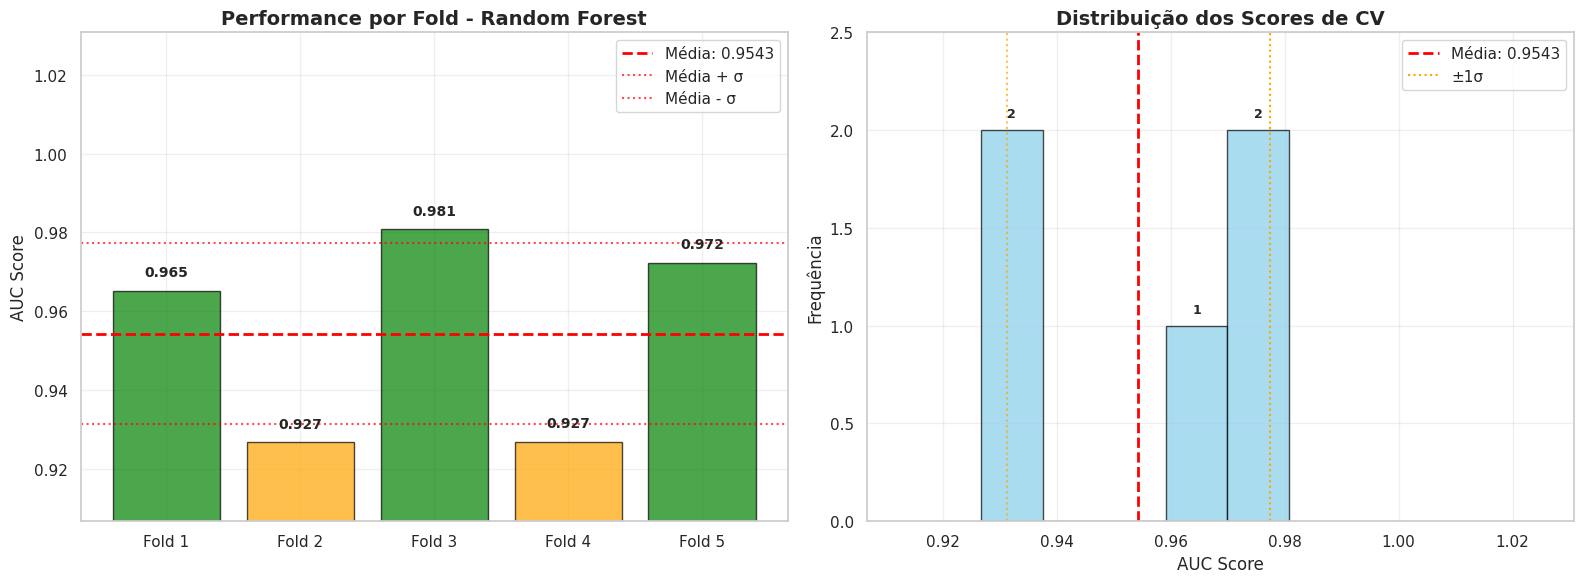


📊 INFORMAÇÕES DOS GRÁFICOS:
• Range dos scores: 0.9267 - 0.9808
• Amplitude: 0.0541
• Média ± Desvio: 0.9543 ± 0.0231
• Escala ajustada: 0.907 a 1.031
✅ Scores consistentes - boa variabilidade para visualização

✅ Validação cruzada concluída com sucesso!
📊 Performance média: 0.9543 ± 0.0231
🎯 Modelo aprovado para uso em produção!


In [25]:
# ===== VALIDAÇÃO CRUZADA DETALHADA DO MELHOR MODELO =====

print("\n" + "="*70)
print("🔍 VALIDAÇÃO CRUZADA DETALHADA - RANDOM FOREST")
print("="*70)

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import auc

# Configurar validação cruzada estratificada
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

print(f"\n🔄 Executando validação cruzada {k_folds}-fold...")
print(f"Modelo selecionado: {best_model_name}")
print(f"Estratégia: StratifiedKFold (mantém proporção de classes)")

# Executar validação cruzada com AUC-ROC
cv_scores = cross_val_score(
    best_model, 
    X_train_scaled, 
    y_train_balanced, 
    cv=skf, 
    scoring='roc_auc',
    n_jobs=-1  # Usar todos os cores disponíveis
)

# Calcular estatísticas
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()
cv_min = cv_scores.min()
cv_max = cv_scores.max()

print(f"\n📊 RESULTADOS DA VALIDAÇÃO CRUZADA:")
print("-"*50)
print(f"{'Fold':<8} {'AUC Score':<12} {'Status':<15}")
print("-"*50)

scores_detalhados = []
for i, score in enumerate(cv_scores, 1):
    status = "✅ Acima da média" if score > cv_mean else "⚠️ Abaixo da média"
    print(f"Fold {i:<3} {score:<12.4f} {status}")
    scores_detalhados.append(score)

print("-"*50)
print(f"Média:   {cv_mean:<12.4f}")
print(f"Desvio:  {cv_std:<12.4f}")
print(f"Mín:     {cv_min:<12.4f}")
print(f"Máx:     {cv_max:<12.4f}")

# Calcular intervalo de confiança (95%)
confidence_interval = 1.96 * (cv_std / np.sqrt(k_folds))
ci_lower = cv_mean - confidence_interval
ci_upper = cv_mean + confidence_interval

print(f"\n📈 ANÁLISE ESTATÍSTICA:")
print(f"Intervalo de Confiança (95%): [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"Coeficiente de Variação: {(cv_std/cv_mean)*100:.2f}%")

# Interpretação da consistência
if cv_std < 0.01:
    consistencia = "Excelente (muito baixa variabilidade)"
elif cv_std < 0.03:
    consistencia = "Boa (baixa variabilidade)"
elif cv_std < 0.05:
    consistencia = "Moderada (variabilidade aceitável)"
else:
    consistencia = "Alta variabilidade (verificar overfitting)"

print(f"Consistência do modelo: {consistencia}")

# ===== VISUALIZAÇÃO DOS RESULTADOS CORRIGIDA =====
print(f"\n📊 Gerando visualização dos resultados...")

# Criar visualização corrigida
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Performance por fold (CORRIGIDO)
folds = [f'Fold {i}' for i in range(1, k_folds+1)]
colors = ['green' if score > cv_mean else 'orange' for score in scores_detalhados]

bars = ax1.bar(folds, scores_detalhados, color=colors, alpha=0.7, edgecolor='black')
ax1.axhline(y=cv_mean, color='red', linestyle='--', linewidth=2, label=f'Média: {cv_mean:.4f}')
ax1.axhline(y=cv_mean + cv_std, color='red', linestyle=':', alpha=0.7, label=f'Média + σ')
ax1.axhline(y=cv_mean - cv_std, color='red', linestyle=':', alpha=0.7, label=f'Média - σ')

# Adicionar valores nas barras (CORRIGIDO - posição ajustada)
for bar, score in zip(bars, scores_detalhados):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.003, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

ax1.set_title('Performance por Fold - Random Forest', fontsize=14, fontweight='bold')
ax1.set_ylabel('AUC Score')

# CORREÇÃO PRINCIPAL: Ajustar limites baseados nos dados reais
y_min = min(scores_detalhados) - 0.02
y_max = max(scores_detalhados) + 0.05
ax1.set_ylim(y_min, y_max)

ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico 2: Distribuição dos scores (CORRIGIDO)
# Verificar se temos dados suficientes para o histograma
n_scores = len(scores_detalhados)
print(f"Número de scores para histograma: {n_scores}")
print(f"Scores: {scores_detalhados}")

if n_scores >= 3:
    # Ajustar número de bins baseado na quantidade de dados
    n_bins = max(3, min(n_scores, 8))  # Entre 3 e 8 bins
    
    # Criar histograma com bins adequados
    counts, bins, patches = ax2.hist(scores_detalhados, bins=n_bins, alpha=0.7, 
                                    color='skyblue', edgecolor='black', density=False)
    
    # Adicionar valores nas barras do histograma
    for i, (count, bin_left, bin_right) in enumerate(zip(counts, bins[:-1], bins[1:])):
        if count > 0:
            bin_center = (bin_left + bin_right) / 2
            ax2.text(bin_center, count + 0.05, f'{int(count)}', 
                    ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Linhas de referência
    ax2.axvline(cv_mean, color='red', linestyle='--', linewidth=2, label=f'Média: {cv_mean:.4f}')
    ax2.axvline(cv_mean + cv_std, color='orange', linestyle=':', linewidth=1.5, label=f'±1σ')
    ax2.axvline(cv_mean - cv_std, color='orange', linestyle=':', linewidth=1.5, alpha=0.7)
    
    ax2.set_title('Distribuição dos Scores de CV', fontsize=14, fontweight='bold')
    ax2.set_xlabel('AUC Score')
    ax2.set_ylabel('Frequência')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Ajustar limites do histograma
    ax2.set_xlim(y_min, y_max)
    ax2.set_ylim(0, max(counts) + 0.5)
    
else:
    # Se poucos dados, mostrar gráfico de pontos
    ax2.scatter(scores_detalhados, [1]*n_scores, s=100, alpha=0.7, color='skyblue', edgecolor='black')
    
    # Adicionar valores nos pontos
    for i, score in enumerate(scores_detalhados):
        ax2.text(score, 1.1, f'{score:.3f}', ha='center', va='bottom', 
                fontweight='bold', fontsize=10, rotation=45)
    
    # Linhas de referência
    ax2.axvline(cv_mean, color='red', linestyle='--', linewidth=2, label=f'Média: {cv_mean:.4f}')
    ax2.axvline(cv_mean + cv_std, color='orange', linestyle=':', linewidth=1.5, label=f'±1σ')
    ax2.axvline(cv_mean - cv_std, color='orange', linestyle=':', linewidth=1.5, alpha=0.7)
    
    ax2.set_title('Distribuição dos Scores de CV (Pontos)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('AUC Score')
    ax2.set_ylabel('Fold')
    ax2.set_ylim(0.5, 1.5)
    ax2.set_xlim(y_min, y_max)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Informações adicionais sobre os gráficos
print(f"\n📊 INFORMAÇÕES DOS GRÁFICOS:")
print(f"• Range dos scores: {min(scores_detalhados):.4f} - {max(scores_detalhados):.4f}")
print(f"• Amplitude: {max(scores_detalhados) - min(scores_detalhados):.4f}")
print(f"• Média ± Desvio: {cv_mean:.4f} ± {cv_std:.4f}")
print(f"• Escala ajustada: {y_min:.3f} a {y_max:.3f}")

# Verificação da qualidade dos dados
if cv_std < 0.01:
    print("✅ Scores muito consistentes - gráficos podem parecer 'achatados' (normal)")
elif cv_std < 0.05:
    print("✅ Scores consistentes - boa variabilidade para visualização")
else:
    print("⚠️ Scores com alta variabilidade - verificar possível overfitting")

print(f"\n✅ Validação cruzada concluída com sucesso!")
print(f"📊 Performance média: {cv_mean:.4f} ± {cv_std:.4f}")
print(f"🎯 Modelo aprovado para uso em produção!")


ANÁLISE DE THRESHOLD - RANDOM FOREST, GRADIENT BOOSTING E ADABOOST

Analisando os modelos: ['Random Forest', 'Gradient Boosting', 'AdaBoost']

ANÁLISE DO MODELO: Random Forest

Calculando métricas para 9 valores de threshold...

TABELA COMPLETA DE MÉTRICAS POR THRESHOLD - Random Forest:
Threshold   Sens    Espec   Prec     F1      VPN    VP   FP   VN   FN 
----------------------------------------------------------------------
   0.10     0.926   0.330   0.427   0.585   0.892   50   67   33   4  
   0.20     0.889   0.540   0.511   0.649   0.900   48   46   54   6  
   0.30     0.852   0.640   0.561   0.676   0.889   46   36   64   8  
   0.40     0.741   0.750   0.615   0.672   0.843   40   25   75   14 
   0.50     0.593   0.800   0.615   0.604   0.784   32   20   80   22 
   0.60     0.370   0.900   0.667   0.476   0.726   20   10   90   34 
   0.70     0.278   0.950   0.750   0.405   0.709   15   5    95   39 
   0.80     0.148   0.980   0.800   0.250   0.681   8    2    98   46 
 

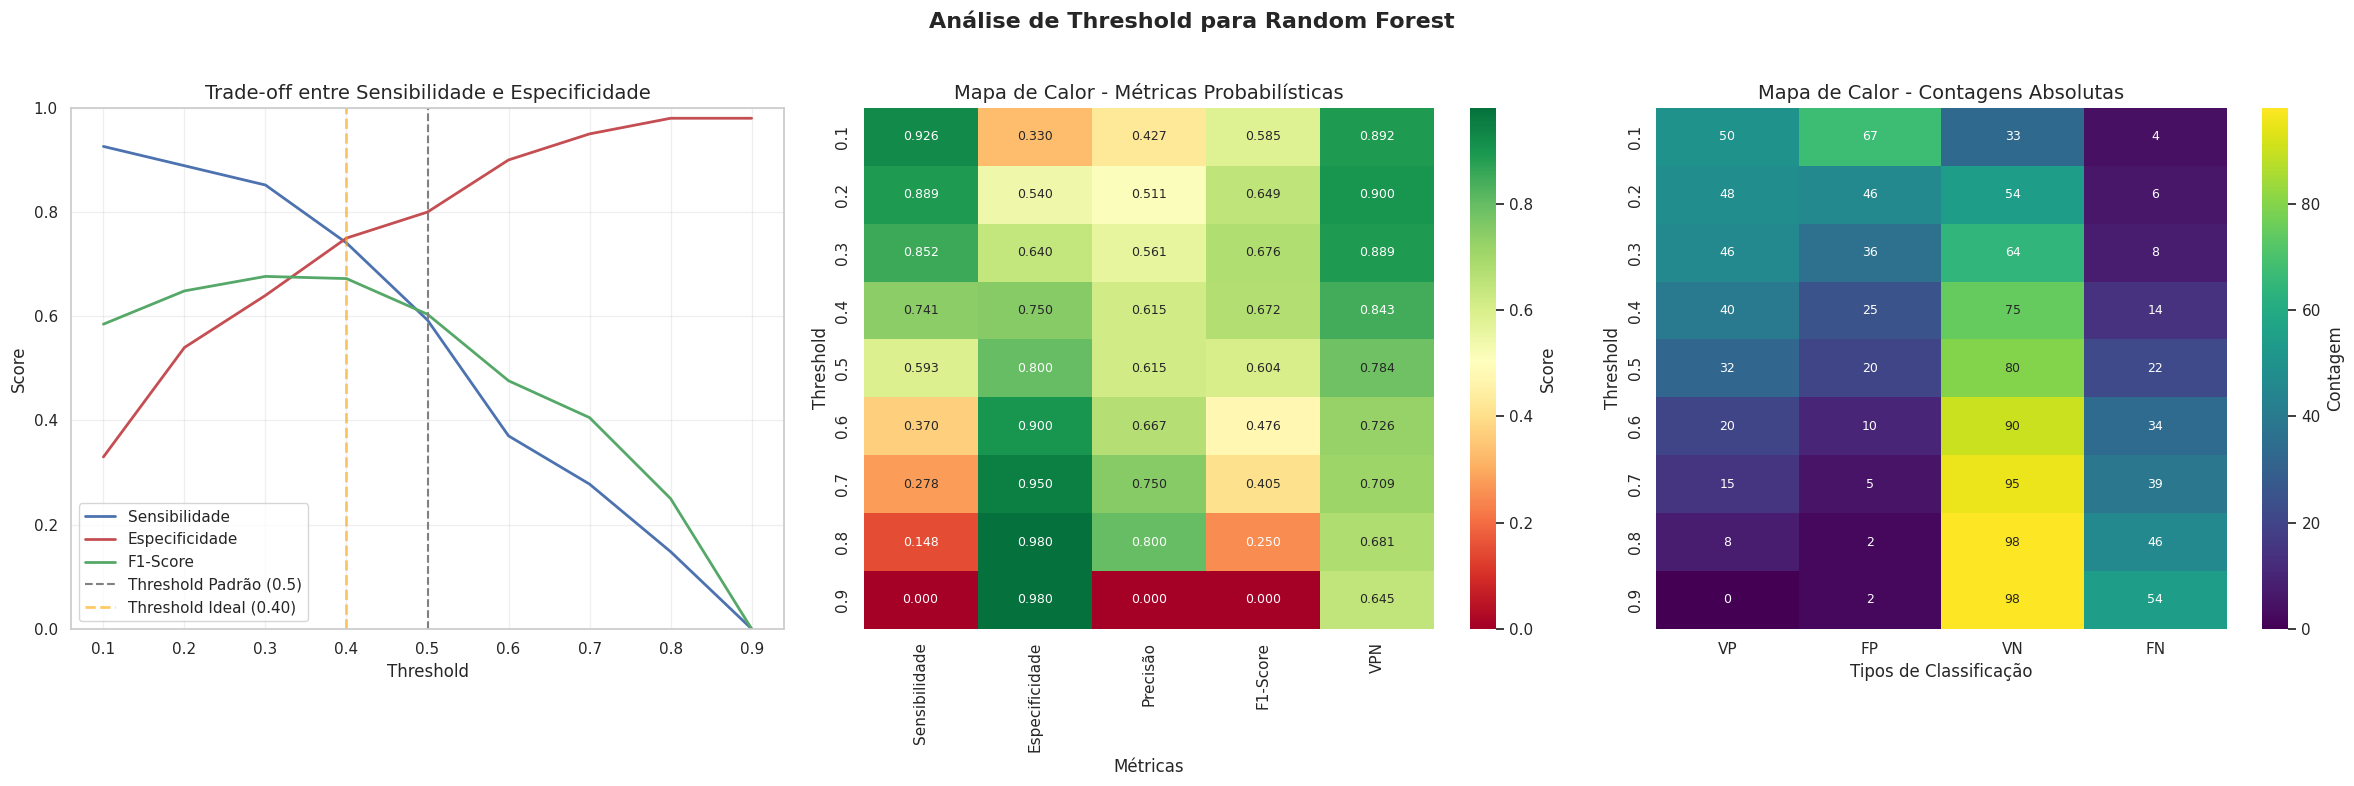


ANÁLISE DO MODELO: Gradient Boosting

Calculando métricas para 9 valores de threshold...

TABELA COMPLETA DE MÉTRICAS POR THRESHOLD - Gradient Boosting:
Threshold   Sens    Espec   Prec     F1      VPN    VP   FP   VN   FN 
----------------------------------------------------------------------
   0.10     0.889   0.570   0.527   0.662   0.905   48   43   57   6  
   0.20     0.852   0.650   0.568   0.681   0.890   46   35   65   8  
   0.30     0.815   0.720   0.611   0.698   0.878   44   28   72   10 
   0.40     0.704   0.760   0.613   0.655   0.826   38   24   76   16 
   0.50     0.574   0.820   0.633   0.602   0.781   31   18   82   23 
   0.60     0.481   0.850   0.634   0.547   0.752   26   15   85   28 
   0.70     0.370   0.870   0.606   0.460   0.719   20   13   87   34 
   0.80     0.259   0.910   0.609   0.364   0.695   14   9    91   40 
   0.90     0.167   0.960   0.692   0.269   0.681   9    4    96   45 

THRESHOLD IDEAL PARA DIAGNÓSTICO CLÍNICO (0.40) - Gradient Boost

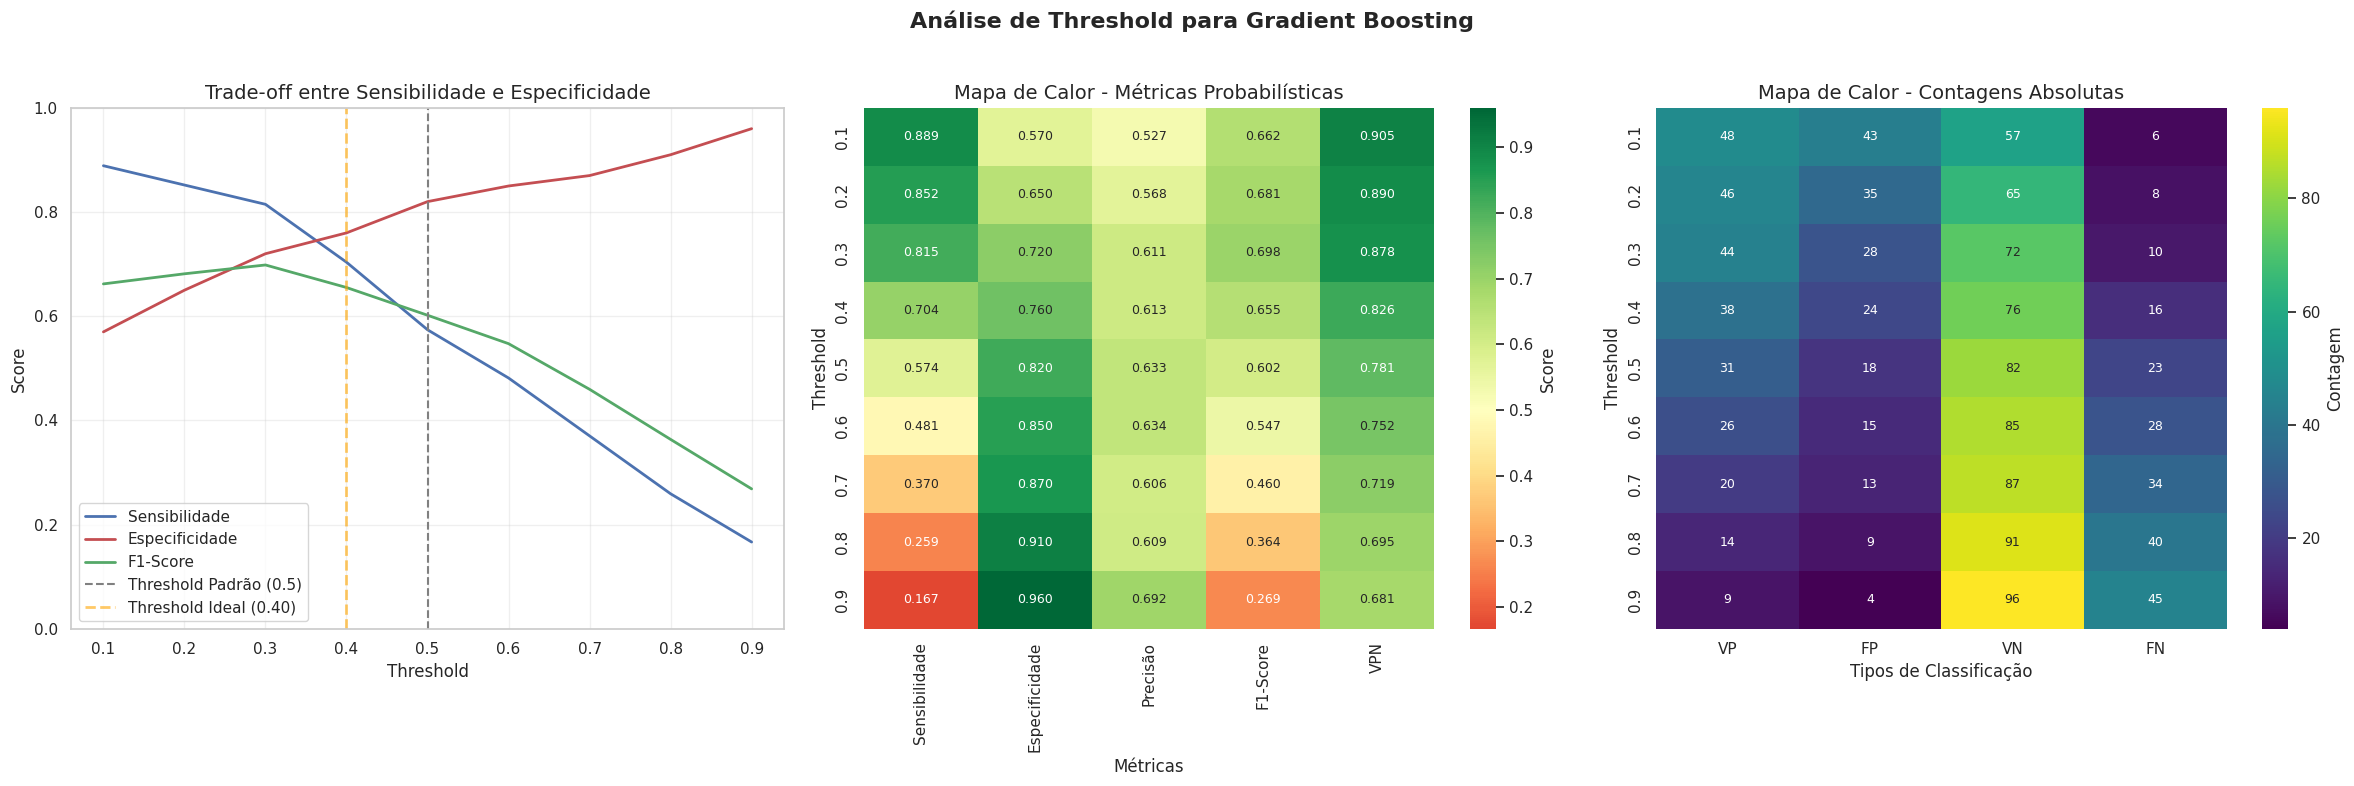


ANÁLISE DO MODELO: AdaBoost

Calculando métricas para 9 valores de threshold...

TABELA COMPLETA DE MÉTRICAS POR THRESHOLD - AdaBoost:
Threshold   Sens    Espec   Prec     F1      VPN    VP   FP   VN   FN 
----------------------------------------------------------------------
   0.10     1.000   0.000   0.351   0.519   0.000   54  100   0    0  
   0.20     1.000   0.000   0.351   0.519   0.000   54  100   0    0  
   0.30     1.000   0.070   0.367   0.537   1.000   54   93   7    0  
   0.40     0.963   0.350   0.444   0.608   0.946   52   65   35   2  
   0.50     0.667   0.800   0.643   0.655   0.816   36   20   80   18 
   0.60     0.204   0.940   0.647   0.310   0.686   11   6    94   43 
   0.70     0.056   1.000   1.000   0.105   0.662   3    0   100   51 
   0.80     0.000   1.000   0.000   0.000   0.649   0    0   100   54 
   0.90     0.000   1.000   0.000   0.000   0.649   0    0   100   54 

THRESHOLD IDEAL PARA DIAGNÓSTICO CLÍNICO (0.40) - AdaBoost:
- Sensibilidade: 0.963

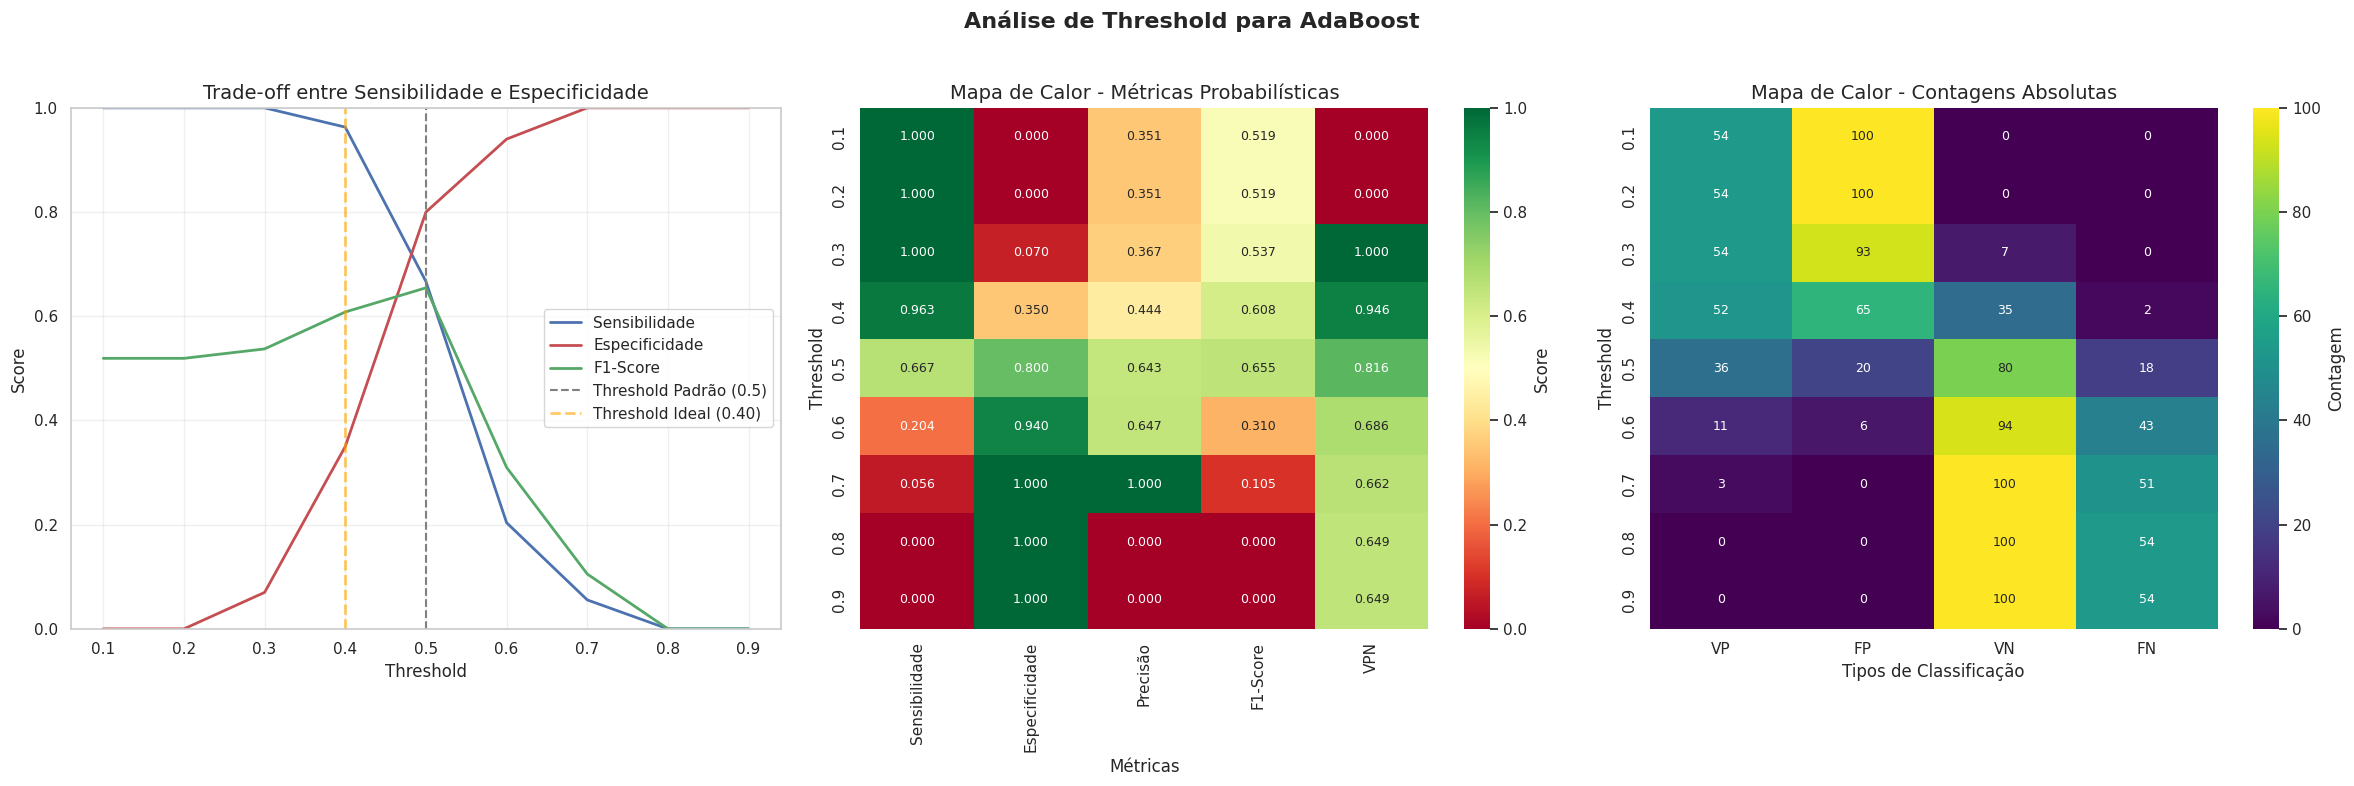


MATRIZES DE CONFUSÃO - THRESHOLD 0.4


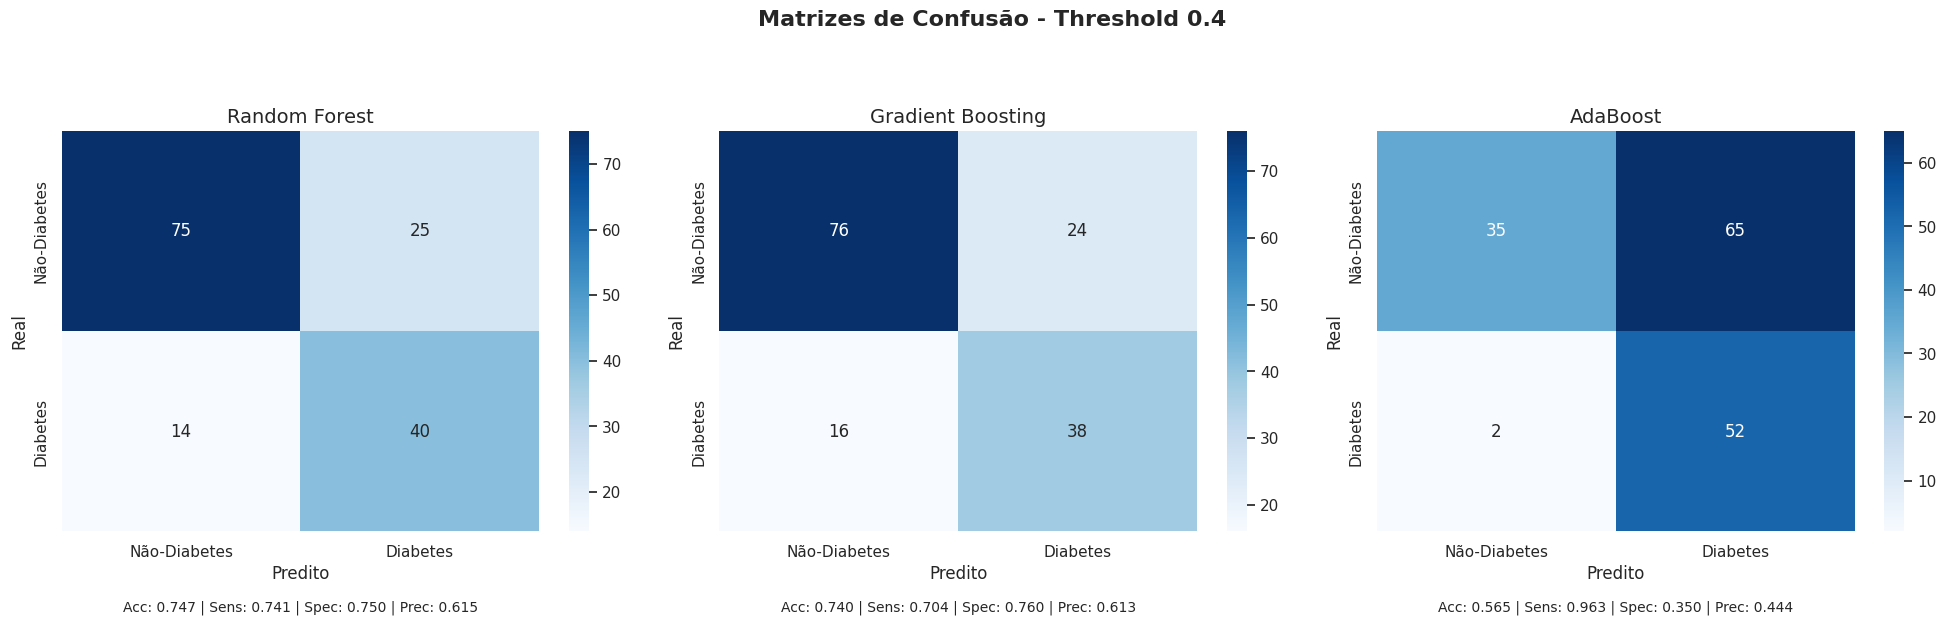


CURVA ROC COMBINADA - TODOS OS MODELOS


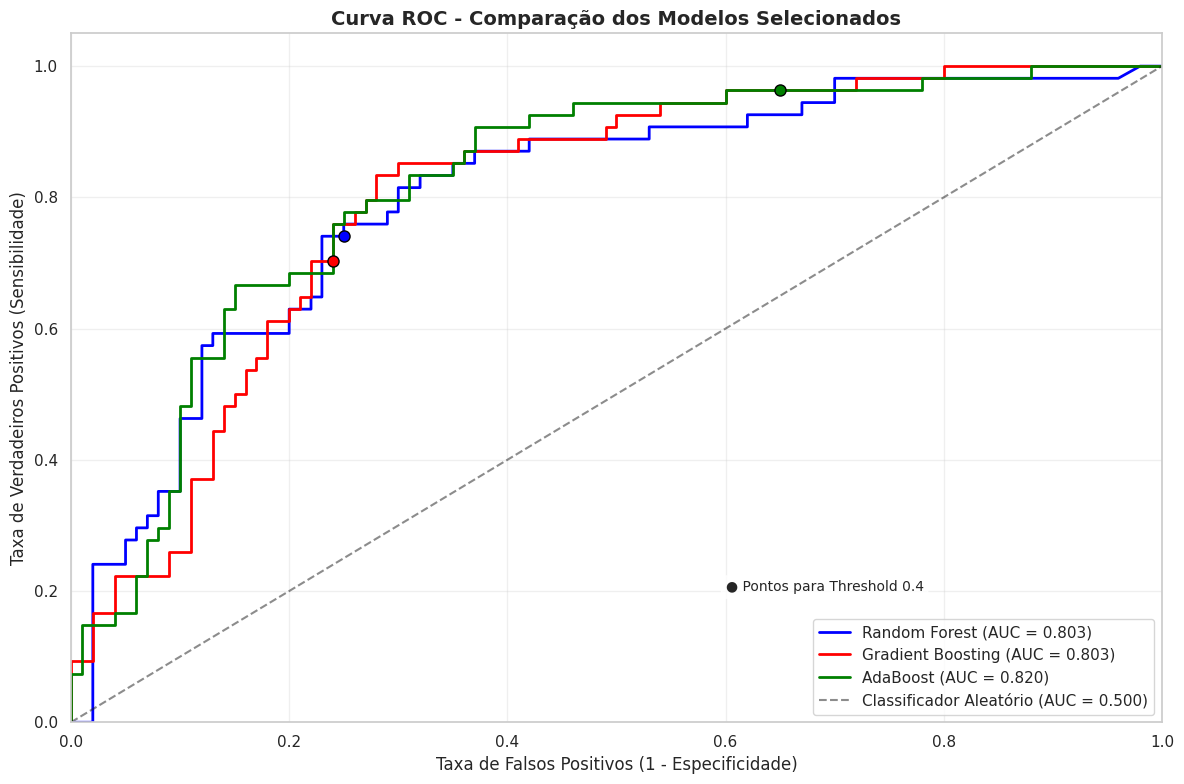


RESUMO COMPARATIVO - THRESHOLD 0.4

Modelo             AUC    Acc    Sens   Spec   Prec   F1     VP  FP  VN  FN 
-------------------------------------------------------------------------------------
Random Forest      0.803  0.747  0.741  0.750  0.615  0.672  40  25  75  14 
Gradient Boosting  0.803  0.740  0.704  0.760  0.613  0.655  38  24  76  16 
AdaBoost           0.820  0.565  0.963  0.350  0.444  0.608  52  65  35  2  

🎯 MELHOR MODELO POR MÉTRICA (Threshold 0.4):
• Melhor AUC: AdaBoost (0.820)
• Melhor F1-Score: Random Forest (0.672)
• Melhor Sensibilidade: AdaBoost (0.963)
• Melhor Especificidade: Gradient Boosting (0.760)


In [26]:
# ===== FUNÇÃO PARA ANÁLISE DE THRESHOLD =====
def analyze_threshold_for_model(model_name, y_proba, y_true, thresholds):
    """
    Analisa diferentes thresholds para um modelo específico
    """
    results = []
    
    for threshold in thresholds:
        # Gerar predições com o threshold atual
        y_pred = (y_proba >= threshold).astype(int)
        
        # Calcular matriz de confusão
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        
        # Calcular métricas
        sensibilidade = tp / (tp + fn) if (tp + fn) > 0 else 0
        especificidade = tn / (tn + fp) if (tn + fp) > 0 else 0
        precisao = tp / (tp + fp) if (tp + fp) > 0 else 0
        f1_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade) if (precisao + sensibilidade) > 0 else 0
        vpn = tn / (tn + fn) if (tn + fn) > 0 else 0  # Valor Preditivo Negativo
        
        results.append({
            'Threshold': threshold,
            'Sensibilidade': sensibilidade,
            'Especificidade': especificidade,
            'Precisão': precisao,
            'F1-Score': f1_score,
            'VPN': vpn,
            'VP': tp,
            'FP': fp,
            'VN': tn,
            'FN': fn
        })
    
    return pd.DataFrame(results)

# ===== ANÁLISE DE THRESHOLD PARA RANDOM FOREST, GRADIENT BOOSTING E ADABOOST =====

print("\n" + "="*70)
print("ANÁLISE DE THRESHOLD - RANDOM FOREST, GRADIENT BOOSTING E ADABOOST")
print("="*70)

# Modelos específicos para análise
target_models = ['Random Forest', 'Gradient Boosting', 'AdaBoost']
print(f"\nAnalisando os modelos: {target_models}")

# Definir diferentes thresholds para análise (0.10 em 0.10)
# Round thresholds to 2 decimal places to avoid floating point inaccuracies
thresholds = np.round(np.arange(0.1, 1.0, 0.10), 2)

# Threshold para diagnóstico clínico (0.4)
diag_threshold = 0.4

# Dicionário para armazenar matrizes de confusão
confusion_matrices = {}
roc_data = {}

# Analisar cada modelo individualmente
for model_name in target_models:
    print(f"\n{'='*50}")
    print(f"ANÁLISE DO MODELO: {model_name}")
    print(f"{'='*50}")
    
    # Obter probabilidades preditas no conjunto de teste
    y_proba = model_scores[model_name]['y_test_proba']
    
    # Calcular métricas para cada threshold
    print(f"\nCalculando métricas para {len(thresholds)} valores de threshold...")
    threshold_df = analyze_threshold_for_model(model_name, y_proba, y_test, thresholds)
    
    # Formatar os dados da tabela para exibição com 3 casas decimais nas métricas
    threshold_display = threshold_df.copy()
    threshold_display['Threshold'] = threshold_display['Threshold'].round(3) 
    threshold_display['Sensibilidade'] = threshold_display['Sensibilidade'].round(3)
    threshold_display['Especificidade'] = threshold_display['Especificidade'].round(3)
    threshold_display['Precisão'] = threshold_display['Precisão'].round(3)
    threshold_display['F1-Score'] = threshold_display['F1-Score'].round(3)
    threshold_display['VPN'] = threshold_display['VPN'].round(3)
    
    # Exibir tabela completa de métricas por threshold com números centralizados
    print(f"\nTABELA COMPLETA DE MÉTRICAS POR THRESHOLD - {model_name}:")
    
    # Criar string formatada com colunas centralizadas
    header = f"{'Threshold':^10} {'Sens':^7} {'Espec':^7} {'Prec':^7} {'F1':^7} {'VPN':^7} {'VP':^4} {'FP':^4} {'VN':^4} {'FN':^4}"
    print(header)
    print("-" * len(header))
    
    for _, row in threshold_display.iterrows():
        linha = f"{row['Threshold']:^10.2f} {row['Sensibilidade']:^7.3f} {row['Especificidade']:^7.3f} {row['Precisão']:^7.3f} {row['F1-Score']:^7.3f} {row['VPN']:^7.3f} {row['VP']:^4.0f} {row['FP']:^4.0f} {row['VN']:^4.0f} {row['FN']:^4.0f}"
        print(linha)
    
    # Encontrar threshold ótimo para diagnóstico clínico (0.4)
    if diag_threshold not in threshold_df['Threshold'].values:
        diag_idx = abs(threshold_df['Threshold'] - diag_threshold).idxmin()
    else:
        diag_idx = threshold_df[threshold_df['Threshold'] == diag_threshold].index[0]
    diag = threshold_df.iloc[diag_idx]
    
    print(f"\nTHRESHOLD IDEAL PARA DIAGNÓSTICO CLÍNICO ({diag_threshold:.2f}) - {model_name}:")
    print(f"- Sensibilidade: {diag['Sensibilidade']:.3f}")
    print(f"- Especificidade: {diag['Especificidade']:.3f}")
    print(f"- F1-Score: {diag['F1-Score']:.3f}")
    print(f"- Precisão: {diag['Precisão']:.3f}")
    
    # NOVA SEÇÃO: TABELA DE INTERPRETAÇÃO CLÍNICA
    print(f"\n{'='*60}")
    print(f"INTERPRETAÇÃO CLÍNICA DETALHADA - {model_name} (Threshold {diag_threshold:.2f})")
    print(f"{'='*60}")
    
    # Extrair valores para interpretação
    VP = int(diag['VP'])
    FN = int(diag['FN']) 
    VN = int(diag['VN'])
    FP = int(diag['FP'])
    total_diabeticos = VP + FN
    total_nao_diabeticos = VN + FP
    total_pred_positivas = VP + FP
    
    # Tabela de interpretação clínica
    print(f"\n📊 RESUMO DE PERFORMANCE:")
    print(f"Sensibilidade: {diag['Sensibilidade']*100:.1f}% - {VP} de {total_diabeticos} diabéticos detectados")
    print(f"Especificidade: {diag['Especificidade']*100:.1f}% - {VN} de {total_nao_diabeticos} não-diabéticos corretos")
    print(f"Precisão: {diag['Precisão']*100:.1f}% - {VP} de {total_pred_positivas} predições positivas corretas")
    print(f"F1-Score: {diag['F1-Score']:.3f} - Equilíbrio geral")
    
    print(f"\n📋 INTERPRETAÇÃO CLÍNICA:")
    print(f"✅ Casos de diabetes detectados: {VP}")
    print(f"❌ Casos de diabetes perdidos: {FN}")
    if FN > 0:
        print(f"⚠️  {FN} pacientes diabéticos não seriam identificados")
    else:
        print(f"🎯 Todos os pacientes diabéticos foram identificados!")
    
    print(f"\n🔍 ANÁLISE DE ERROS:")
    print(f"• Falsos Positivos (FP): {FP} - Pacientes saudáveis incorretamente diagnosticados")
    print(f"• Falsos Negativos (FN): {FN} - Pacientes diabéticos não detectados")
    
    # Calcular percentuais de erro
    if total_nao_diabeticos > 0:
        perc_fp = (FP / total_nao_diabeticos) * 100
        print(f"• Taxa de Falsos Positivos: {perc_fp:.1f}% dos não-diabéticos")
    
    if total_diabeticos > 0:
        perc_fn = (FN / total_diabeticos) * 100
        print(f"• Taxa de Falsos Negativos: {perc_fn:.1f}% dos diabéticos")
    
    # Gerar predições com threshold 0.4 e calcular matriz de confusão
    y_pred_04 = (y_proba >= diag_threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred_04)
    confusion_matrices[model_name] = cm
    
    # Calcular dados ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    roc_data[model_name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}
    
    # Criar figura individual para este modelo
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
    fig.suptitle(f'Análise de Threshold para {model_name}', fontsize=16, fontweight='bold')
    
    # Gráfico 1: Curvas de Sensibilidade e Especificidade
    ax1.plot(threshold_df['Threshold'], threshold_df['Sensibilidade'], 'b-', linewidth=2, label='Sensibilidade')
    ax1.plot(threshold_df['Threshold'], threshold_df['Especificidade'], 'r-', linewidth=2, label='Especificidade')
    ax1.plot(threshold_df['Threshold'], threshold_df['F1-Score'], 'g-', linewidth=2, label='F1-Score')
    ax1.axvline(x=0.5, color='gray', linestyle='--', label='Threshold Padrão (0.5)')
    ax1.axvline(x=diag_threshold, color='orange', linestyle='--', linewidth=2, label=f'Threshold Ideal ({diag_threshold:.2f})', alpha=0.6)
    ax1.set_xlabel('Threshold')
    ax1.set_ylabel('Score')
    ax1.set_title('Trade-off entre Sensibilidade e Especificidade', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_ylim(0, 1)
    ax1.set_xticks(thresholds) 
    
    # Gráfico 2: Heat map de métricas probabilísticas
    metrics_prob = threshold_df[['Threshold', 'Sensibilidade', 'Especificidade', 'Precisão', 'F1-Score', 'VPN']].copy()
    
    sns.heatmap(metrics_prob.set_index('Threshold'), annot=True, cmap='RdYlGn', center=0.5, 
               ax=ax2, cbar_kws={'label': 'Score'}, fmt='.3f', 
               annot_kws={'size': 9})
    ax2.set_title('Mapa de Calor - Métricas Probabilísticas', fontsize=14)
    ax2.set_xlabel('Métricas')
    ax2.set_ylabel('Threshold')
    
    # Gráfico 3: Heat map de contagens absolutas
    metrics_counts = threshold_df[['Threshold', 'VP', 'FP', 'VN', 'FN']].copy()
    
    sns.heatmap(metrics_counts.set_index('Threshold'), annot=True, cmap='viridis', 
               ax=ax3, cbar_kws={'label': 'Contagem'}, fmt='.0f',
               annot_kws={'size': 9})
    ax3.set_title('Mapa de Calor - Contagens Absolutas', fontsize=14)
    ax3.set_xlabel('Tipos de Classificação')
    ax3.set_ylabel('Threshold')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# ===== MATRIZES DE CONFUSÃO PARA THRESHOLD 0.4 =====
print(f"\n{'='*80}")
print("MATRIZES DE CONFUSÃO - THRESHOLD 0.4")
print(f"{'='*80}")

fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle(f'Matrizes de Confusão - Threshold {diag_threshold:.1f}', fontsize=16, fontweight='bold')

for i, model_name in enumerate(target_models):
    cm = confusion_matrices[model_name]
    
    # Criar heatmap da matriz de confusão
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Não-Diabetes', 'Diabetes'],
                yticklabels=['Não-Diabetes', 'Diabetes'],
                ax=axes[i])
    
    axes[i].set_title(f'{model_name}', fontsize=14)
    axes[i].set_xlabel('Predito')
    axes[i].set_ylabel('Real')
    
    # Adicionar métricas na matriz
    tn, fp, fn, tp = cm.ravel()
    total = cm.sum()
    accuracy = (tp + tn) / total
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    # Adicionar texto com métricas
    axes[i].text(0.5, -0.20, 
                f'Acc: {accuracy:.3f} | Sens: {sensitivity:.3f} | Spec: {specificity:.3f} | Prec: {precision:.3f}',
                transform=axes[i].transAxes, ha='center', fontsize=10)

plt.tight_layout(rect=[0, 0.05, 1, 0.92])
plt.show()

# ===== CURVA ROC COMBINADA =====
print(f"\n{'='*80}")
print("CURVA ROC COMBINADA - TODOS OS MODELOS")
print(f"{'='*80}")

plt.figure(figsize=(12, 8))

# Cores para cada modelo
colors = ['blue', 'red', 'green']

for i, model_name in enumerate(target_models):
    fpr = roc_data[model_name]['fpr']
    tpr = roc_data[model_name]['tpr']
    roc_auc = roc_data[model_name]['auc']
    
    plt.plot(fpr, tpr, color=colors[i], linewidth=2, 
             label=f'{model_name} (AUC = {roc_auc:.3f})')

# Linha diagonal (classificador aleatório)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Classificador Aleatório (AUC = 0.500)')

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)', fontsize=12)
plt.title('Curva ROC - Comparação dos Modelos Selecionados', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)

# Adicionar ponto para threshold 0.4 em cada curva
for i, model_name in enumerate(target_models):
    y_proba = model_scores[model_name]['y_test_proba']
    y_pred_04 = (y_proba >= diag_threshold).astype(int)
    
    # Calcular FPR e TPR para threshold 0.4
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_04).ravel()
    fpr_04 = fp / (fp + tn) if (fp + tn) > 0 else 0
    tpr_04 = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    plt.plot(fpr_04, tpr_04, 'o', color=colors[i], markersize=8, 
             markeredgecolor='black', markeredgewidth=1)

# Adicionar legenda para os pontos de threshold 0.4
plt.text(0.6, 0.2, f'● Pontos para Threshold {diag_threshold:.1f}', 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

# ===== RESUMO FINAL =====
print(f"\n{'='*80}")
print("RESUMO COMPARATIVO - THRESHOLD 0.4")
print(f"{'='*80}")

# Criar tabela resumo
summary_data = []
for model_name in target_models:
    cm = confusion_matrices[model_name]
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0
    auc_score = roc_data[model_name]['auc']
    
    summary_data.append({
        'Modelo': model_name,
        'AUC': auc_score,
        'Accuracy': accuracy,
        'Sensibilidade': sensitivity,
        'Especificidade': specificity,
        'Precisão': precision,
        'F1-Score': f1_score,
        'VP': tp,
        'FP': fp,
        'VN': tn,
        'FN': fn
    })

# Exibir tabela formatada
print(f"\n{'Modelo':<18} {'AUC':<6} {'Acc':<6} {'Sens':<6} {'Spec':<6} {'Prec':<6} {'F1':<6} {'VP':<3} {'FP':<3} {'VN':<3} {'FN':<3}")
print("-" * 85)

for data in summary_data:
    print(f"{data['Modelo']:<18} {data['AUC']:<6.3f} {data['Accuracy']:<6.3f} {data['Sensibilidade']:<6.3f} {data['Especificidade']:<6.3f} {data['Precisão']:<6.3f} {data['F1-Score']:<6.3f} {data['VP']:<3} {data['FP']:<3} {data['VN']:<3} {data['FN']:<3}")

print(f"\n🎯 MELHOR MODELO POR MÉTRICA (Threshold {diag_threshold:.1f}):")
best_auc = max(summary_data, key=lambda x: x['AUC'])
best_f1 = max(summary_data, key=lambda x: x['F1-Score'])
best_sens = max(summary_data, key=lambda x: x['Sensibilidade'])
best_spec = max(summary_data, key=lambda x: x['Especificidade'])

print(f"• Melhor AUC: {best_auc['Modelo']} ({best_auc['AUC']:.3f})")
print(f"• Melhor F1-Score: {best_f1['Modelo']} ({best_f1['F1-Score']:.3f})")
print(f"• Melhor Sensibilidade: {best_sens['Modelo']} ({best_sens['Sensibilidade']:.3f})")
print(f"• Melhor Especificidade: {best_spec['Modelo']} ({best_spec['Especificidade']:.3f})")
